<a href="https://colab.research.google.com/github/giorgiodaneri/ACA_project/blob/main/gpt2_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import torch
import accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2-medium")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-medium",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True)

prompt = "Hey, are you conscious? Can you talk to me?"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate
generate_ids = model.generate(inputs.input_ids, max_length=30, pad_token_id=tokenizer.eos_token_id)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

"Hey, are you conscious? Can you talk to me? I'm sorry, I'm so sorry. I'm so sorry. I'm so sorry"

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

isPt = False

In [ ]:
!tar -cvf /content/output.tar /content/output

tar: Removing leading `/' from member names
/content/output/
/content/output/47.yaml
/content/output/131.yaml
/content/output/29.yaml
/content/output/86.yaml
/content/output/72.yaml
/content/output/138.yaml
/content/output/48.yaml
/content/output/75.yaml
/content/output/108.yaml
/content/output/130.yaml
/content/output/113.yaml
/content/output/112.yaml
/content/output/12.yaml
/content/output/35.yaml
/content/output/41.yaml
/content/output/109.yaml
/content/output/67.yaml
/content/output/142.yaml
/content/output/19.yaml
/content/output/17.yaml
/content/output/77.yaml
/content/output/70.yaml
/content/output/iter.dat
/content/output/44.yaml
/content/output/59.yaml
/content/output/66.yaml
/content/output/30.yaml
/content/output/126.yaml
/content/output/143.yaml
/content/output/79.yaml
/content/output/31.yaml
/content/output/58.yaml
/content/output/4.yaml
/content/output/3.yaml
/content/output/69.yaml
/content/output/115.yaml
/content/output/141.yaml
/content/output/139.yaml
/content/output

In [ ]:
modelName = "openai-community/gpt2-medium"

avoidLayers = ["ReLU",
               "Embedding",
               "LayerNorm"
               ]

iterOut = 0
bins = 31
attention_out_channels = 1

with open("output/iter.dat", "w") as file:
  file.write("0")

def hook_fn(m, i, o):
  if m.__class__.__name__ not in avoidLayers or (m.__class__.__name__ in ["GPT2Attention", "GPT2Block"]):
    print(f"Module: {m.__class__.__name__}")
    print(f"Operation: {m}")

    # Check if the module has weights
    if hasattr(m, 'weight') or (m.__class__.__name__ in ["GPT2Attention", "GPT2Block"]):
        if m.__class__.__name__ in ["GPT2Attention"]:
          wei = getattr(m, "c_attn").weight.view(-1).tolist() + getattr(m, "c_proj").weight.view(-1).tolist()
        elif m.__class__.__name__ in ["GPT2Block"]:
          # wei = getattr(m, "c_attn").weight.view(-1).tolist() + getattr(m, "c_proj").weight.view(-1).tolist()
          wei = m.attn.c_attn.weight.view(-1).tolist() + m.attn.c_proj.weight.view(-1).tolist()
        else:
          wei = m.weight.view(-1).tolist()


        weiArr = np.array(wei)

        hist, bin_edges = np.histogram(weiArr, bins=bins)

        # Normalise
        hist = hist / hist.sum()

        print(hist)
        print(hist.sum())

        if type(i) == tuple:
          print("Input size: ", len(i))
        else:
          print("Input shape: ", i.shape)

        if type(o) == tuple:
          print("Output size: ", len(o))
        else:
          print("Output shape: ", o.shape)

        # Determine the bin centers
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"{m.__class__.__name__} histogram")
        plt.xlabel('Value')
        plt.ylabel('Normalized Frequency')
        plt.grid(True)
        plt.show()

        if type(i) == tuple and len(i) == 0:
          input = [0.0]
        else:
          input = i[0].view(-1).tolist()
        inputArr = np.array(input)
        inputHist, _ = np.histogram(inputArr, bins=bins)
        inputHist = inputHist / inputHist.sum()

        output = o[0].view(-1).tolist()
        outputArr = np.array(output)
        outputHist, _ = np.histogram(outputArr, bins=bins)
        outputHist = outputHist / outputHist.sum()

        instanceString = ""

        # Generate yaml file for Conv2d layers
        if m.__class__.__name__ == "Linear":
          instanceString = f"""C: {getattr(m, "in_features")}, M: {getattr(m, "out_features")}"""
        elif m.__class__.__name__ == "GPT2Attention":
          instanceString = f""" M: {64}, C: {256}, P: {16}"""
        elif m.__class__.__name__ == "GPT2Block":
          instanceString = f""" M: {256}, C: {256}, P: {16}"""
        elif m.__class__.__name__ == "Conv1D":
          instanceString = f"""C: {1024}, M: {o.shape[2]}, P: {256}"""

        layerName = ""
        if(m.__class__.__name__ == "GPT2Block"):
          layerName = "GPT2Attention"
        else:
          layerName = m.__class__.__name__
        yaml = f"""{{{{include_text('../problem_base.yaml')}}}}
problem:
  <<<: *problem_base
  instance: {{{instanceString}}}

  name: {layerName}
  dnn_name: {modelName}
  notes: {layerName}

  histograms:
    Inputs: [{(''.join(f"{x}," for x in inputHist))[:-1]}]
    Weights: [{(''.join(f"{x}," for x in hist))[:-1]}]
    Outputs: [{(''.join(f"{x}," for x in outputHist))[:-1]}]
"""
        currIter = 0
        with open("output/iter.dat", "r") as fileDat:
          currIter = int(fileDat.readlines()[0])
          with open(f"output/{currIter}.yaml", "w") as fileYaml:
            fileYaml.write(yaml)
            fileYaml.close()
          fileDat.close()

        with open("output/iter.dat", "w") as fileDat:
          fileDat.write(str(int(currIter) + 1))
          fileDat.close()

    else:
        print("No weights in this module.")

idx = 0
for module in model.modules():
  if True:
    module.register_forward_hook(hook_fn)
  idx += 1

Input Tokens:  12
Number of layers:  320
Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 1.27156576e-06 3.17891439e-07 1.58945719e-06
 3.81469727e-06 4.13258870e-06 9.21885173e-06 1.84377035e-05
 4.32332357e-05 1.02361043e-04 3.50316366e-04 1.21561686e-03
 4.41296895e-03 1.61361694e-02 6.00884755e-02 3.21243286e-01
 4.86277262e-01 8.04392497e-02 2.14872360e-02 5.85206350e-03
 1.62092845e-03 4.51087952e-04 1.42097473e-04 5.34057617e-05
 2.09808350e-05 1.46230062e-05 4.45048014e-06 2.54313151e-06
 3.17891439e-07 9.53674316e-07 1.27156576e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


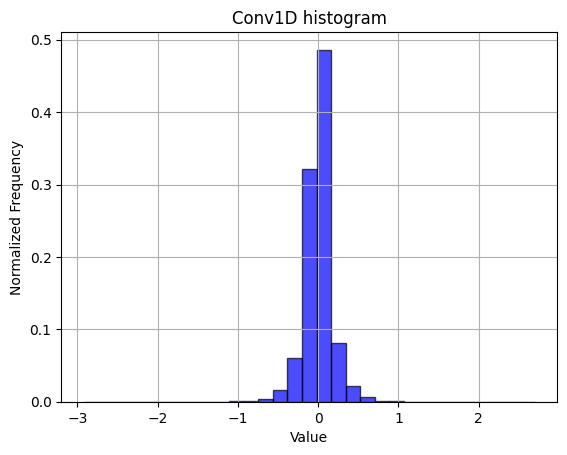

Module: Conv1D
Operation: Conv1D()
[2.86102295e-06 4.76837158e-06 2.86102295e-06 6.67572021e-06
 0.00000000e+00 8.58306885e-06 2.67028809e-05 2.76565552e-05
 4.48226929e-05 1.08718872e-04 3.57627869e-04 1.66320801e-03
 1.10034943e-02 9.11197662e-02 4.50794220e-01 3.73971939e-01
 6.16807938e-02 7.52353668e-03 1.19018555e-03 2.66075134e-04
 8.86917114e-05 4.29153442e-05 2.67028809e-05 1.43051147e-05
 1.14440918e-05 2.86102295e-06 3.81469727e-06 3.81469727e-06
 0.00000000e+00 0.00000000e+00 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


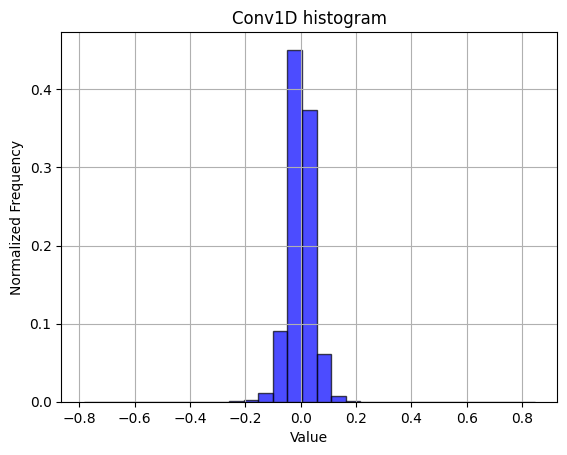

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 9.53674316e-07 2.38418579e-07 1.19209290e-06
 2.86102295e-06 3.09944153e-06 6.91413879e-06 1.38282776e-05
 3.24249268e-05 7.67707825e-05 2.62737274e-04 9.12189484e-04
 3.31354141e-03 1.21147633e-02 4.52077389e-02 3.12902927e-01
 5.42154074e-01 6.07328415e-02 1.61342621e-02 4.39167023e-03
 1.21593475e-03 3.38315964e-04 1.06573105e-04 4.00543213e-05
 1.57356262e-05 1.09672546e-05 3.33786011e-06 1.90734863e-06
 2.38418579e-07 7.15255737e-07 9.53674316e-07]
1.0
Input size:  1
Output size:  2


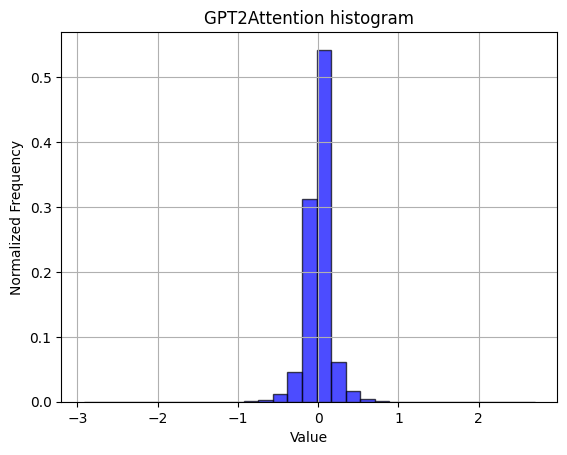

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 7.15255737e-07 2.14576721e-06
 5.48362732e-06 9.05990601e-06 1.62124634e-05 3.12328339e-05
 1.35660172e-04 1.74474716e-03 2.09352970e-02 1.24655962e-01
 3.34223270e-01 3.49930048e-01 1.40591621e-01 2.52513885e-02
 2.24757195e-03 1.57833099e-04 2.90870667e-05 1.28746033e-05
 1.04904175e-05 4.29153442e-06 3.57627869e-06 9.53674316e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


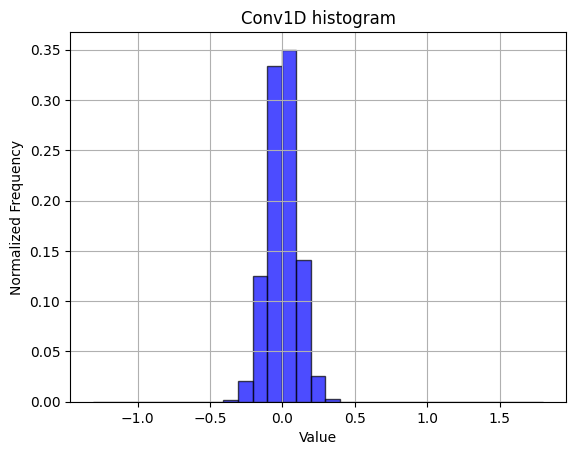

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[4.76837158e-07 0.00000000e+00 2.38418579e-07 2.38418579e-07
 2.38418579e-07 1.19209290e-06 2.86102295e-06 1.90734863e-06
 3.57627869e-06 5.24520874e-06 5.00679016e-06 8.10623169e-06
 9.77516174e-06 1.88350677e-05 5.48362732e-05 1.53100491e-02
 8.85345459e-01 9.90717411e-02 9.41753387e-05 2.38418579e-05
 1.45435333e-05 6.67572021e-06 5.24520874e-06 2.86102295e-06
 2.86102295e-06 4.29153442e-06 1.43051147e-06 1.19209290e-06
 7.15255737e-07 2.14576721e-06 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


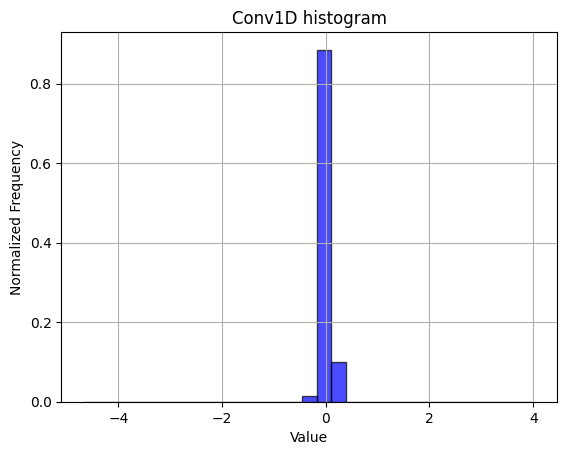

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 9.53674316e-07 2.38418579e-07 1.19209290e-06
 2.86102295e-06 3.09944153e-06 6.91413879e-06 1.38282776e-05
 3.24249268e-05 7.67707825e-05 2.62737274e-04 9.12189484e-04
 3.31354141e-03 1.21147633e-02 4.52077389e-02 3.12902927e-01
 5.42154074e-01 6.07328415e-02 1.61342621e-02 4.39167023e-03
 1.21593475e-03 3.38315964e-

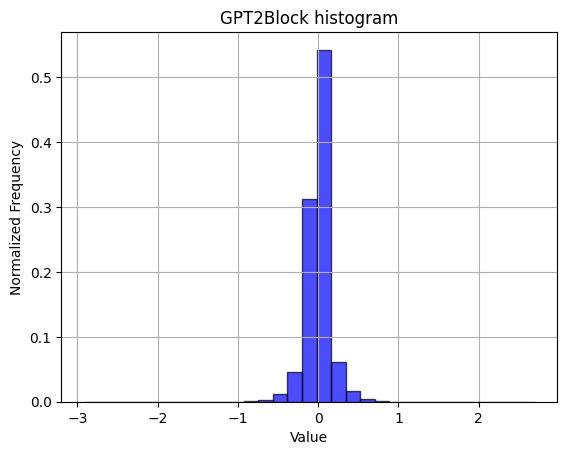

Module: Conv1D
Operation: Conv1D()
[6.35782878e-07 1.90734863e-06 2.54313151e-06 6.35782878e-06
 1.17619832e-05 4.51405843e-05 1.80880229e-04 6.65028890e-04
 2.33332316e-03 7.14365641e-03 2.03975042e-02 5.62880834e-02
 1.53262774e-01 3.04105759e-01 2.69440969e-01 1.19384130e-01
 4.33346430e-02 1.55270894e-02 5.49825033e-03 1.69436137e-03
 5.02586365e-04 1.25249227e-04 3.24249268e-05 8.58306885e-06
 3.49680583e-06 1.27156576e-06 6.35782878e-07 6.35782878e-07
 0.00000000e+00 0.00000000e+00 3.17891439e-07]
0.9999999999999999
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


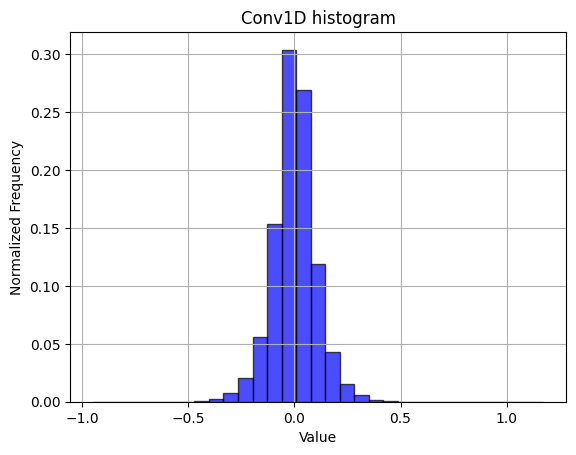

Module: Conv1D
Operation: Conv1D()
[1.90734863e-06 2.86102295e-06 1.90734863e-06 1.90734863e-06
 5.72204590e-06 7.62939453e-06 8.58306885e-06 1.71661377e-05
 1.23977661e-05 2.09808350e-05 4.10079956e-05 6.86645508e-05
 1.62124634e-04 3.25202942e-04 6.75106049e-03 9.84985352e-01
 6.92558289e-03 3.12805176e-04 1.52587891e-04 8.48770142e-05
 4.19616699e-05 1.71661377e-05 1.43051147e-05 1.04904175e-05
 7.62939453e-06 8.58306885e-06 3.81469727e-06 9.53674316e-07
 9.53674316e-07 1.90734863e-06 1.90734863e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


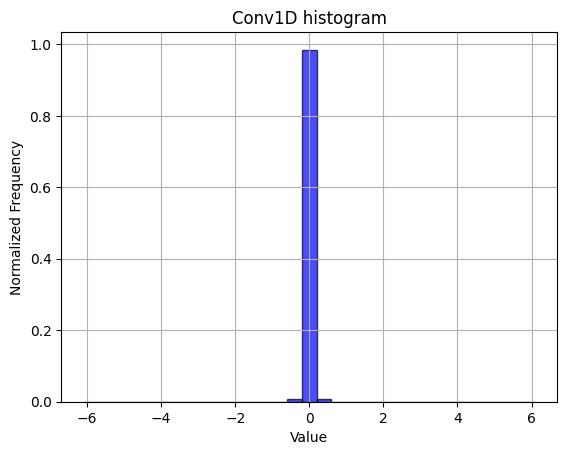

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[4.76837158e-07 7.15255737e-07 4.76837158e-07 4.76837158e-07
 1.43051147e-06 1.90734863e-06 2.14576721e-06 4.29153442e-06
 3.09944153e-06 5.24520874e-06 1.02519989e-05 1.71661377e-05
 4.05311584e-05 1.03712082e-04 2.43976116e-02 9.49840546e-01
 2.53834724e-02 9.94205475e-05 3.83853912e-05 2.12192535e-05
 1.04904175e-05 4.29153442e-06 3.57627869e-06 2.62260437e-06
 1.90734863e-06 2.14576721e-06 9.53674316e-07 2.38418579e-07
 2.38418579e-07 4.76837158e-07 4.76837158e-07]
1.0
Input size:  1
Output size:  2


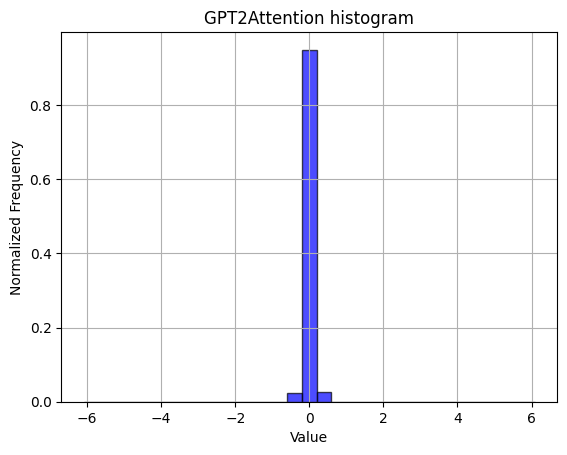

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 7.15255737e-07 4.76837158e-07 5.00679016e-06
 2.30073929e-04 3.90410423e-02 7.01330423e-01 2.55677938e-01
 3.67689133e-03 2.86102295e-05 5.00679016e-06 9.53674316e-07
 7.15255737e-07 2.38418579e-07 4.76837158e-07 4.76837158e-07
 2.38418579e-07 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


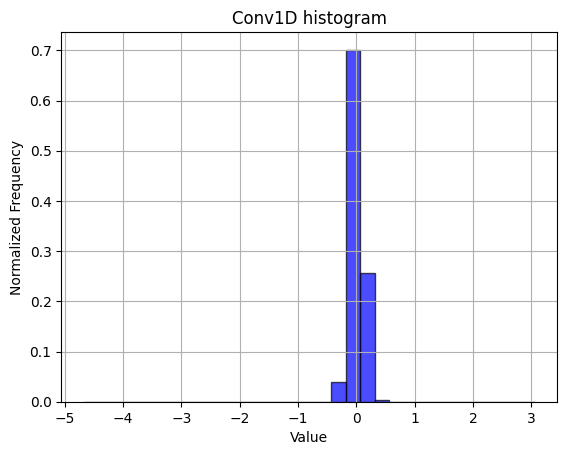

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 0.00000000e+00
 0.00000000e+00 9.53674316e-07 9.53674316e-07 4.76837158e-07
 9.53674316e-07 9.53674316e-07 1.90734863e-06 5.00679016e-06
 6.19888306e-06 1.33514404e-05 4.64916229e-05 1.98602676e-04
 1.29993677e-01 8.68918180e-01 6.52074814e-04 1.09434128e-04
 3.26633453e-05 8.10623169e-06 5.00679016e-06 2.14576721e-06
 1.19209290e-06 7.15255737e-07 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


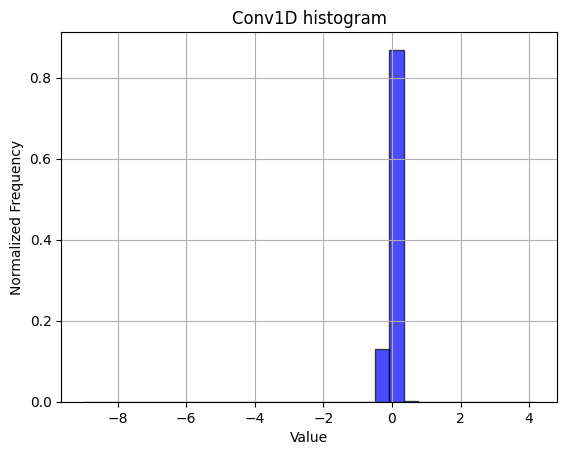

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[4.76837158e-07 7.15255737e-07 4.76837158e-07 4.76837158e-07
 1.43051147e-06 1.90734863e-06 2.14576721e-06 4.29153442e-06
 3.09944153e-06 5.24520874e-06 1.02519989e-05 1.71661377e-05
 4.05311584e-05 1.03712082e-04 2.43976116e-02 9.49840546e-01
 2.53834724e-02 9.94205475e-05 3.83853912e-05 2.12192535e-05
 1.04904175e-05 4.29153442e-

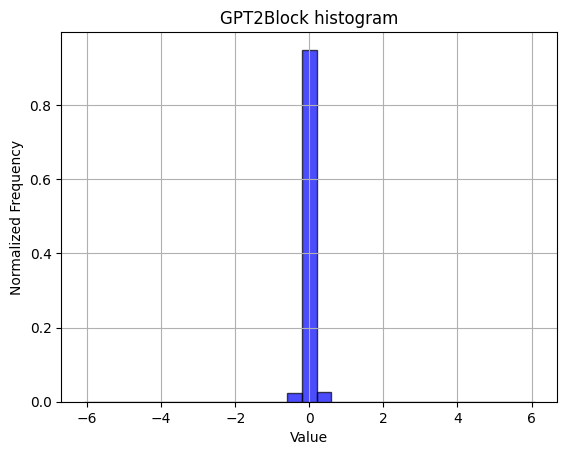

Module: Conv1D
Operation: Conv1D()
[6.35782878e-07 2.54313151e-06 2.86102295e-06 1.36693319e-05
 3.75111898e-05 1.01089478e-04 2.42551168e-04 5.86827596e-04
 1.31924947e-03 3.12678019e-03 6.93035126e-03 1.57337189e-02
 3.58247757e-02 8.19422404e-02 1.75531705e-01 2.83366839e-01
 2.12146759e-01 1.02470716e-01 4.53376770e-02 1.96832021e-02
 8.72834524e-03 3.88145447e-03 1.69436137e-03 7.45773315e-04
 3.33786011e-04 1.31924947e-04 5.21341960e-05 1.93913778e-05
 7.94728597e-06 1.90734863e-06 1.27156576e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


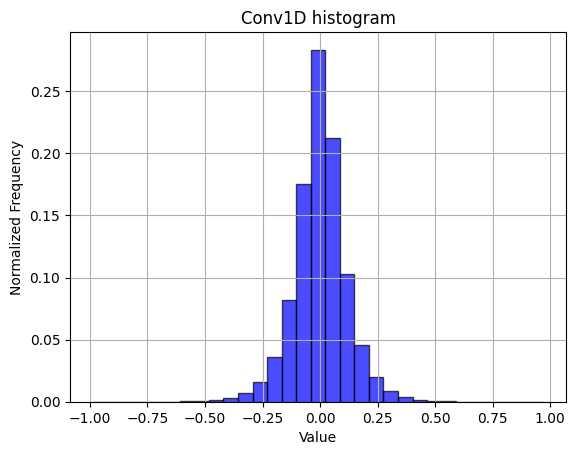

Module: Conv1D
Operation: Conv1D()
[1.90734863e-06 9.53674316e-07 9.53674316e-07 9.53674316e-07
 9.53674316e-07 0.00000000e+00 5.72204590e-06 9.53674316e-07
 6.67572021e-06 9.53674316e-06 1.52587891e-05 4.00543213e-05
 1.75476074e-04 2.13165283e-02 9.62119102e-01 1.60455704e-02
 1.55448914e-04 4.76837158e-05 2.09808350e-05 1.33514404e-05
 5.72204590e-06 3.81469727e-06 1.90734863e-06 1.90734863e-06
 9.53674316e-07 2.86102295e-06 0.00000000e+00 9.53674316e-07
 1.90734863e-06 9.53674316e-07 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


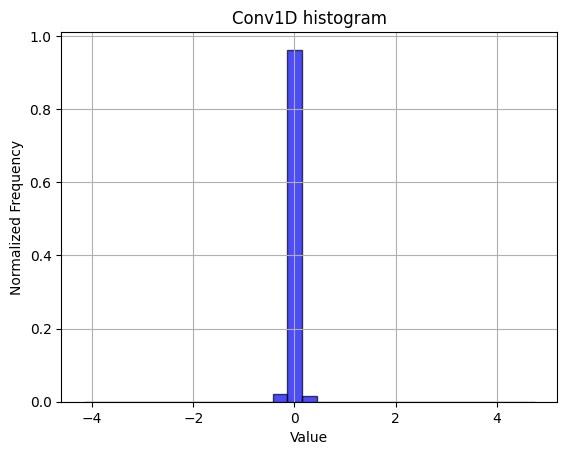

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[4.76837158e-07 2.38418579e-07 2.38418579e-07 2.38418579e-07
 2.38418579e-07 0.00000000e+00 1.43051147e-06 2.38418579e-07
 1.66893005e-06 2.38418579e-06 3.81469727e-06 3.17096710e-05
 1.61409378e-03 7.27853775e-02 8.60530615e-01 6.35190010e-02
 1.46102905e-03 3.31401825e-05 5.24520874e-06 3.33786011e-06
 1.43051147e-06 9.53674316e-07 4.76837158e-07 4.76837158e-07
 2.38418579e-07 7.15255737e-07 0.00000000e+00 2.38418579e-07
 4.76837158e-07 2.38418579e-07 2.38418579e-07]
1.0
Input size:  1
Output size:  2


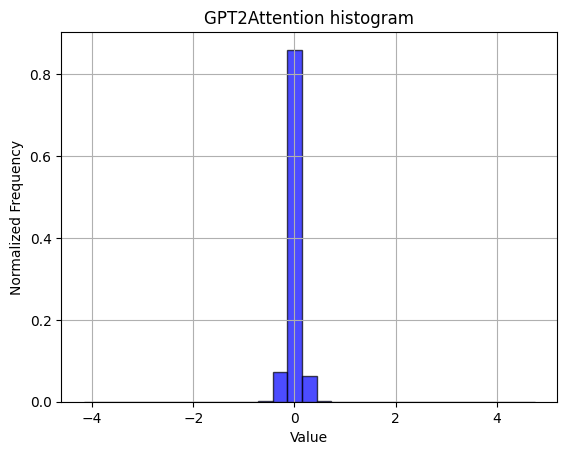

Module: Conv1D
Operation: Conv1D()
[4.76837158e-07 0.00000000e+00 2.38418579e-07 0.00000000e+00
 1.66893005e-06 2.86102295e-06 3.09944153e-06 3.33786011e-06
 7.86781311e-06 2.71797180e-05 2.67267227e-04 3.55076790e-03
 3.42862606e-02 1.74311638e-01 3.81820440e-01 2.99568892e-01
 9.15110111e-02 1.33728981e-02 1.13463402e-03 9.36985016e-05
 1.78813934e-05 7.39097595e-06 5.48362732e-06 7.15255737e-07
 7.15255737e-07 1.43051147e-06 7.15255737e-07 4.76837158e-07
 2.38418579e-07 2.38418579e-07 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


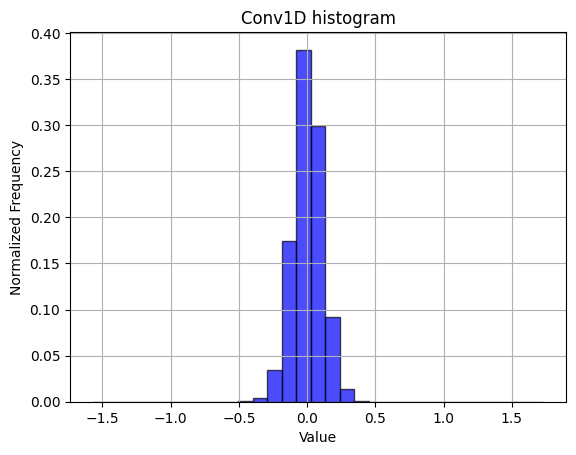

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[4.76837158e-07 2.38418579e-07 2.38418579e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.38418579e-07 2.38418579e-07 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.43051147e-06 1.43051147e-06
 2.38418579e-06 3.09944153e-06 7.62939453e-06 1.50203705e-05
 4.76837158e-05 9.40561295e-04 9.61671114e-01 3.72183323e-02
 5.00679016e-05 3.00407410e-05 4.05311584e-06 2.38418579e-06
 7.15255737e-07 4.76837158e-07 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


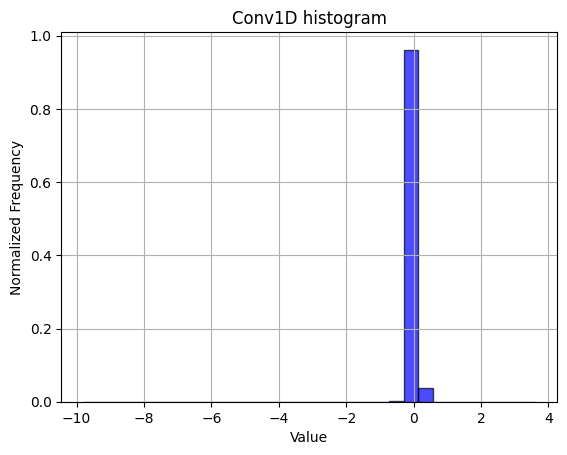

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[4.76837158e-07 2.38418579e-07 2.38418579e-07 2.38418579e-07
 2.38418579e-07 0.00000000e+00 1.43051147e-06 2.38418579e-07
 1.66893005e-06 2.38418579e-06 3.81469727e-06 3.17096710e-05
 1.61409378e-03 7.27853775e-02 8.60530615e-01 6.35190010e-02
 1.46102905e-03 3.31401825e-05 5.24520874e-06 3.33786011e-06
 1.43051147e-06 9.53674316e-

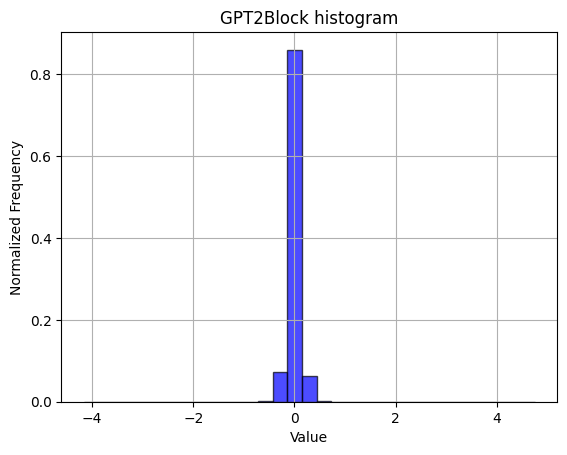

Module: Conv1D
Operation: Conv1D()
[1.27156576e-06 9.53674316e-07 3.17891439e-06 7.94728597e-06
 1.04904175e-05 1.78019206e-05 3.17891439e-05 6.32603963e-05
 1.89145406e-04 5.74747721e-04 1.95821126e-03 6.19475047e-03
 1.81865692e-02 5.09312948e-02 1.34322484e-01 2.70881653e-01
 2.83526421e-01 1.46486600e-01 5.63182831e-02 2.02290217e-02
 6.87758128e-03 2.15498606e-03 6.69161479e-04 2.14894613e-04
 7.85191854e-05 3.11533610e-05 1.68482463e-05 8.58306885e-06
 7.62939453e-06 3.17891439e-06 1.58945719e-06]
0.9999999999999999
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


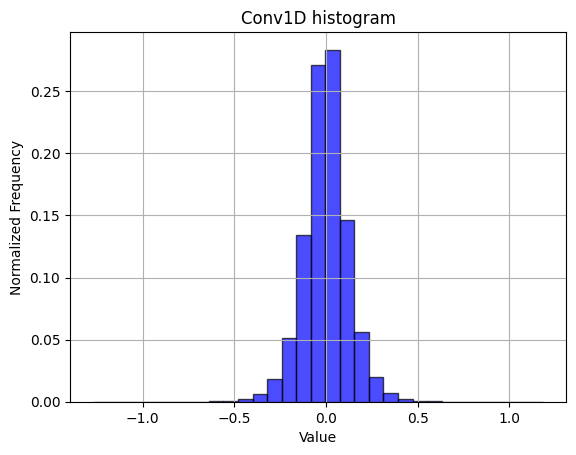

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.90734863e-06 9.53674316e-07 2.86102295e-06 3.81469727e-06
 1.90734863e-06 4.76837158e-06 5.72204590e-06 1.71661377e-05
 2.76565552e-05 5.72204590e-05 8.86917114e-05 1.00135803e-03
 2.01566696e-01 7.62915611e-01 3.39231491e-02 2.01225281e-04
 7.15255737e-05 4.86373901e-05 2.67028809e-05 1.43051147e-05
 6.67572021e-06 5.72204590e-06 9.53674316e-07 9.53674316e-07
 0.00000000e+00 1.90734863e-06 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


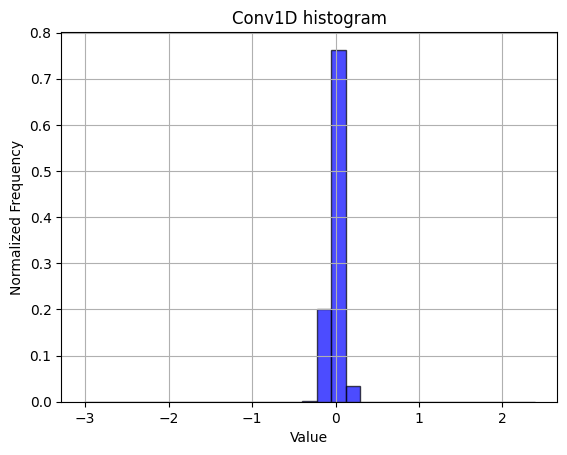

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.76837158e-07 2.38418579e-07 7.15255737e-07 9.53674316e-07
 4.76837158e-07 1.43051147e-06 3.33786011e-06 1.43051147e-05
 3.83853912e-05 1.71184540e-04 1.92952156e-03 2.29506493e-02
 2.49871254e-01 6.16088867e-01 9.90395546e-02 9.04202461e-03
 7.23123550e-04 8.63075256e-05 2.38418579e-05 8.58306885e-06
 1.90734863e-06 1.43051147e-06 2.38418579e-07 2.38418579e-07
 0.00000000e+00 4.76837158e-07 2.38418579e-07]
1.0
Input size:  1
Output size:  2


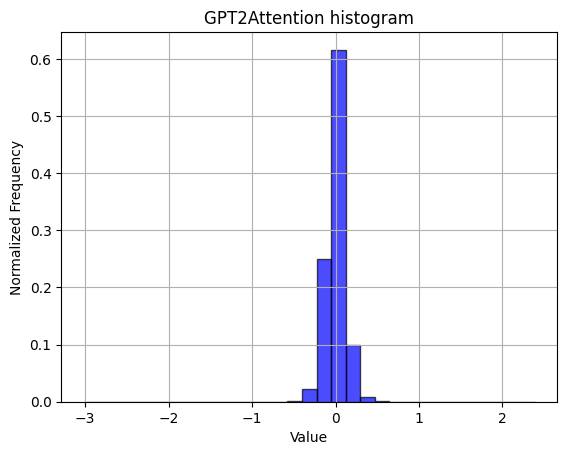

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 2.38418579e-07 0.00000000e+00
 2.38418579e-07 2.38418579e-07 2.38418579e-07 1.43051147e-06
 7.15255737e-07 1.66893005e-06 3.09944153e-06 4.29153442e-06
 1.59740448e-05 2.62260437e-05 6.46352768e-04 2.92995453e-01
 6.95129871e-01 1.10144615e-02 7.70092010e-05 3.55243683e-05
 2.02655792e-05 1.23977661e-05 6.43730164e-06 3.09944153e-06
 1.66893005e-06 1.43051147e-06 7.15255737e-07 4.76837158e-07
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


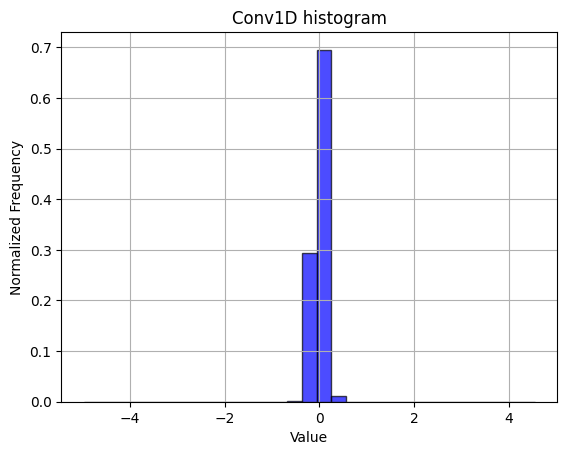

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[7.15255737e-07 2.38418579e-07 0.00000000e+00 2.38418579e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.38418579e-07
 0.00000000e+00 0.00000000e+00 2.38418579e-07 2.38418579e-07
 2.38418579e-07 0.00000000e+00 2.38418579e-07 9.53674316e-07
 1.43051147e-06 9.53674316e-07 3.57627869e-06 5.96046448e-06
 3.50475311e-05 3.80039215e-04 9.97906208e-01 1.65247917e-03
 6.67572021e-06 3.81469727e-06 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


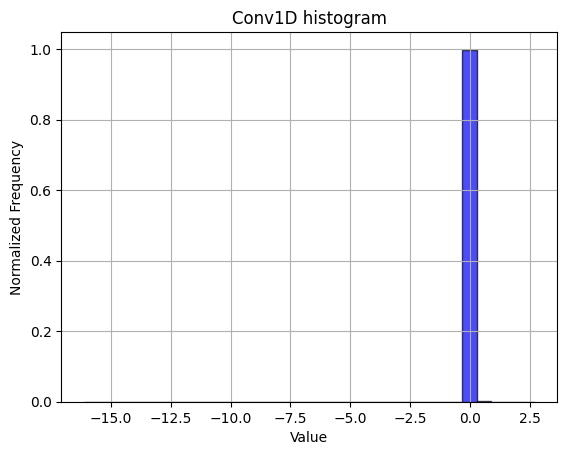

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.76837158e-07 2.38418579e-07 7.15255737e-07 9.53674316e-07
 4.76837158e-07 1.43051147e-06 3.33786011e-06 1.43051147e-05
 3.83853912e-05 1.71184540e-04 1.92952156e-03 2.29506493e-02
 2.49871254e-01 6.16088867e-01 9.90395546e-02 9.04202461e-03
 7.23123550e-04 8.63075256e-

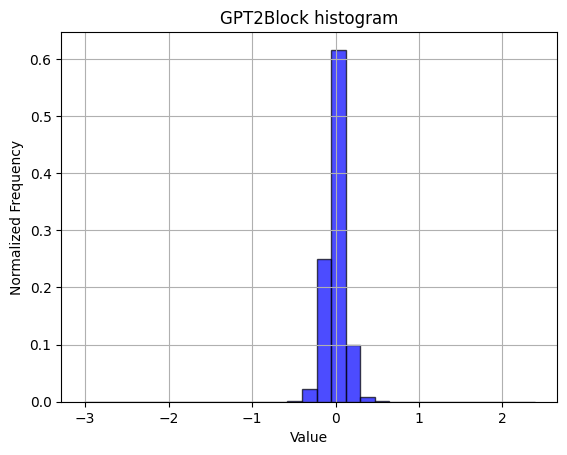

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 9.53674316e-07 9.53674316e-07 1.58945719e-06
 3.17891439e-06 6.99361165e-06 8.90096029e-06 1.30335490e-05
 2.95639038e-05 6.13530477e-05 1.81516012e-04 7.92821248e-04
 5.24902344e-03 3.74336243e-02 1.95227305e-01 4.54393705e-01
 2.45709101e-01 5.19323349e-02 7.52894084e-03 1.05762482e-03
 2.17437744e-04 7.53402710e-05 3.30607096e-05 1.46230062e-05
 1.14440918e-05 6.03993734e-06 3.81469727e-06 2.22524007e-06
 2.22524007e-06 6.35782878e-07 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


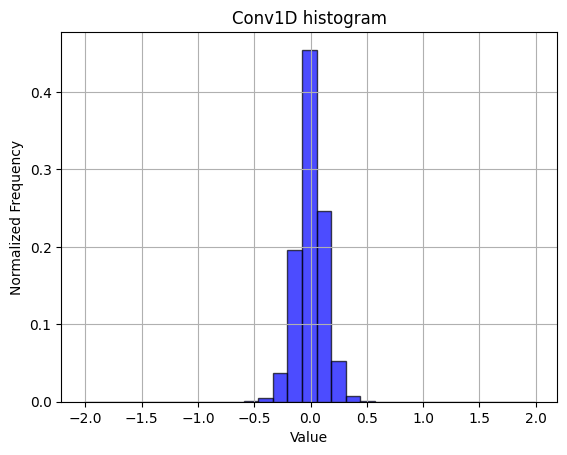

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 9.53674316e-07 0.00000000e+00 1.90734863e-06
 1.90734863e-06 3.81469727e-06 1.90734863e-06 5.72204590e-06
 8.58306885e-06 7.62939453e-06 1.33514404e-05 1.52587891e-05
 2.47955322e-05 3.91006470e-05 6.19888306e-05 3.02314758e-04
 4.13732529e-02 6.15680695e-01 3.34898949e-01 7.24983215e-03
 1.23023987e-04 6.19888306e-05 4.29153442e-05 2.67028809e-05
 1.90734863e-05 1.43051147e-05 2.86102295e-06 5.72204590e-06
 4.76837158e-06 9.53674316e-07 4.76837158e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


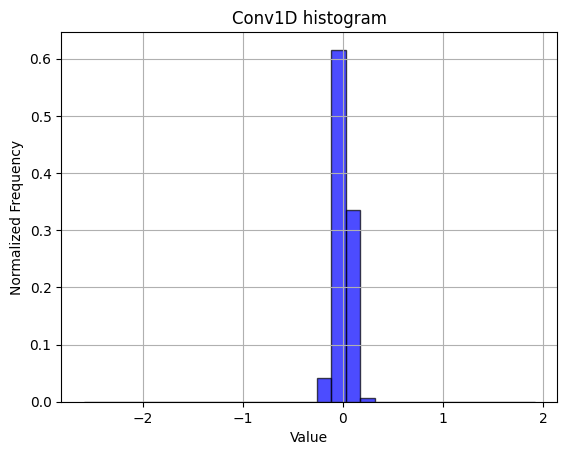

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 2.38418579e-07 0.00000000e+00 9.53674316e-07
 7.15255737e-07 1.19209290e-06 1.66893005e-06 4.05311584e-06
 7.62939453e-06 9.53674316e-06 1.54972076e-05 3.21865082e-05
 8.65459442e-05 3.29494476e-04 2.32696533e-03 2.25162506e-02
 1.85472012e-01 5.64634800e-01 1.97159052e-01 2.44460106e-02
 2.45404243e-03 3.35216522e-04 8.89301300e-05 3.33786011e-05
 1.83582306e-05 1.14440918e-05 4.05311584e-06 4.05311584e-06
 3.33786011e-06 9.53674316e-07 1.19209290e-06]
1.0
Input size:  1
Output size:  2


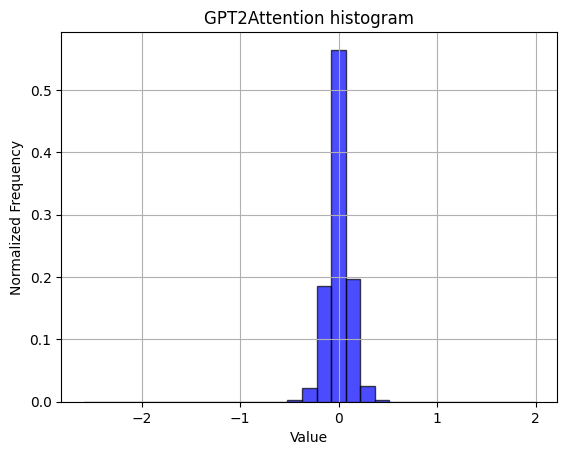

Module: Conv1D
Operation: Conv1D()
[7.15255737e-07 2.38418579e-07 4.76837158e-07 0.00000000e+00
 1.66893005e-06 1.43051147e-06 3.09944153e-06 6.67572021e-06
 1.14440918e-05 2.90870667e-05 5.98430634e-05 1.55210495e-04
 8.02459717e-02 8.32849264e-01 8.64467621e-02 1.26361847e-04
 2.98023224e-05 1.57356262e-05 5.00679016e-06 2.38418579e-06
 3.57627869e-06 2.14576721e-06 1.43051147e-06 4.76837158e-07
 4.76837158e-07 0.00000000e+00 2.38418579e-07 2.38418579e-07
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


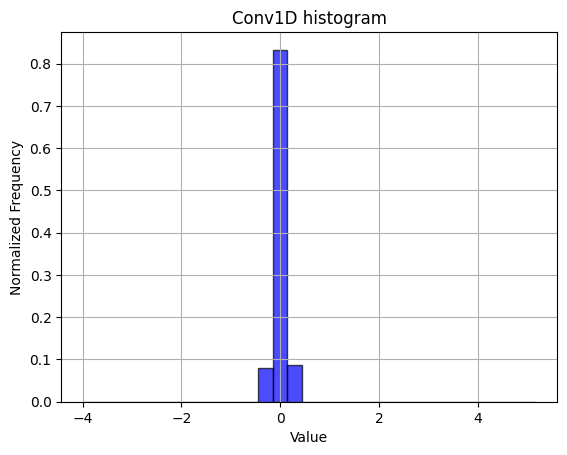

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.38418579e-07 2.38418579e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.38418579e-07
 2.38418579e-07 0.00000000e+00 0.00000000e+00 9.53674316e-07
 1.90734863e-06 1.43051147e-06 4.05311584e-06 8.34465027e-06
 2.88486481e-05 1.49488449e-04 9.97065067e-01 2.72846222e-03
 7.62939453e-06 1.90734863e-06 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


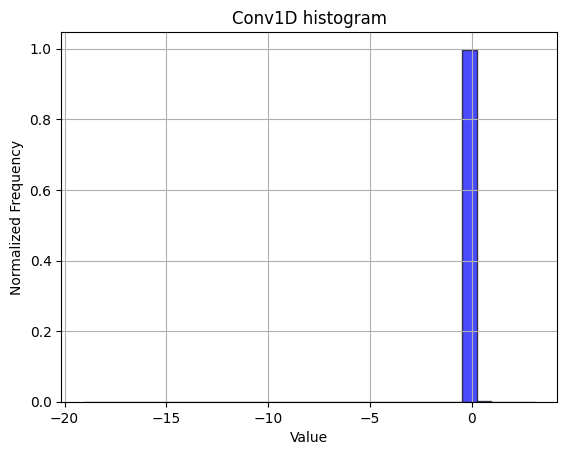

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 2.38418579e-07 0.00000000e+00 9.53674316e-07
 7.15255737e-07 1.19209290e-06 1.66893005e-06 4.05311584e-06
 7.62939453e-06 9.53674316e-06 1.54972076e-05 3.21865082e-05
 8.65459442e-05 3.29494476e-04 2.32696533e-03 2.25162506e-02
 1.85472012e-01 5.64634800e-01 1.97159052e-01 2.44460106e-02
 2.45404243e-03 3.35216522e-

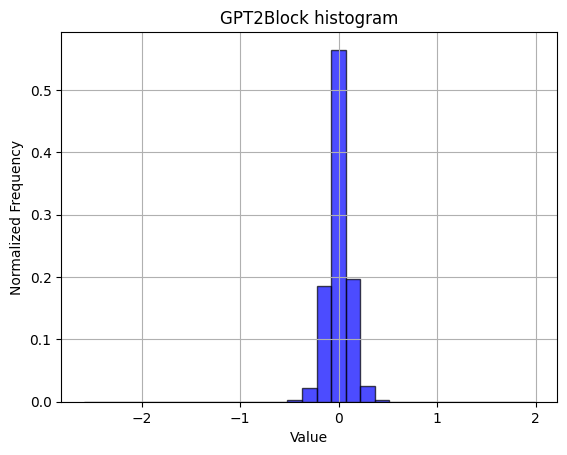

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 0.00000000e+00 9.53674316e-07 1.27156576e-06
 1.58945719e-06 2.86102295e-06 7.31150309e-06 1.11262004e-05
 1.90734863e-05 3.97364299e-05 1.29063924e-04 8.12212626e-04
 8.12625885e-03 8.23068619e-02 3.97048950e-01 4.12404378e-01
 8.91647339e-02 8.84723663e-03 8.52902730e-04 1.44322713e-04
 3.91006470e-05 1.97092692e-05 8.26517741e-06 4.13258870e-06
 3.17891439e-06 1.90734863e-06 1.58945719e-06 3.17891439e-07
 3.17891439e-07 0.00000000e+00 3.17891439e-07]
1.0000000000000002
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


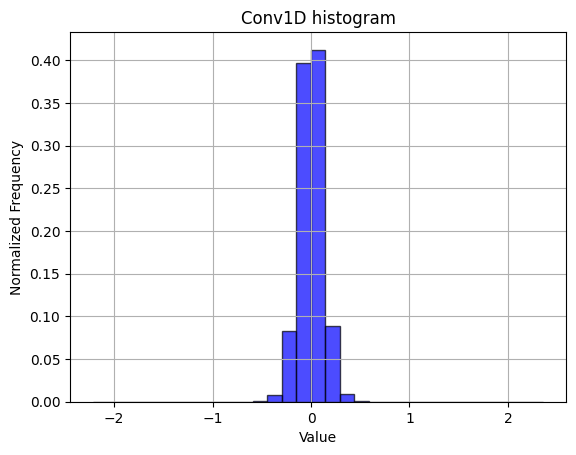

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 1.90734863e-06 2.86102295e-06
 0.00000000e+00 3.81469727e-06 5.72204590e-06 9.53674316e-06
 3.81469727e-06 9.53674316e-06 2.38418579e-05 2.95639038e-05
 4.57763672e-05 9.25064087e-05 1.10912323e-03 1.30538940e-01
 7.24656105e-01 1.41952515e-01 1.28078461e-03 8.20159912e-05
 5.62667847e-05 3.24249268e-05 1.43051147e-05 2.19345093e-05
 9.53674316e-06 6.67572021e-06 3.81469727e-06 0.00000000e+00
 9.53674316e-07 1.90734863e-06 2.86102295e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


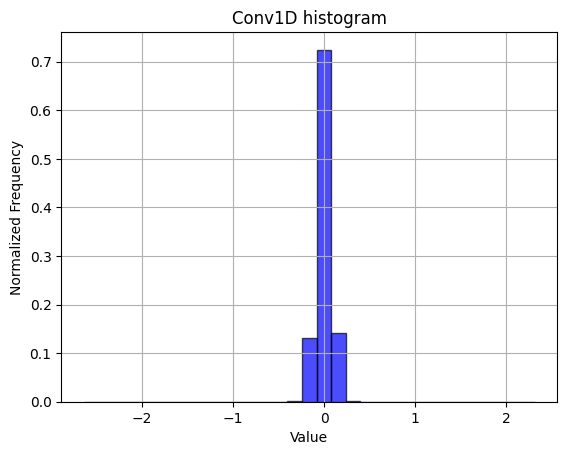

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 0.00000000e+00 7.15255737e-07 7.15255737e-07
 0.00000000e+00 2.38418579e-06 3.09944153e-06 4.05311584e-06
 7.39097595e-06 1.14440918e-05 2.26497650e-05 5.12599945e-05
 2.02894211e-04 1.73926353e-03 2.44576931e-02 2.55347252e-01
 5.74357748e-01 1.32241488e-01 1.05545521e-02 7.94887543e-04
 1.25646591e-04 3.43322754e-05 1.64508820e-05 1.00135803e-05
 5.96046448e-06 3.33786011e-06 2.14576721e-06 7.15255737e-07
 4.76837158e-07 4.76837158e-07 7.15255737e-07]
1.0
Input size:  1
Output size:  2


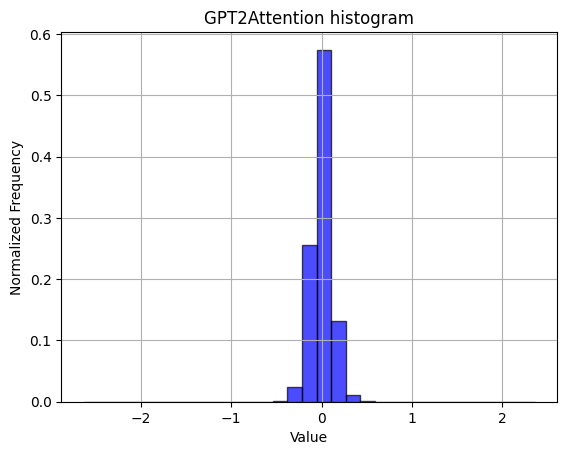

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 4.76837158e-07 4.76837158e-07 9.53674316e-07
 4.76837158e-07 7.15255737e-07 7.15255737e-07 1.19209290e-06
 1.43051147e-06 1.43051147e-06 2.38418579e-06 6.91413879e-06
 1.50442123e-04 6.85286522e-03 1.04674101e-01 4.33272839e-01
 3.78514051e-01 7.25264549e-02 3.90052795e-03 7.74860382e-05
 5.96046448e-06 1.66893005e-06 2.86102295e-06 2.38418579e-07
 4.76837158e-07 7.15255737e-07 2.38418579e-07 2.38418579e-07
 4.76837158e-07 2.38418579e-07 7.15255737e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


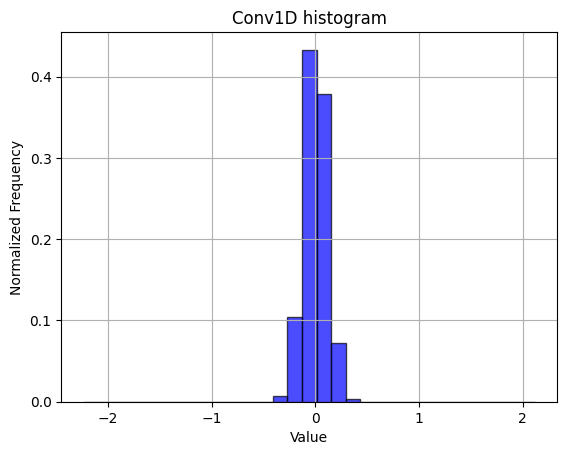

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 0.00000000e+00
 0.00000000e+00 4.76837158e-07 0.00000000e+00 4.76837158e-07
 4.76837158e-07 7.15255737e-07 9.53674316e-07 1.66893005e-06
 2.86102295e-06 5.00679016e-06 1.02519989e-05 1.78813934e-05
 4.05311584e-05 1.03950500e-04 6.45473003e-02 9.34952736e-01
 2.93731689e-04 1.33514404e-05 2.86102295e-06 1.43051147e-06
 1.43051147e-06 1.19209290e-06 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


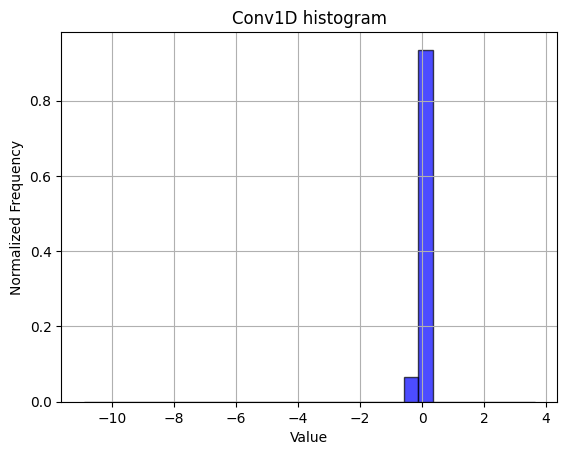

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 0.00000000e+00 7.15255737e-07 7.15255737e-07
 0.00000000e+00 2.38418579e-06 3.09944153e-06 4.05311584e-06
 7.39097595e-06 1.14440918e-05 2.26497650e-05 5.12599945e-05
 2.02894211e-04 1.73926353e-03 2.44576931e-02 2.55347252e-01
 5.74357748e-01 1.32241488e-01 1.05545521e-02 7.94887543e-04
 1.25646591e-04 3.43322754e-

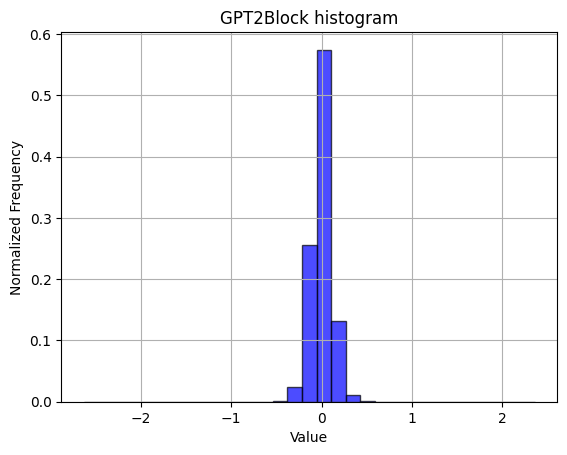

Module: Conv1D
Operation: Conv1D()
[6.35782878e-07 9.53674316e-07 9.53674316e-07 4.13258870e-06
 2.86102295e-06 6.03993734e-06 7.62939453e-06 2.89281209e-05
 1.43051147e-04 8.15391541e-04 4.40629323e-03 2.01088587e-02
 7.34875997e-02 1.88354174e-01 3.01571210e-01 2.47201602e-01
 1.16058668e-01 3.68773142e-02 8.81004333e-03 1.72138214e-03
 3.01996867e-04 5.81741333e-05 1.43051147e-05 6.99361165e-06
 5.08626302e-06 2.86102295e-06 0.00000000e+00 1.27156576e-06
 6.35782878e-07 3.17891439e-07 6.35782878e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


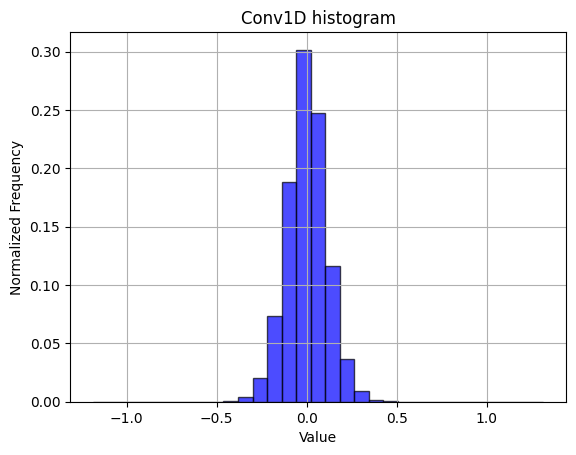

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 2.86102295e-06 9.53674316e-07
 3.81469727e-06 4.76837158e-06 3.81469727e-06 1.04904175e-05
 2.76565552e-05 3.43322754e-05 3.81469727e-05 7.82012939e-05
 1.32179260e-03 7.27710724e-02 5.78310013e-01 3.30659866e-01
 1.63192749e-02 2.40325928e-04 6.67572021e-05 3.81469727e-05
 2.38418579e-05 1.52587891e-05 8.58306885e-06 4.76837158e-06
 7.62939453e-06 1.90734863e-06 9.53674316e-07 1.90734863e-06
 0.00000000e+00 9.53674316e-07 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


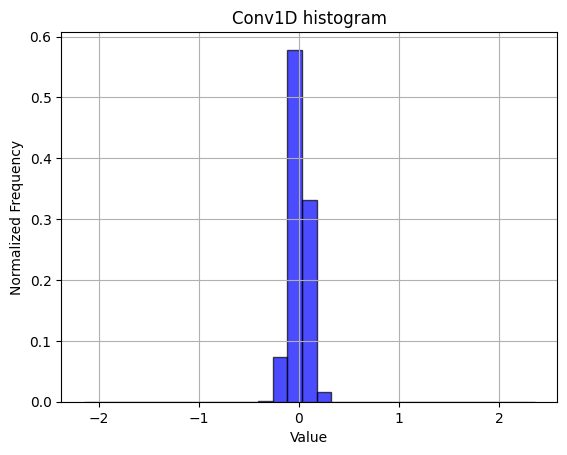

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 0.00000000e+00 7.15255737e-07 2.38418579e-07
 9.53674316e-07 1.19209290e-06 1.43051147e-06 3.33786011e-06
 1.14440918e-05 1.59740448e-05 3.19480896e-05 4.48226929e-04
 8.79144669e-03 1.14043474e-01 5.02145290e-01 3.28660727e-01
 4.30595875e-02 2.60758400e-03 1.29938126e-04 2.16960907e-05
 1.14440918e-05 5.00679016e-06 2.62260437e-06 1.90734863e-06
 1.90734863e-06 4.76837158e-07 2.38418579e-07 4.76837158e-07
 0.00000000e+00 2.38418579e-07 2.38418579e-07]
1.0
Input size:  1
Output size:  2


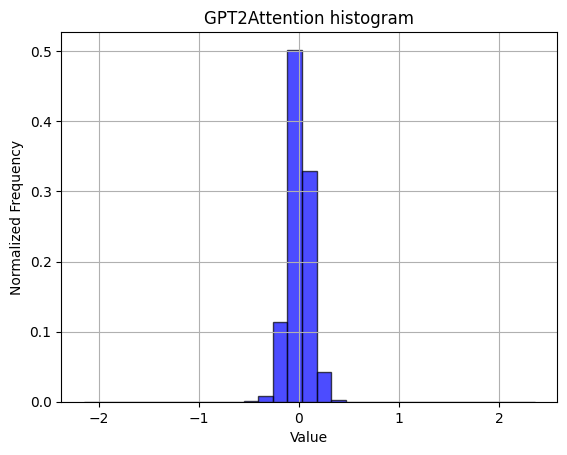

Module: Conv1D
Operation: Conv1D()
[4.76837158e-07 0.00000000e+00 2.38418579e-07 2.38418579e-07
 0.00000000e+00 2.38418579e-07 7.15255737e-07 7.15255737e-07
 4.76837158e-07 9.53674316e-07 2.14576721e-06 4.52995300e-06
 1.00135803e-05 8.77380371e-05 6.22844696e-03 1.34866238e-01
 5.32812834e-01 2.98672676e-01 2.67493725e-02 5.30958176e-04
 1.64508820e-05 7.62939453e-06 2.62260437e-06 2.14576721e-06
 1.43051147e-06 2.38418579e-07 0.00000000e+00 0.00000000e+00
 2.38418579e-07 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


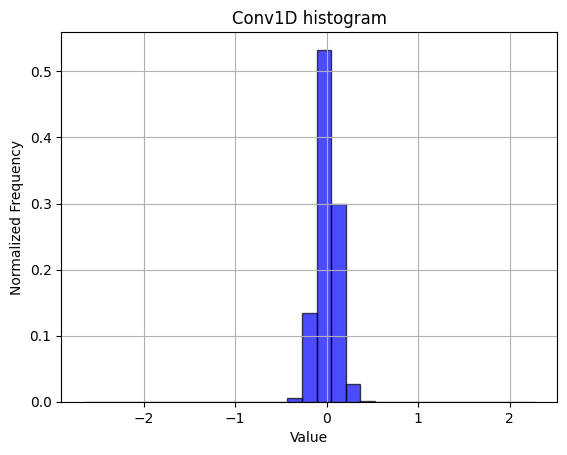

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.53674316e-07 7.15255737e-07 7.15255737e-07
 3.09944153e-06 5.00679016e-06 1.62124634e-05 4.24385071e-05
 2.05039978e-04 8.85221958e-01 1.14472389e-01 2.52723694e-05
 3.81469727e-06 1.66893005e-06 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


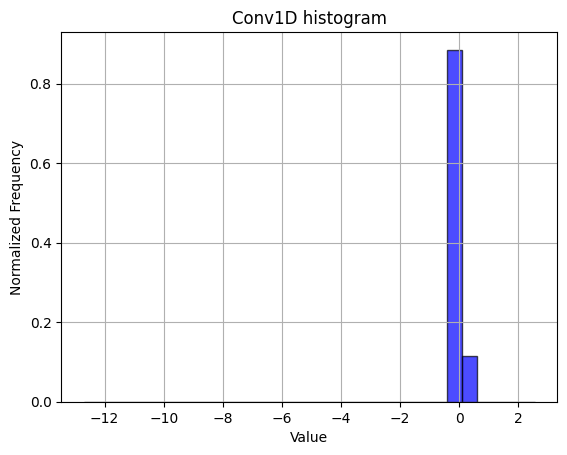

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 0.00000000e+00 7.15255737e-07 2.38418579e-07
 9.53674316e-07 1.19209290e-06 1.43051147e-06 3.33786011e-06
 1.14440918e-05 1.59740448e-05 3.19480896e-05 4.48226929e-04
 8.79144669e-03 1.14043474e-01 5.02145290e-01 3.28660727e-01
 4.30595875e-02 2.60758400e-03 1.29938126e-04 2.16960907e-05
 1.14440918e-05 5.00679016e-

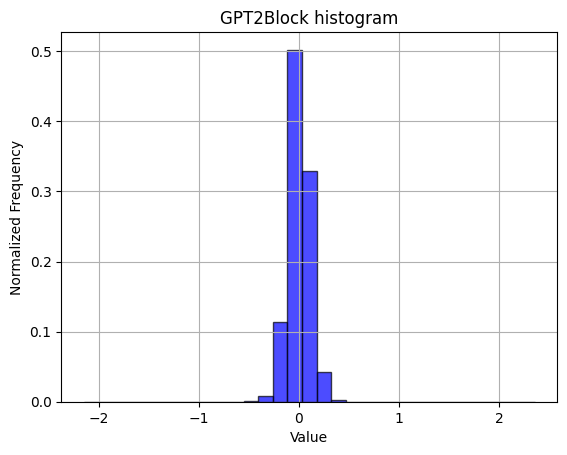

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 0.00000000e+00 0.00000000e+00 1.27156576e-06
 6.35782878e-07 3.17891439e-07 1.58945719e-06 4.45048014e-06
 5.72204590e-06 1.11262004e-05 2.82923381e-05 2.70843506e-04
 2.98849742e-03 2.55041122e-02 1.30423228e-01 3.35164706e-01
 3.39939117e-01 1.35188421e-01 2.69266764e-02 3.21420034e-03
 2.68936157e-04 3.46501668e-05 9.21885173e-06 4.13258870e-06
 3.81469727e-06 3.17891439e-06 6.35782878e-07 9.53674316e-07
 3.17891439e-07 3.17891439e-07 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


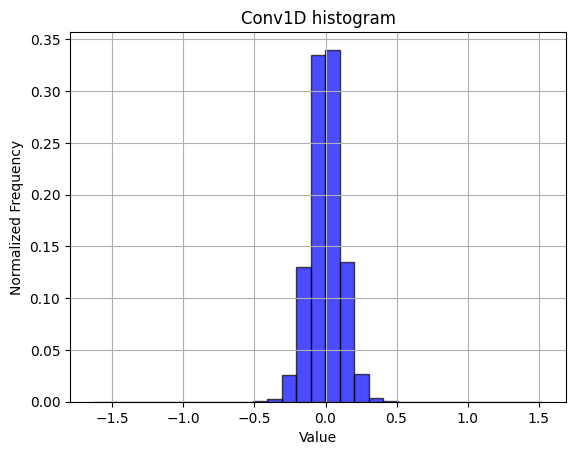

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 9.53674316e-07 0.00000000e+00 1.90734863e-06
 9.53674316e-07 5.72204590e-06 4.76837158e-06 1.33514404e-05
 1.71661377e-05 2.38418579e-05 2.95639038e-05 4.57763672e-05
 1.02043152e-04 2.61974335e-03 7.54613876e-02 4.72913742e-01
 3.98928642e-01 4.82034683e-02 1.39808655e-03 8.20159912e-05
 4.95910645e-05 4.29153442e-05 2.28881836e-05 1.04904175e-05
 1.04904175e-05 1.90734863e-06 3.81469727e-06 9.53674316e-07
 1.90734863e-06 0.00000000e+00 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


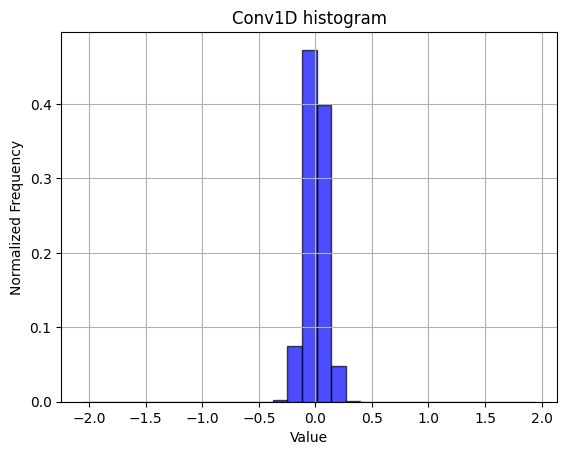

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 2.38418579e-07 0.00000000e+00 7.15255737e-07
 2.38418579e-07 1.90734863e-06 1.90734863e-06 3.81469727e-06
 6.91413879e-06 1.07288361e-05 1.50203705e-05 3.79085541e-05
 5.18560410e-04 9.70101357e-03 1.06300831e-01 4.27331924e-01
 3.73146296e-01 7.63065815e-02 6.23846054e-03 3.03506851e-04
 3.50475311e-05 1.66893005e-05 9.53674316e-06 5.00679016e-06
 3.33786011e-06 1.19209290e-06 1.19209290e-06 4.76837158e-07
 4.76837158e-07 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output size:  2


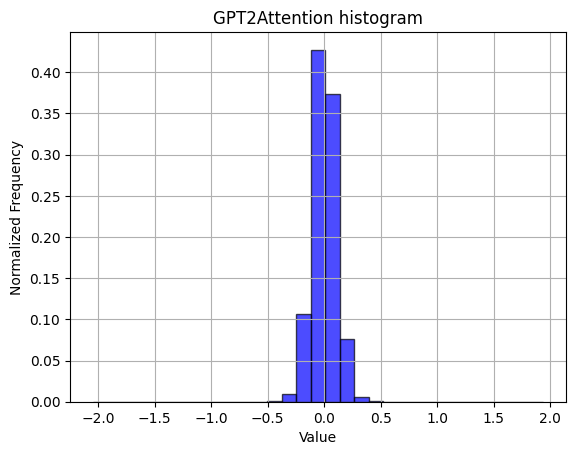

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 4.76837158e-07 9.53674316e-07 1.19209290e-06
 9.53674316e-07 1.43051147e-06 1.66893005e-06 2.38418579e-06
 6.19888306e-06 6.67572021e-06 1.19209290e-05 7.22408295e-05
 1.21617317e-03 1.59385204e-02 1.08135700e-01 3.23334932e-01
 3.66246462e-01 1.54490709e-01 2.78823376e-02 2.46763229e-03
 1.41143799e-04 1.85966492e-05 9.77516174e-06 4.76837158e-06
 2.62260437e-06 1.19209290e-06 1.43051147e-06 1.19209290e-06
 0.00000000e+00 2.38418579e-07 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


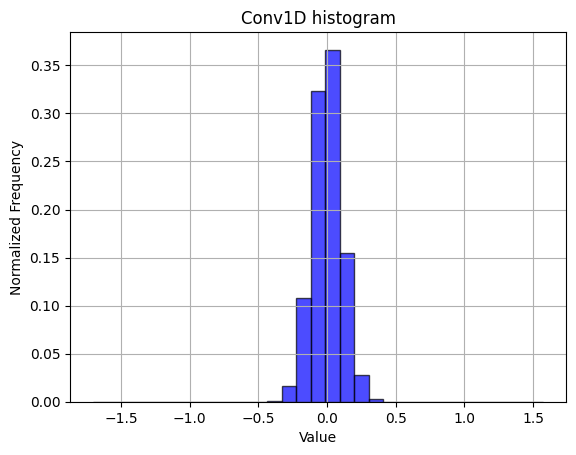

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.38418579e-07
 0.00000000e+00 1.66893005e-06 2.14576721e-06 6.91413879e-06
 6.46114349e-05 5.93636036e-01 4.06279087e-01 6.91413879e-06
 1.19209290e-06 7.15255737e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


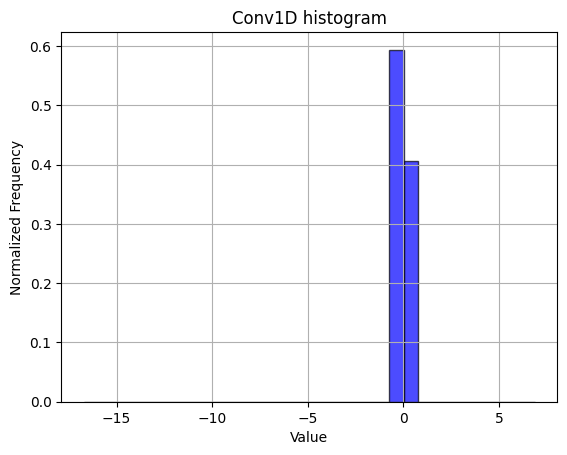

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 2.38418579e-07 0.00000000e+00 7.15255737e-07
 2.38418579e-07 1.90734863e-06 1.90734863e-06 3.81469727e-06
 6.91413879e-06 1.07288361e-05 1.50203705e-05 3.79085541e-05
 5.18560410e-04 9.70101357e-03 1.06300831e-01 4.27331924e-01
 3.73146296e-01 7.63065815e-02 6.23846054e-03 3.03506851e-04
 3.50475311e-05 1.66893005e-

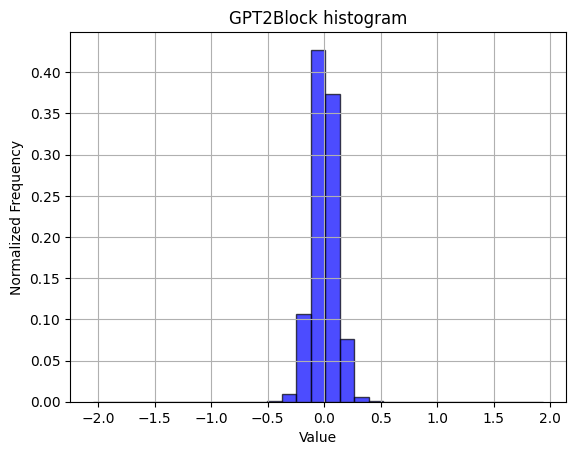

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 3.17891439e-07 1.27156576e-06 1.90734863e-06
 4.76837158e-06 7.94728597e-06 9.85463460e-06 1.08083089e-05
 2.00271606e-05 5.56310018e-05 2.95956930e-04 2.81461080e-03
 2.04172134e-02 9.61360931e-02 2.55046844e-01 3.40202967e-01
 2.05721855e-01 6.53069814e-02 1.21994019e-02 1.49885813e-03
 1.50044759e-04 3.71932983e-05 2.35239665e-05 1.17619832e-05
 7.94728597e-06 5.72204590e-06 2.22524007e-06 3.49680583e-06
 1.27156576e-06 1.27156576e-06 1.27156576e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


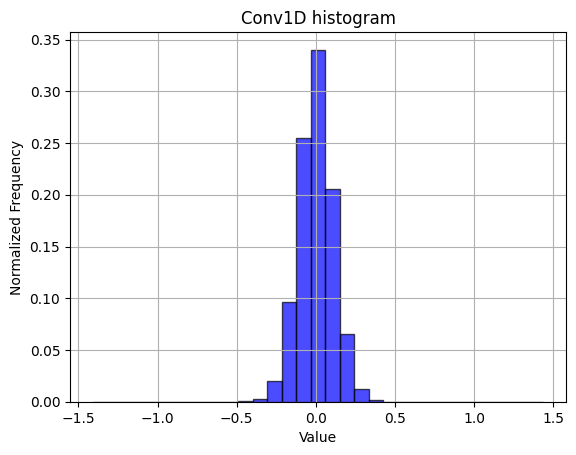

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.53674316e-07 9.53674316e-07 9.53674316e-07 9.53674316e-07
 1.90734863e-06 1.90734863e-06 1.14440918e-05 1.33514404e-05
 1.81198120e-05 6.38961792e-05 1.24931335e-04 7.10487366e-04
 1.07218742e-01 7.51155853e-01 1.39392853e-01 1.02233887e-03
 1.34468079e-04 6.77108765e-05 2.95639038e-05 1.04904175e-05
 5.72204590e-06 1.90734863e-06 4.76837158e-06 9.53674316e-07
 0.00000000e+00 1.90734863e-06 1.90734863e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


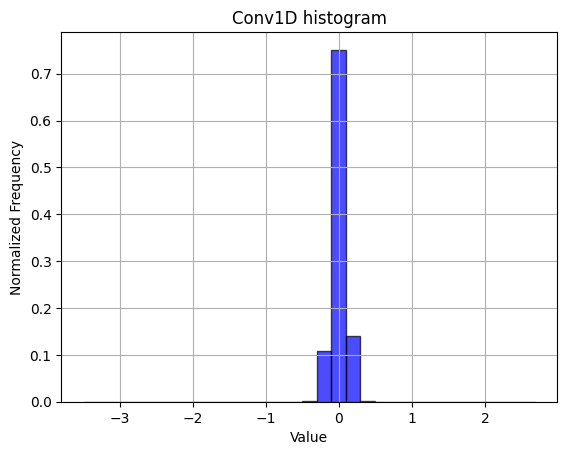

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 2.38418579e-07 2.38418579e-07 2.38418579e-07
 4.76837158e-07 4.76837158e-07 3.57627869e-06 5.24520874e-06
 1.16825104e-05 3.05175781e-05 8.24928284e-05 2.66742706e-03
 1.41016722e-01 6.78497314e-01 1.73790455e-01 3.74293327e-03
 9.01222229e-05 3.38554382e-05 1.35898590e-05 6.19888306e-06
 2.86102295e-06 4.76837158e-07 1.19209290e-06 2.38418579e-07
 0.00000000e+00 4.76837158e-07 4.76837158e-07]
1.0
Input size:  1
Output size:  2


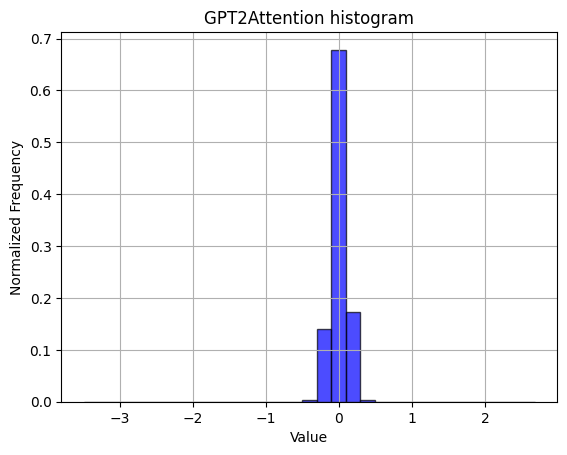

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 2.38418579e-07 0.00000000e+00 7.15255737e-07
 2.38418579e-07 2.38418579e-07 4.76837158e-07 4.76837158e-07
 2.38418579e-07 7.15255737e-07 4.76837158e-07 1.66893005e-06
 3.09944153e-06 8.10623169e-05 4.39119339e-03 8.57126713e-02
 4.28090811e-01 4.04223919e-01 7.38639832e-02 3.55911255e-03
 6.41345978e-05 9.53674316e-07 7.15255737e-07 7.15255737e-07
 4.76837158e-07 2.38418579e-07 2.38418579e-07 0.00000000e+00
 4.76837158e-07 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


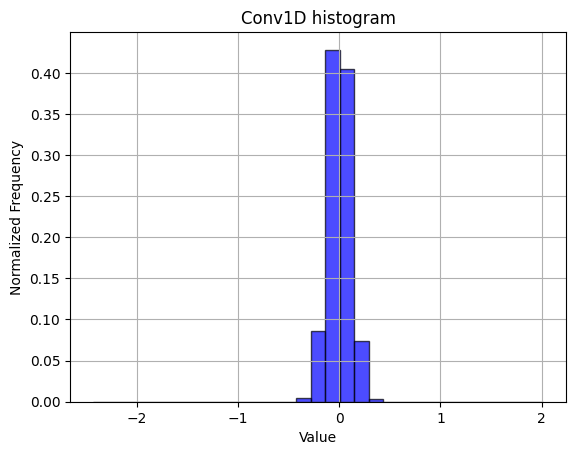

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[7.15255737e-07 9.53674316e-07 2.38418579e-06 9.53674316e-07
 1.90734863e-06 4.29153442e-06 5.24520874e-06 7.62939453e-06
 2.09808350e-05 5.29289246e-05 4.23192978e-04 1.77384138e-01
 8.03503036e-01 1.85139179e-02 5.50746918e-05 1.12056732e-05
 5.72204590e-06 1.43051147e-06 7.15255737e-07 9.53674316e-07
 4.76837158e-07 0.00000000e+00 4.76837158e-07 2.38418579e-07
 2.38418579e-07 2.38418579e-07 4.76837158e-07 2.38418579e-07
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


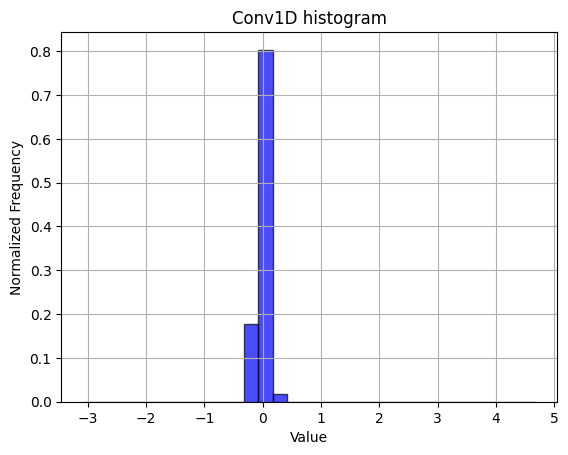

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 2.38418579e-07 2.38418579e-07 2.38418579e-07
 4.76837158e-07 4.76837158e-07 3.57627869e-06 5.24520874e-06
 1.16825104e-05 3.05175781e-05 8.24928284e-05 2.66742706e-03
 1.41016722e-01 6.78497314e-01 1.73790455e-01 3.74293327e-03
 9.01222229e-05 3.38554382e-

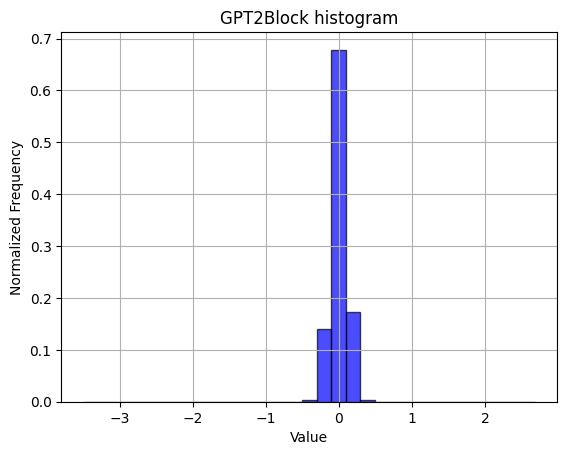

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 3.17891439e-07 0.00000000e+00 0.00000000e+00
 6.35782878e-07 9.53674316e-07 9.53674316e-07 2.54313151e-06
 6.35782878e-07 4.13258870e-06 6.35782878e-06 1.49408976e-05
 6.03993734e-05 6.07172648e-04 5.45628866e-03 3.58101527e-02
 1.45568212e-01 3.19051107e-01 3.14165115e-01 1.39760017e-01
 3.37705612e-02 5.06051381e-03 5.61078389e-04 6.77108765e-05
 1.49408976e-05 6.99361165e-06 2.54313151e-06 2.54313151e-06
 1.27156576e-06 3.17891439e-07 1.27156576e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


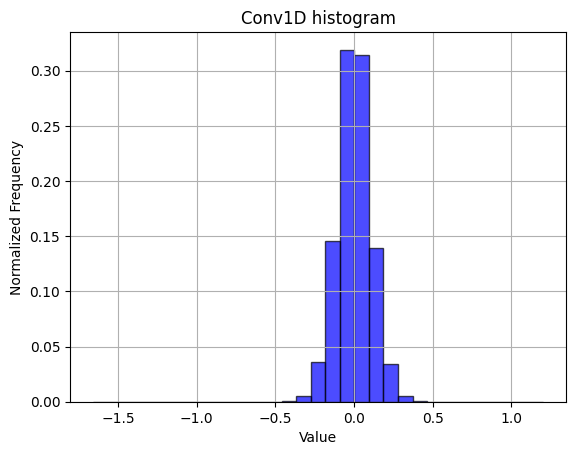

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.53674316e-07 9.53674316e-07 3.81469727e-06 1.90734863e-06
 2.86102295e-06 5.72204590e-06 5.72204590e-06 1.23977661e-05
 2.19345093e-05 3.14712524e-05 5.62667847e-05 3.29971313e-04
 4.40434456e-01 5.58563232e-01 3.96728516e-04 4.86373901e-05
 2.38418579e-05 2.00271606e-05 1.14440918e-05 8.58306885e-06
 5.72204590e-06 1.90734863e-06 3.81469727e-06 9.53674316e-07
 9.53674316e-07 9.53674316e-07 3.81469727e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


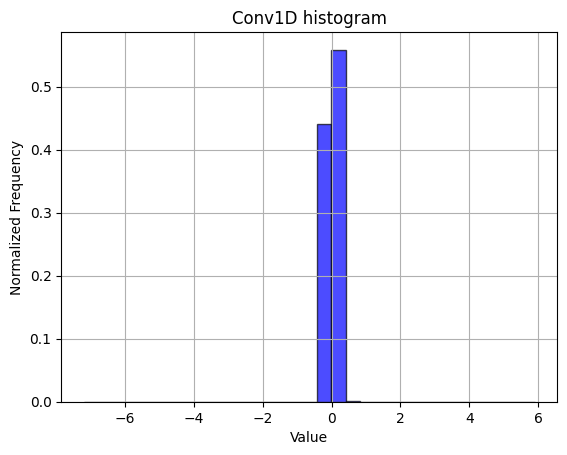

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 2.38418579e-07 9.53674316e-07 4.76837158e-07
 7.15255737e-07 1.43051147e-06 1.43051147e-06 3.09944153e-06
 5.48362732e-06 8.34465027e-06 1.83582306e-05 1.92403793e-04
 4.46748734e-01 5.52677631e-01 3.03506851e-04 1.62124634e-05
 5.96046448e-06 5.00679016e-06 2.86102295e-06 2.14576721e-06
 1.43051147e-06 4.76837158e-07 9.53674316e-07 2.38418579e-07
 2.38418579e-07 2.38418579e-07 9.53674316e-07]
1.0
Input size:  1
Output size:  2


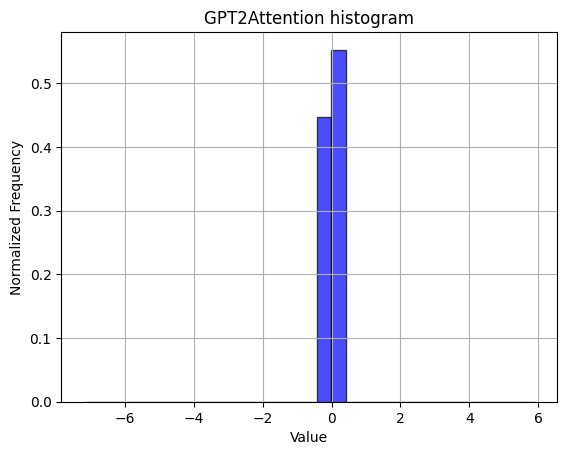

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 0.00000000e+00 4.76837158e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.53674316e-07 1.31559372e-03 3.23323250e-01 6.61704302e-01
 1.36494637e-02 4.05311584e-06 7.15255737e-07 2.38418579e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.38418579e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


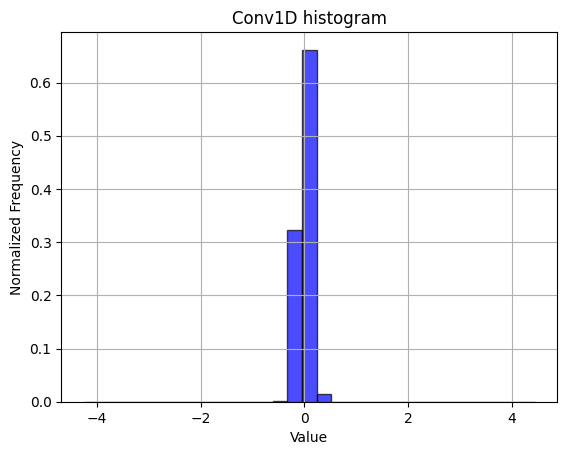

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.15255737e-07 4.76837158e-07 2.38418579e-07
 9.53674316e-07 9.53674316e-07 5.24520874e-06 9.53674316e-06
 6.53266907e-05 1.19245052e-02 9.28869963e-01 5.89959621e-02
 1.13010406e-04 8.10623169e-06 2.14576721e-06 7.15255737e-07
 0.00000000e+00 1.19209290e-06 0.00000000e+00 0.00000000e+00
 2.38418579e-07 2.38418579e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


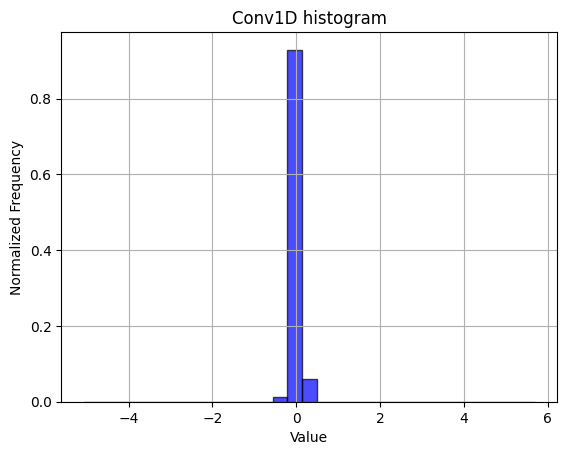

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 2.38418579e-07 9.53674316e-07 4.76837158e-07
 7.15255737e-07 1.43051147e-06 1.43051147e-06 3.09944153e-06
 5.48362732e-06 8.34465027e-06 1.83582306e-05 1.92403793e-04
 4.46748734e-01 5.52677631e-01 3.03506851e-04 1.62124634e-05
 5.96046448e-06 5.00679016e-

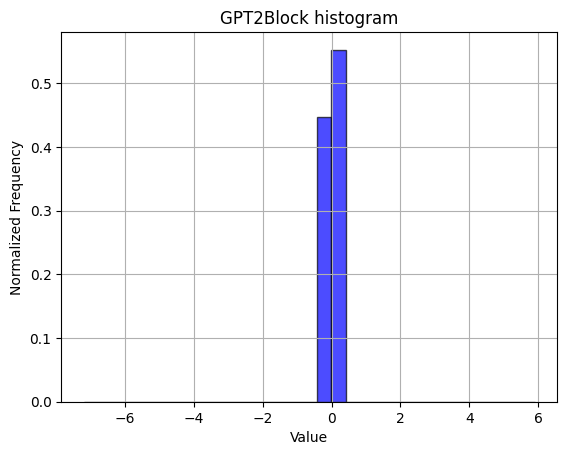

Module: Conv1D
Operation: Conv1D()
[2.22524007e-06 3.17891439e-07 2.54313151e-06 3.49680583e-06
 4.76837158e-06 1.33514404e-05 4.03722127e-05 2.58127848e-04
 1.81484222e-03 1.10753377e-02 4.89934285e-02 1.47919019e-01
 2.78094292e-01 2.85205205e-01 1.57868703e-01 5.37834167e-02
 1.24607086e-02 2.07328796e-03 3.07718913e-04 4.41869100e-05
 1.81198120e-05 4.13258870e-06 4.13258870e-06 3.49680583e-06
 2.22524007e-06 1.27156576e-06 6.35782878e-07 0.00000000e+00
 3.17891439e-07 0.00000000e+00 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


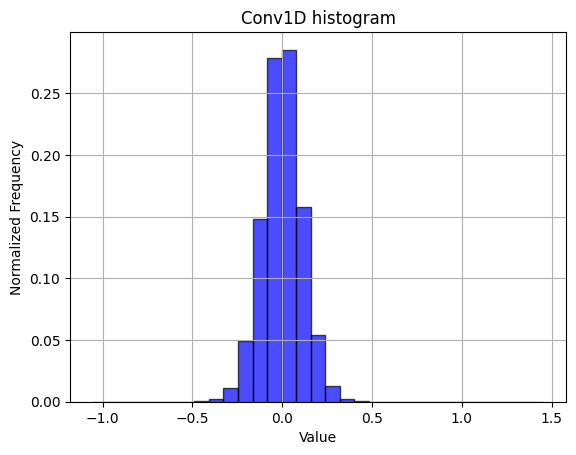

Module: Conv1D
Operation: Conv1D()
[1.90734863e-06 0.00000000e+00 2.86102295e-06 5.72204590e-06
 5.72204590e-06 4.76837158e-06 7.62939453e-06 1.23977661e-05
 1.62124634e-05 1.90734863e-05 4.57763672e-05 1.16348267e-04
 1.77955627e-03 6.24412537e-01 3.72607231e-01 7.60078430e-04
 8.39233398e-05 3.81469727e-05 2.57492065e-05 1.81198120e-05
 1.71661377e-05 3.81469727e-06 3.81469727e-06 9.53674316e-07
 9.53674316e-07 9.53674316e-07 3.81469727e-06 9.53674316e-07
 1.90734863e-06 0.00000000e+00 1.90734863e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


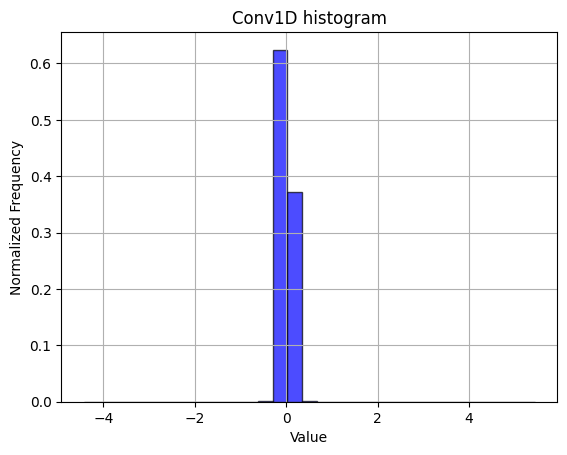

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[4.76837158e-07 0.00000000e+00 7.15255737e-07 1.43051147e-06
 1.43051147e-06 1.19209290e-06 1.90734863e-06 3.09944153e-06
 4.05311584e-06 4.76837158e-06 1.33514404e-05 4.14848328e-05
 4.12869453e-03 6.06579304e-01 3.87960911e-01 1.19519234e-03
 3.07559967e-05 1.09672546e-05 6.67572021e-06 4.52995300e-06
 4.29153442e-06 9.53674316e-07 9.53674316e-07 2.38418579e-07
 2.38418579e-07 2.38418579e-07 9.53674316e-07 2.38418579e-07
 4.76837158e-07 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output size:  2


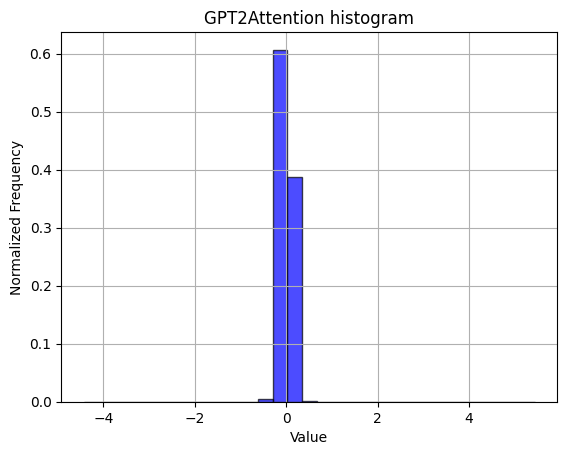

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 2.38418579e-07 0.00000000e+00 2.38418579e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 4.76837158e-07 2.38418579e-07 0.00000000e+00
 4.76837158e-07 1.90734863e-06 2.03847885e-04 1.76582336e-02
 2.86447287e-01 5.67875624e-01 1.23936176e-01 3.84354591e-03
 2.74181366e-05 1.43051147e-06 2.38418579e-07 2.38418579e-07
 2.38418579e-07 2.38418579e-07 2.38418579e-07 7.15255737e-07
 0.00000000e+00 2.38418579e-07 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


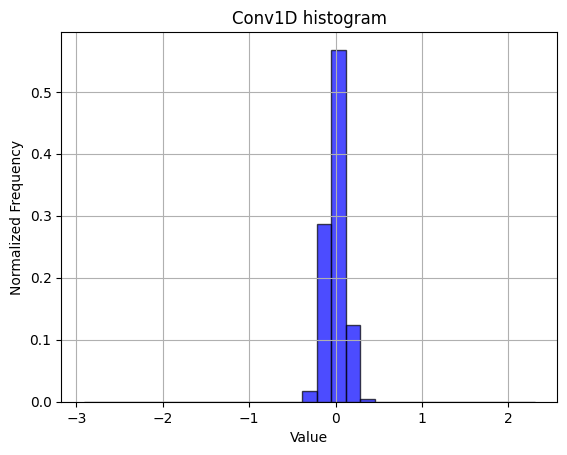

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 4.76837158e-07 2.38418579e-07 4.76837158e-07
 2.38418579e-07 7.15255737e-07 2.38418579e-07 1.66893005e-06
 3.33786011e-06 9.05990601e-06 4.67300415e-05 1.50275230e-03
 5.49876690e-01 4.47542906e-01 9.68694687e-04 3.26633453e-05
 8.34465027e-06 1.90734863e-06 7.15255737e-07 2.38418579e-07
 7.15255737e-07 2.38418579e-07 2.38418579e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


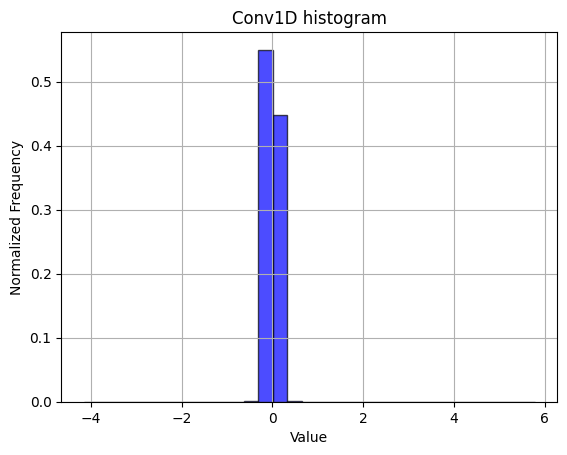

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[4.76837158e-07 0.00000000e+00 7.15255737e-07 1.43051147e-06
 1.43051147e-06 1.19209290e-06 1.90734863e-06 3.09944153e-06
 4.05311584e-06 4.76837158e-06 1.33514404e-05 4.14848328e-05
 4.12869453e-03 6.06579304e-01 3.87960911e-01 1.19519234e-03
 3.07559967e-05 1.09672546e-05 6.67572021e-06 4.52995300e-06
 4.29153442e-06 9.53674316e-

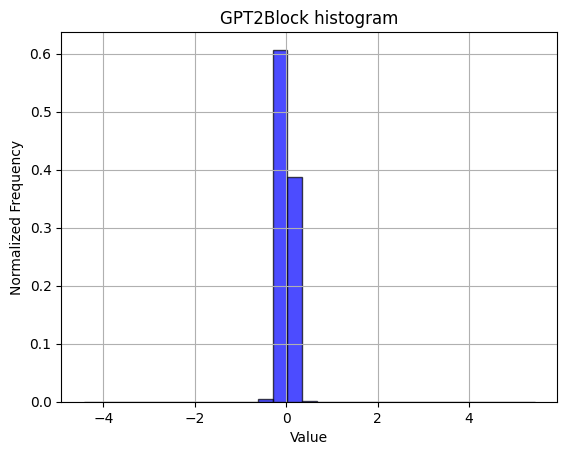

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 6.35782878e-07 0.00000000e+00 6.35782878e-07
 9.53674316e-07 1.27156576e-06 1.27156576e-06 3.49680583e-06
 5.40415446e-06 8.58306885e-06 2.47955322e-05 1.41461690e-04
 3.11756134e-03 5.03679911e-02 2.94799169e-01 4.60927327e-01
 1.70681636e-01 1.89069112e-02 9.24110413e-04 5.56310018e-05
 1.23977661e-05 7.94728597e-06 3.17891439e-06 2.54313151e-06
 2.22524007e-06 6.35782878e-07 9.53674316e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


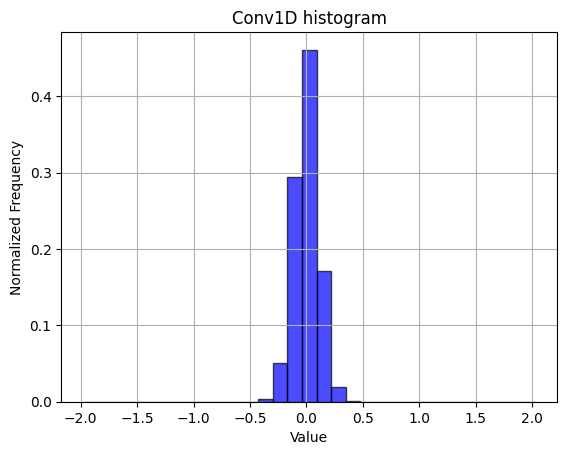

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 1.90734863e-06 2.86102295e-06 1.90734863e-06
 1.90734863e-06 2.86102295e-06 3.81469727e-06 8.58306885e-06
 1.23977661e-05 1.14440918e-05 2.00271606e-05 6.86645508e-05
 4.06265259e-04 2.65417099e-02 6.13788605e-01 3.53046417e-01
 5.74588776e-03 2.05993652e-04 4.95910645e-05 2.28881836e-05
 1.52587891e-05 8.58306885e-06 1.14440918e-05 5.72204590e-06
 4.76837158e-06 0.00000000e+00 3.81469727e-06 1.90734863e-06
 9.53674316e-07 1.90734863e-06 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


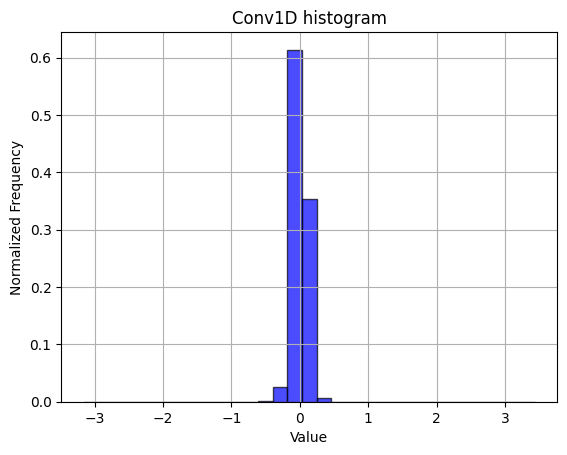

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 4.76837158e-07 7.15255737e-07 4.76837158e-07
 4.76837158e-07 1.19209290e-06 1.66893005e-06 2.62260437e-06
 4.29153442e-06 5.00679016e-06 1.07288361e-05 3.31401825e-05
 3.33547592e-04 3.82688046e-02 5.90277910e-01 3.61118793e-01
 9.77683067e-03 1.13964081e-04 2.28881836e-05 9.05990601e-06
 5.72204590e-06 3.33786011e-06 2.86102295e-06 1.43051147e-06
 1.43051147e-06 0.00000000e+00 9.53674316e-07 4.76837158e-07
 2.38418579e-07 4.76837158e-07 2.38418579e-07]
1.0
Input size:  1
Output size:  2


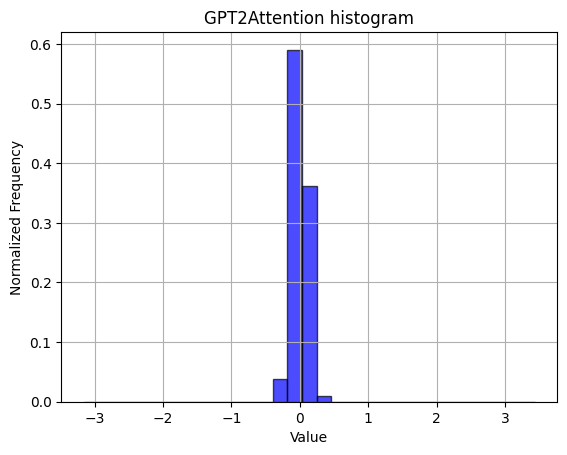

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 4.76837158e-07
 4.76837158e-07 0.00000000e+00 2.38418579e-07 0.00000000e+00
 2.38418579e-07 1.43051147e-06 4.29153442e-06 1.64508820e-04
 1.00302696e-02 1.67976141e-01 5.29728174e-01 2.67654181e-01
 2.39112377e-02 5.19037247e-04 6.19888306e-06 9.53674316e-07
 7.15255737e-07 4.76837158e-07 2.38418579e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


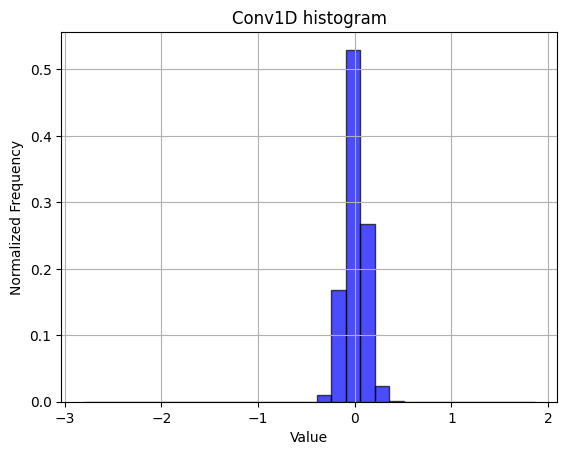

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 7.15255737e-07
 2.38418579e-07 7.15255737e-07 4.76837158e-07 2.62260437e-06
 4.76837158e-06 1.12056732e-05 3.48091125e-05 4.79459763e-04
 6.11696243e-02 7.58285046e-01 1.78433180e-01 1.50132179e-03
 5.65052032e-05 9.29832458e-06 4.52995300e-06 2.14576721e-06
 9.53674316e-07 7.15255737e-07 4.76837158e-07 0.00000000e+00
 4.76837158e-07 2.38418579e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


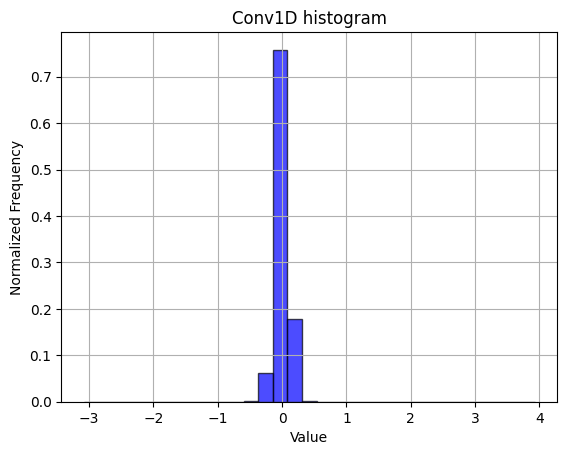

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 4.76837158e-07 7.15255737e-07 4.76837158e-07
 4.76837158e-07 1.19209290e-06 1.66893005e-06 2.62260437e-06
 4.29153442e-06 5.00679016e-06 1.07288361e-05 3.31401825e-05
 3.33547592e-04 3.82688046e-02 5.90277910e-01 3.61118793e-01
 9.77683067e-03 1.13964081e-04 2.28881836e-05 9.05990601e-06
 5.72204590e-06 3.33786011e-

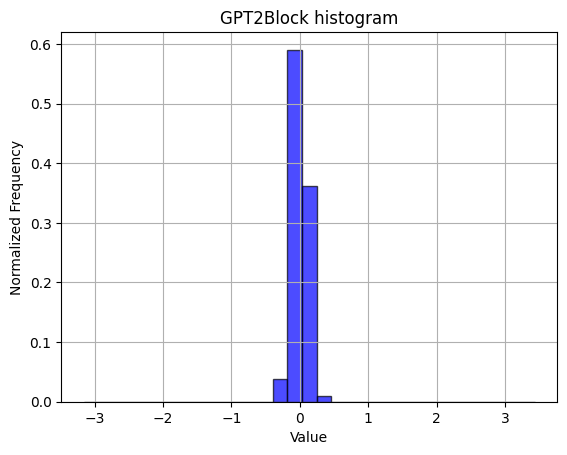

Module: Conv1D
Operation: Conv1D()
[6.35782878e-07 9.53674316e-07 3.17891439e-07 6.35782878e-07
 3.17891439e-06 2.54313151e-06 8.26517741e-06 1.01725260e-05
 3.84648641e-05 3.34103902e-04 2.49290466e-03 1.53115590e-02
 6.51439031e-02 1.80347761e-01 2.98511823e-01 2.61280060e-01
 1.28637314e-01 3.87334824e-02 7.84937541e-03 1.11420949e-03
 1.34785970e-04 2.28881836e-05 1.17619832e-05 3.81469727e-06
 1.58945719e-06 1.27156576e-06 6.35782878e-07 9.53674316e-07
 3.17891439e-07 0.00000000e+00 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


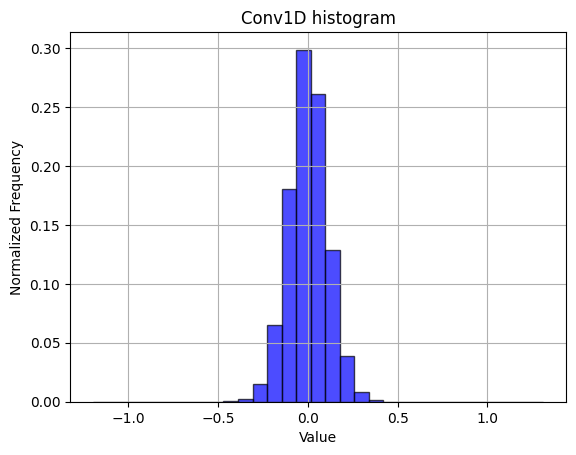

Module: Conv1D
Operation: Conv1D()
[1.90734863e-06 0.00000000e+00 0.00000000e+00 9.53674316e-07
 9.53674316e-07 0.00000000e+00 0.00000000e+00 2.86102295e-06
 3.81469727e-06 2.86102295e-06 7.62939453e-06 1.62124634e-05
 5.53131104e-05 1.27792358e-04 9.62257385e-04 3.81145477e-02
 4.10950661e-01 4.86898422e-01 6.10046387e-02 1.61075592e-03
 1.43051147e-04 5.62667847e-05 1.90734863e-05 7.62939453e-06
 6.67572021e-06 9.53674316e-07 1.90734863e-06 9.53674316e-07
 9.53674316e-07 0.00000000e+00 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


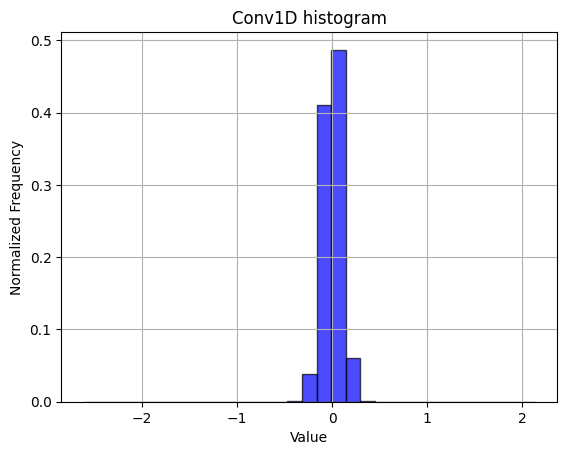

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[4.76837158e-07 0.00000000e+00 0.00000000e+00 2.38418579e-07
 2.38418579e-07 0.00000000e+00 0.00000000e+00 7.15255737e-07
 9.53674316e-07 1.90734863e-06 2.14576721e-06 7.15255737e-06
 2.19345093e-05 6.86645508e-05 1.95574760e-03 5.39650917e-02
 3.99039745e-01 4.61892843e-01 7.96108246e-02 3.30066681e-03
 9.36985016e-05 2.38418579e-05 6.43730164e-06 3.09944153e-06
 1.90734863e-06 4.76837158e-07 4.76837158e-07 2.38418579e-07
 2.38418579e-07 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output size:  2


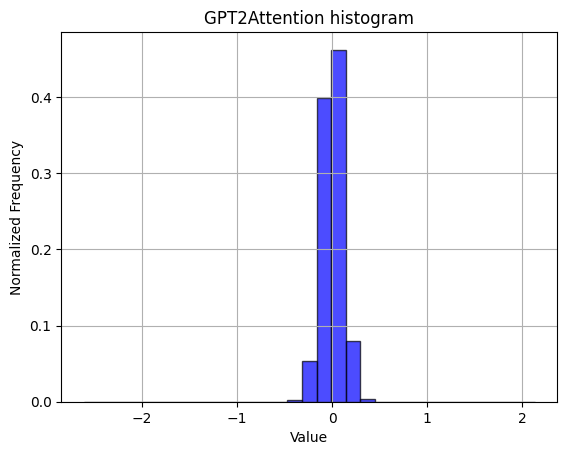

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 0.00000000e+00
 4.76837158e-07 4.76837158e-07 2.78949738e-05 2.74729729e-03
 8.45026970e-02 4.69529629e-01 3.91975641e-01 4.99308109e-02
 1.27291679e-03 9.53674316e-06 7.15255737e-07 7.15255737e-07
 4.76837158e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


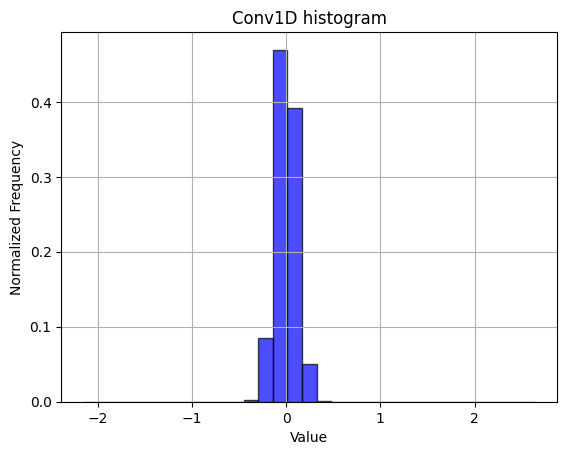

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 4.76837158e-07
 4.76837158e-07 9.53674316e-07 3.09944153e-06 6.91413879e-06
 4.05311584e-05 6.49213791e-04 3.59258652e-02 5.08008718e-01
 4.31949139e-01 2.29418278e-02 4.34160233e-04 2.95639038e-05
 5.00679016e-06 1.43051147e-06 7.15255737e-07 4.76837158e-07
 2.38418579e-07 2.38418579e-07 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


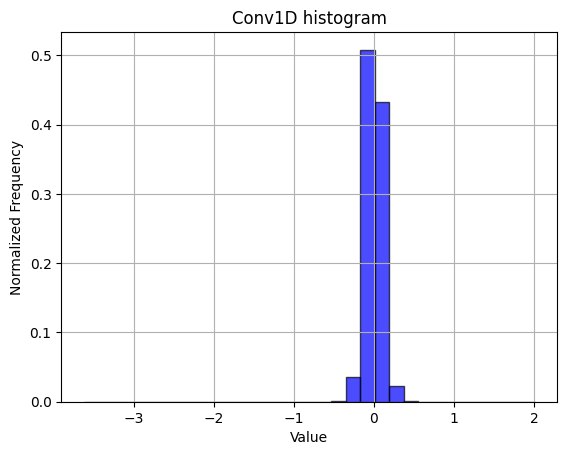

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[4.76837158e-07 0.00000000e+00 0.00000000e+00 2.38418579e-07
 2.38418579e-07 0.00000000e+00 0.00000000e+00 7.15255737e-07
 9.53674316e-07 1.90734863e-06 2.14576721e-06 7.15255737e-06
 2.19345093e-05 6.86645508e-05 1.95574760e-03 5.39650917e-02
 3.99039745e-01 4.61892843e-01 7.96108246e-02 3.30066681e-03
 9.36985016e-05 2.38418579e-

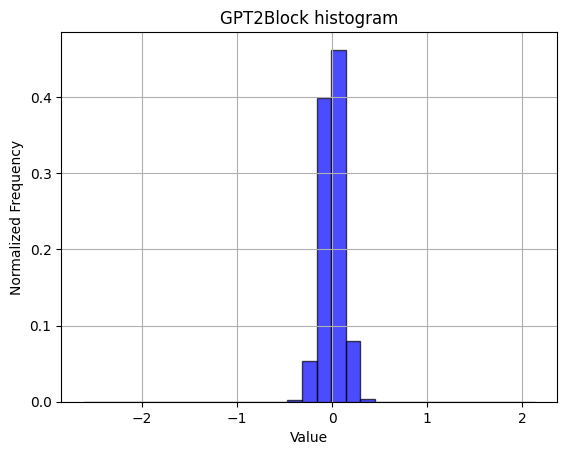

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 0.00000000e+00 0.00000000e+00 3.17891439e-07
 6.35782878e-07 6.35782878e-07 6.35782878e-07 2.86102295e-06
 2.86102295e-06 6.03993734e-06 9.85463460e-06 2.03450521e-05
 3.87827555e-05 2.55584717e-04 3.96315257e-03 4.05565898e-02
 1.99522972e-01 4.01433627e-01 2.73182869e-01 7.16749827e-02
 8.67843628e-03 5.46773275e-04 5.05447388e-05 2.47955322e-05
 1.08083089e-05 6.99361165e-06 5.08626302e-06 1.90734863e-06
 6.35782878e-07 3.17891439e-07 6.35782878e-07]
1.0000000000000002
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


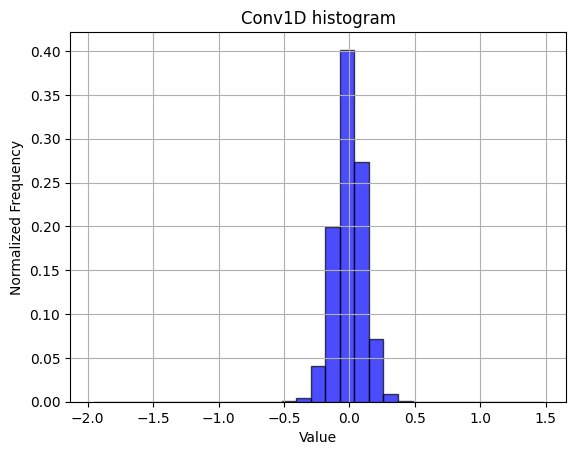

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 9.53674316e-07 0.00000000e+00
 2.86102295e-06 2.86102295e-06 5.72204590e-06 1.52587891e-05
 2.09808350e-05 5.24520874e-05 8.67843628e-05 3.09944153e-04
 2.93731689e-03 3.93018723e-02 2.34077454e-01 4.47340012e-01
 2.33210564e-01 3.91569138e-02 2.96020508e-03 2.98500061e-04
 1.14440918e-04 5.72204590e-05 2.19345093e-05 1.04904175e-05
 3.81469727e-06 3.81469727e-06 1.90734863e-06 1.90734863e-06
 9.53674316e-07 9.53674316e-07 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


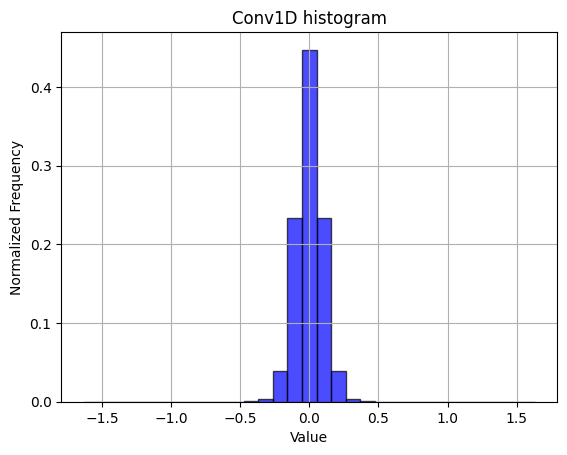

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 0.00000000e+00 2.38418579e-07 2.38418579e-07
 4.76837158e-07 9.53674316e-07 1.19209290e-06 2.86102295e-06
 4.76837158e-06 8.34465027e-06 1.81198120e-05 3.74317169e-05
 9.32216644e-05 1.11556053e-03 1.63207054e-02 1.26034260e-01
 3.87814522e-01 3.55181694e-01 1.00705862e-01 1.17728710e-02
 7.44819641e-04 7.82012939e-05 3.31401825e-05 1.28746033e-05
 7.86781311e-06 4.76837158e-06 2.38418579e-06 7.15255737e-07
 9.53674316e-07 4.76837158e-07 2.38418579e-07]
1.0
Input size:  1
Output size:  2


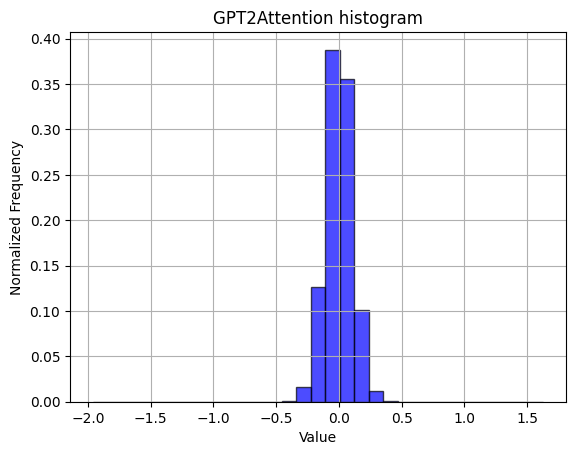

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 4.76837158e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.38418579e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.76837158e-07
 0.00000000e+00 2.38418579e-06 1.21593475e-05 2.08616257e-04
 3.02243233e-03 2.57034302e-02 1.20741606e-01 2.90496826e-01
 3.30149174e-01 1.76105499e-01 4.64251041e-02 6.56223297e-03
 5.33342361e-04 3.19480896e-05 2.62260437e-06 4.76837158e-07
 0.00000000e+00 4.76837158e-07 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


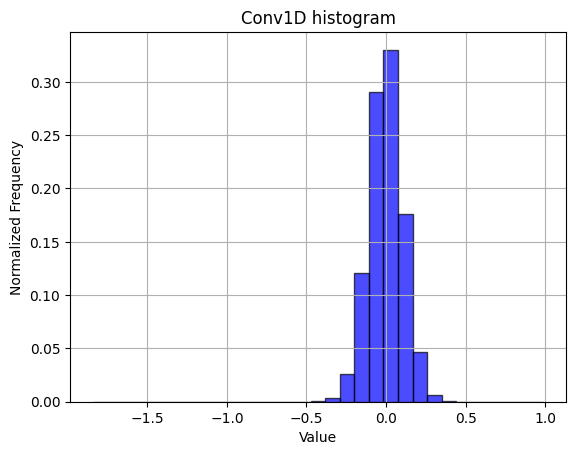

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 9.53674316e-07
 4.76837158e-07 1.19209290e-06 2.14576721e-06 7.62939453e-06
 2.78949738e-05 2.17199326e-04 6.06465340e-03 1.83075905e-01
 6.26139879e-01 1.78430319e-01 5.78904152e-03 1.93595886e-04
 3.05175781e-05 1.00135803e-05 3.81469727e-06 1.19209290e-06
 7.15255737e-07 9.53674316e-07 7.15255737e-07 2.38418579e-07
 2.38418579e-07 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


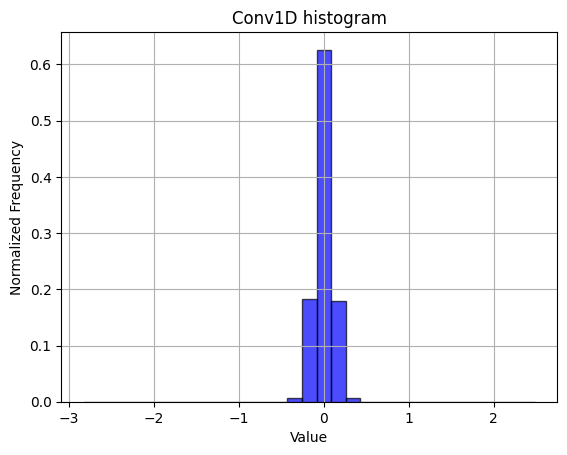

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 0.00000000e+00 2.38418579e-07 2.38418579e-07
 4.76837158e-07 9.53674316e-07 1.19209290e-06 2.86102295e-06
 4.76837158e-06 8.34465027e-06 1.81198120e-05 3.74317169e-05
 9.32216644e-05 1.11556053e-03 1.63207054e-02 1.26034260e-01
 3.87814522e-01 3.55181694e-01 1.00705862e-01 1.17728710e-02
 7.44819641e-04 7.82012939e-

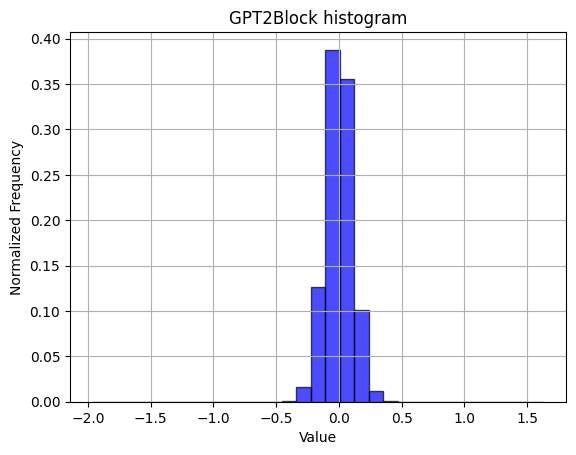

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 3.17891439e-07 3.17891439e-07 3.17891439e-07
 0.00000000e+00 3.17891439e-07 1.58945719e-06 2.22524007e-06
 2.22524007e-06 5.08626302e-06 1.04904175e-05 2.54313151e-05
 1.02043152e-04 1.45943960e-03 1.90162659e-02 1.26242320e-01
 3.48910650e-01 3.53157997e-01 1.29492760e-01 1.98621750e-02
 1.55417124e-03 1.05539958e-04 2.44776408e-05 1.27156576e-05
 5.08626302e-06 2.22524007e-06 1.27156576e-06 6.35782878e-07
 9.53674316e-07 0.00000000e+00 6.35782878e-07]
1.0000000000000002
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


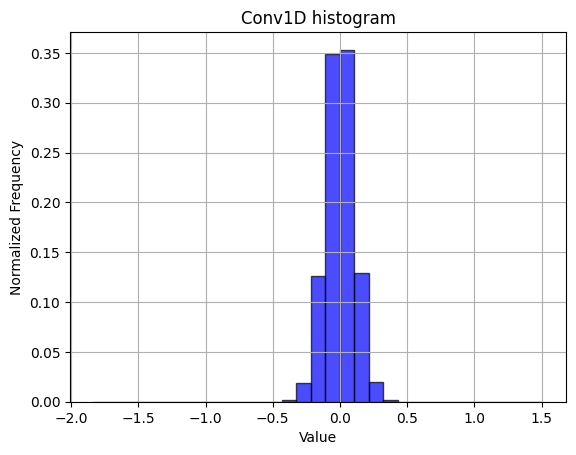

Module: Conv1D
Operation: Conv1D()
[1.90734863e-06 0.00000000e+00 4.76837158e-06 4.76837158e-06
 5.72204590e-06 3.81469727e-06 1.33514404e-05 2.00271606e-05
 4.95910645e-05 1.32560730e-04 5.05447388e-04 1.25579834e-02
 1.92374229e-01 5.41108131e-01 2.34428406e-01 1.79004669e-02
 6.31332397e-04 1.22070312e-04 6.77108765e-05 3.24249268e-05
 1.90734863e-05 4.76837158e-06 1.90734863e-06 2.86102295e-06
 2.86102295e-06 1.90734863e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.90734863e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


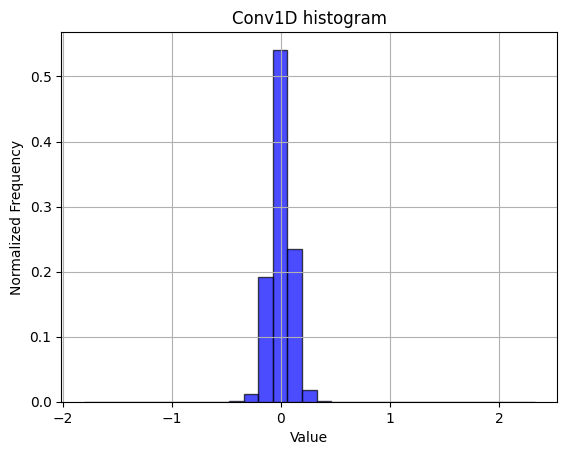

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[4.76837158e-07 4.76837158e-07 1.43051147e-06 1.43051147e-06
 1.43051147e-06 2.62260437e-06 4.52995300e-06 9.53674316e-06
 2.09808350e-05 6.41345978e-05 5.51223755e-04 1.41844749e-02
 1.64573669e-01 4.86916065e-01 2.91827440e-01 3.98166180e-02
 1.86038017e-03 9.91821289e-05 3.64780426e-05 1.40666962e-05
 6.67572021e-06 2.38418579e-06 1.19209290e-06 7.15255737e-07
 1.43051147e-06 4.76837158e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output size:  2


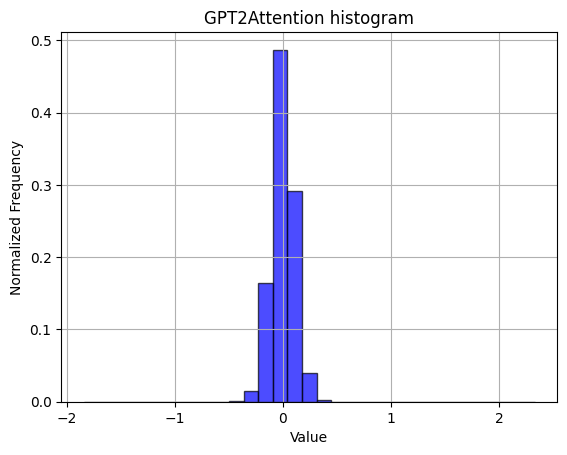

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 0.00000000e+00
 0.00000000e+00 2.38418579e-07 2.38418579e-07 4.76837158e-07
 1.66893005e-06 1.12056732e-05 3.19480896e-04 6.43920898e-03
 6.28447533e-02 2.57399559e-01 3.96660089e-01 2.23920822e-01
 4.78398800e-02 4.35161591e-03 2.02894211e-04 5.96046448e-06
 7.15255737e-07 4.76837158e-07 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


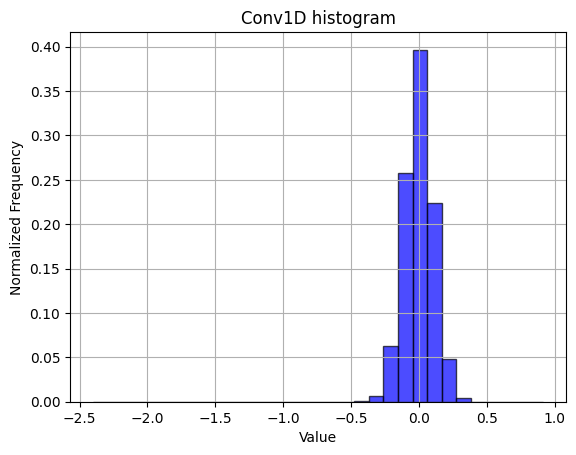

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 2.38418579e-07 0.00000000e+00
 2.38418579e-07 4.76837158e-07 2.14576721e-06 3.57627869e-06
 8.82148743e-06 3.48091125e-05 1.54256821e-04 1.51944160e-03
 3.11393738e-02 2.89376259e-01 5.12544155e-01 1.53967381e-01
 1.05288029e-02 5.91993332e-04 8.79764557e-05 2.38418579e-05
 9.29832458e-06 2.38418579e-06 1.43051147e-06 7.15255737e-07
 4.76837158e-07 4.76837158e-07 2.38418579e-07 0.00000000e+00
 2.38418579e-07 0.00000000e+00 7.15255737e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


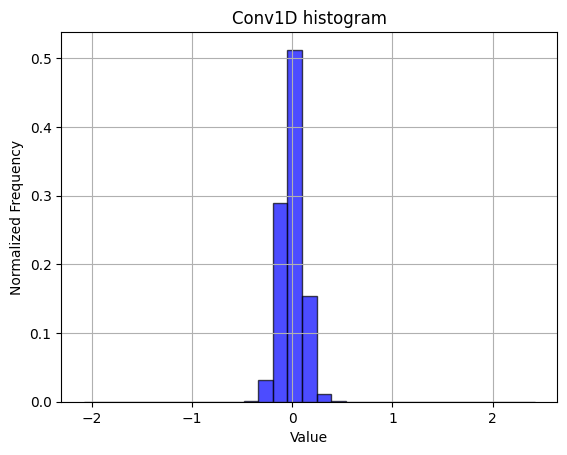

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[4.76837158e-07 4.76837158e-07 1.43051147e-06 1.43051147e-06
 1.43051147e-06 2.62260437e-06 4.52995300e-06 9.53674316e-06
 2.09808350e-05 6.41345978e-05 5.51223755e-04 1.41844749e-02
 1.64573669e-01 4.86916065e-01 2.91827440e-01 3.98166180e-02
 1.86038017e-03 9.91821289e-05 3.64780426e-05 1.40666962e-05
 6.67572021e-06 2.38418579e-

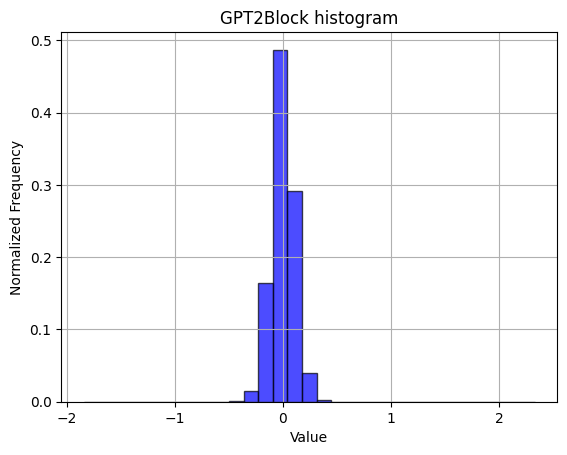

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 0.00000000e+00 3.17891439e-07 3.17891439e-07
 6.35782878e-07 6.35782878e-07 2.22524007e-06 2.86102295e-06
 6.67572021e-06 1.33514404e-05 3.08354696e-05 2.06311544e-04
 4.61133321e-03 5.65309525e-02 2.67117182e-01 4.22489166e-01
 2.10584323e-01 3.57650121e-02 2.47001648e-03 1.18573507e-04
 2.28881836e-05 8.26517741e-06 6.99361165e-06 3.81469727e-06
 2.86102295e-06 1.58945719e-06 1.58945719e-06 0.00000000e+00
 6.35782878e-07 0.00000000e+00 3.17891439e-07]
0.9999999999999999
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


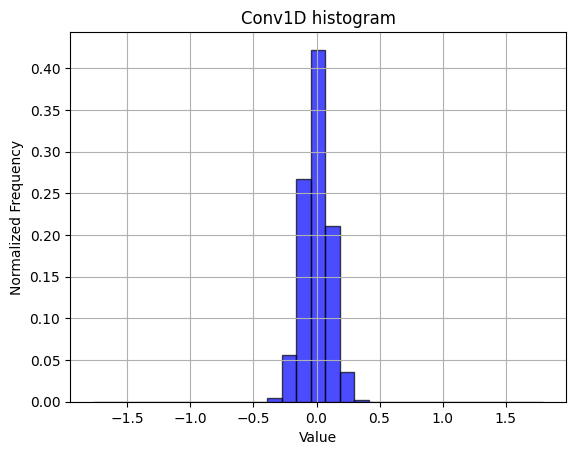

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 1.90734863e-06 0.00000000e+00 4.76837158e-06
 9.53674316e-06 1.52587891e-05 4.10079956e-05 4.86373901e-05
 8.96453857e-05 2.53677368e-04 1.78813934e-03 1.85651779e-02
 1.14259720e-01 3.25663567e-01 3.58912468e-01 1.49676323e-01
 2.71787643e-02 2.87628174e-03 3.29971313e-04 1.24931335e-04
 6.00814819e-05 3.91006470e-05 2.57492065e-05 1.43051147e-05
 1.14440918e-05 1.90734863e-06 1.90734863e-06 1.90734863e-06
 9.53674316e-07 9.53674316e-07 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


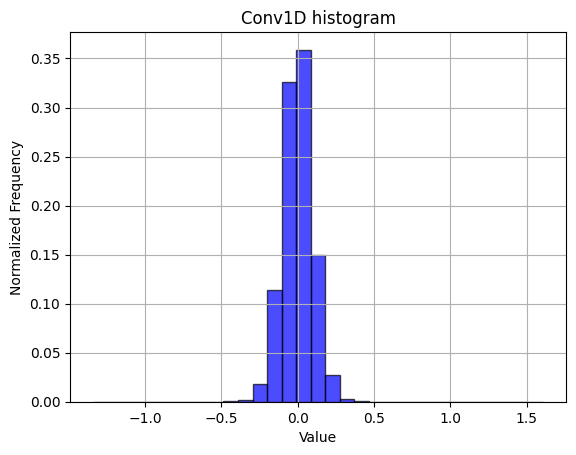

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 0.00000000e+00 2.38418579e-07 4.76837158e-07
 4.76837158e-07 9.53674316e-07 2.38418579e-06 5.24520874e-06
 1.16825104e-05 2.31266022e-05 4.62532043e-05 2.22444534e-04
 4.21261787e-03 5.34060001e-02 2.66492128e-01 4.31557178e-01
 2.08108187e-01 3.34131718e-02 2.26783752e-03 1.43527985e-04
 4.07695770e-05 1.71661377e-05 1.31130219e-05 5.72204590e-06
 4.05311584e-06 1.90734863e-06 1.66893005e-06 2.38418579e-07
 7.15255737e-07 2.38418579e-07 2.38418579e-07]
1.0
Input size:  1
Output size:  2


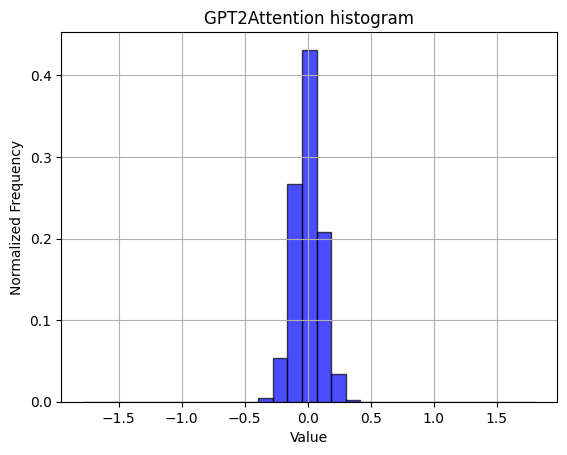

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 4.76837158e-07
 1.19209290e-06 6.91413879e-06 9.40084457e-04 5.06725311e-02
 4.20997858e-01 4.60188389e-01 6.58237934e-02 1.35684013e-03
 1.04904175e-05 4.76837158e-07 0.00000000e+00 2.38418579e-07
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


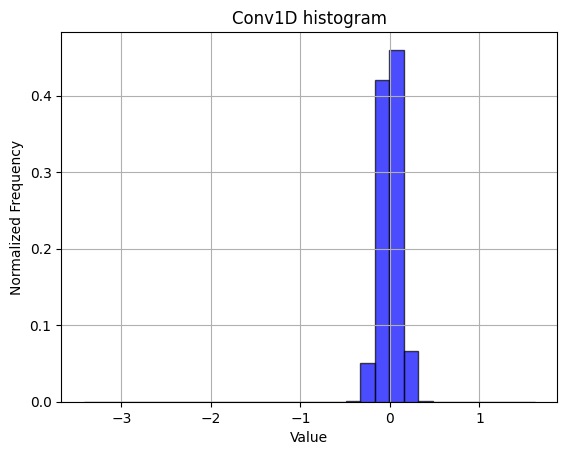

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.38418579e-07 0.00000000e+00 4.76837158e-07
 9.53674316e-07 1.90734863e-06 1.66893005e-05 4.92572784e-04
 7.68234730e-02 7.88858175e-01 1.32888317e-01 8.63075256e-04
 3.81469727e-05 6.91413879e-06 5.00679016e-06 1.66893005e-06
 4.76837158e-07 7.15255737e-07 2.38418579e-07 2.38418579e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


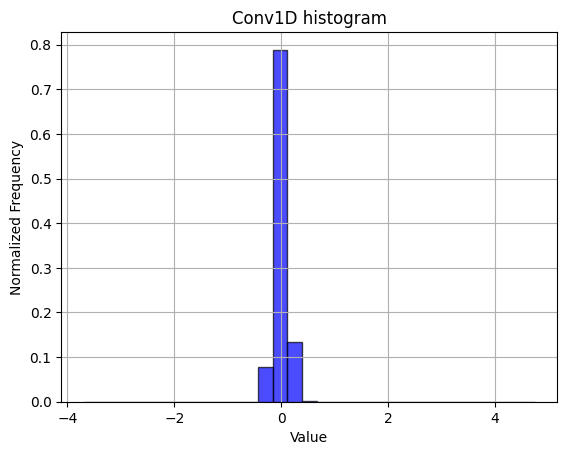

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 0.00000000e+00 2.38418579e-07 4.76837158e-07
 4.76837158e-07 9.53674316e-07 2.38418579e-06 5.24520874e-06
 1.16825104e-05 2.31266022e-05 4.62532043e-05 2.22444534e-04
 4.21261787e-03 5.34060001e-02 2.66492128e-01 4.31557178e-01
 2.08108187e-01 3.34131718e-02 2.26783752e-03 1.43527985e-04
 4.07695770e-05 1.71661377e-

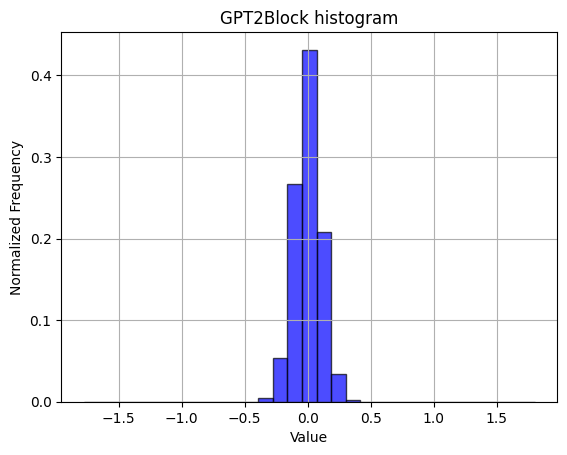

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 3.17891439e-07 1.27156576e-06 1.58945719e-06
 1.90734863e-06 4.13258870e-06 7.62939453e-06 1.27156576e-05
 4.03722127e-05 3.22024028e-04 3.36170197e-03 2.30458577e-02
 9.64619319e-02 2.33360291e-01 3.14096133e-01 2.19976425e-01
 8.64044825e-02 1.98405584e-02 2.72560120e-03 2.68300374e-04
 3.59217326e-05 1.20798747e-05 7.94728597e-06 5.08626302e-06
 2.22524007e-06 1.27156576e-06 6.35782878e-07 3.17891439e-07
 3.17891439e-07 3.17891439e-07 3.17891439e-07]
1.0000000000000002
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


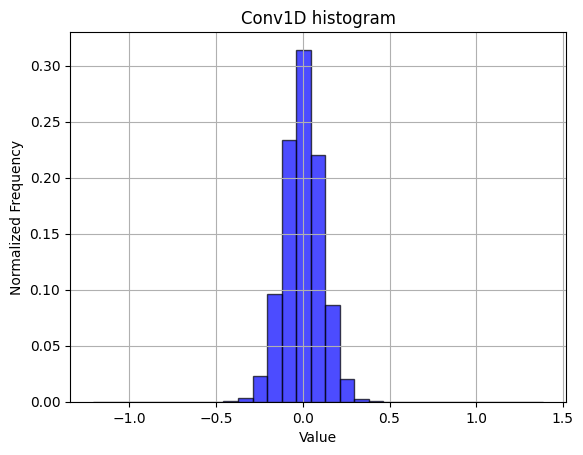

Module: Conv1D
Operation: Conv1D()
[2.86102295e-06 5.72204590e-06 2.86102295e-06 5.72204590e-06
 1.71661377e-05 2.28881836e-05 4.29153442e-05 6.48498535e-05
 1.08718872e-04 3.08036804e-04 1.97219849e-03 1.64833069e-02
 9.20724869e-02 2.67631531e-01 3.55232239e-01 2.01766014e-01
 5.47018051e-02 8.26454163e-03 9.01222229e-04 1.56402588e-04
 8.29696655e-05 6.10351562e-05 3.81469727e-05 2.19345093e-05
 1.23977661e-05 1.04904175e-05 5.72204590e-06 1.90734863e-06
 0.00000000e+00 0.00000000e+00 1.90734863e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


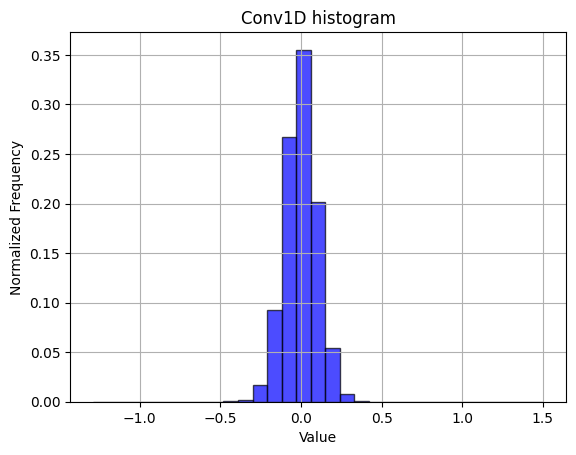

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[9.53674316e-07 1.43051147e-06 1.43051147e-06 2.14576721e-06
 5.72204590e-06 8.58306885e-06 1.47819519e-05 2.52723694e-05
 4.55379486e-05 2.35319138e-04 2.43782997e-03 2.04014778e-02
 1.00111723e-01 2.61875868e-01 3.38008165e-01 2.02995539e-01
 6.20741844e-02 1.04742050e-02 1.08003616e-03 1.11103058e-04
 3.43322754e-05 2.21729279e-05 1.45435333e-05 6.91413879e-06
 4.05311584e-06 3.33786011e-06 1.66893005e-06 7.15255737e-07
 2.38418579e-07 2.38418579e-07 4.76837158e-07]
1.0
Input size:  1
Output size:  2


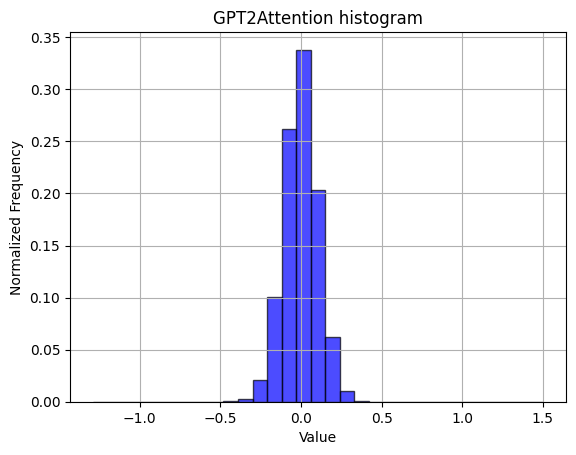

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.76837158e-07 0.00000000e+00 2.38418579e-07
 1.19209290e-06 1.85966492e-05 1.53732300e-03 4.85980511e-02
 3.41063499e-01 4.72742558e-01 1.28658533e-01 7.26628304e-03
 1.10626221e-04 1.43051147e-06 7.15255737e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


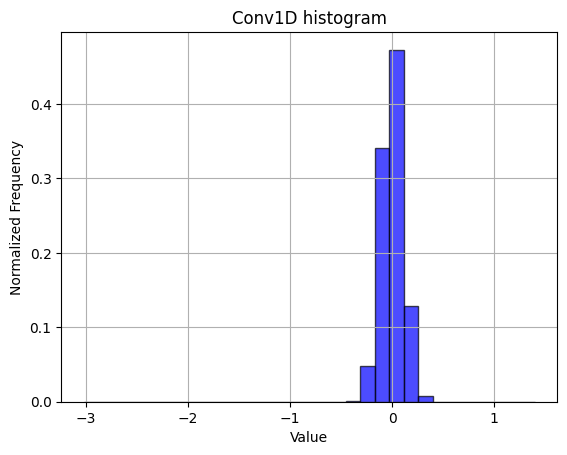

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 4.76837158e-07 7.15255737e-07 2.14576721e-06
 3.33786011e-06 1.85966492e-05 2.18153000e-04 1.06151104e-02
 3.46101522e-01 5.95852852e-01 4.63769436e-02 7.52687454e-04
 3.74317169e-05 9.77516174e-06 3.81469727e-06 1.66893005e-06
 4.76837158e-07 9.53674316e-07 2.38418579e-07 7.15255737e-07
 0.00000000e+00 0.00000000e+00 4.76837158e-07 0.00000000e+00
 0.00000000e+00 2.38418579e-07 0.00000000e+00 4.76837158e-07
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


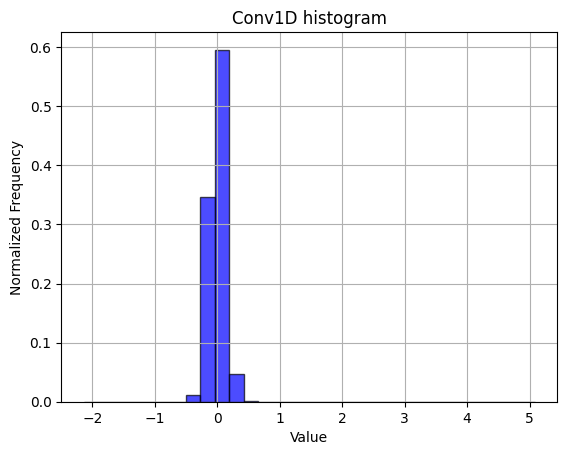

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[9.53674316e-07 1.43051147e-06 1.43051147e-06 2.14576721e-06
 5.72204590e-06 8.58306885e-06 1.47819519e-05 2.52723694e-05
 4.55379486e-05 2.35319138e-04 2.43782997e-03 2.04014778e-02
 1.00111723e-01 2.61875868e-01 3.38008165e-01 2.02995539e-01
 6.20741844e-02 1.04742050e-02 1.08003616e-03 1.11103058e-04
 3.43322754e-05 2.21729279e-

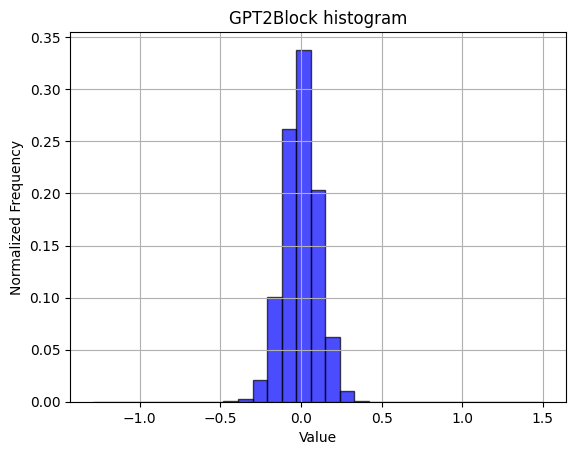

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 3.17891439e-07 1.27156576e-06
 1.27156576e-06 6.35782878e-07 9.53674316e-07 3.81469727e-06
 6.67572021e-06 1.68482463e-05 5.59488932e-05 8.50995382e-04
 1.21882757e-02 8.79456202e-02 2.81425158e-01 3.72490883e-01
 1.96322441e-01 4.39065297e-02 4.47940826e-03 2.56538391e-04
 2.38418579e-05 7.31150309e-06 3.81469727e-06 3.49680583e-06
 3.81469727e-06 1.27156576e-06 1.27156576e-06 3.17891439e-07
 0.00000000e+00 0.00000000e+00 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


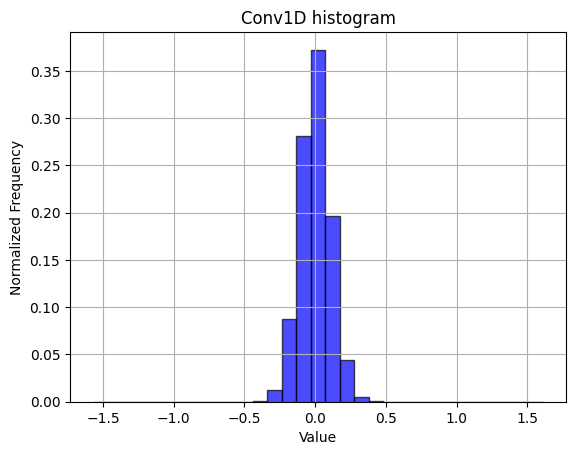

Module: Conv1D
Operation: Conv1D()
[3.81469727e-06 3.81469727e-06 5.72204590e-06 9.53674316e-06
 2.47955322e-05 1.81198120e-05 3.43322754e-05 5.81741333e-05
 9.63211060e-05 1.60217285e-04 5.66482544e-04 6.98184967e-03
 5.79500198e-02 2.33289719e-01 3.86058807e-01 2.43110657e-01
 6.26678467e-02 7.86209106e-03 6.45637512e-04 1.69754028e-04
 9.05990601e-05 6.58035278e-05 4.10079956e-05 2.95639038e-05
 1.90734863e-05 1.33514404e-05 1.23977661e-05 3.81469727e-06
 2.86102295e-06 2.86102295e-06 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


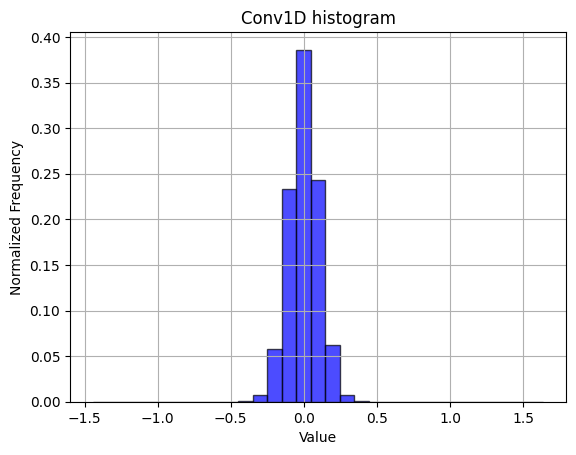

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[7.15255737e-07 4.76837158e-07 9.53674316e-07 2.86102295e-06
 3.33786011e-06 6.67572021e-06 5.72204590e-06 1.16825104e-05
 2.19345093e-05 3.98159027e-05 9.79900360e-05 1.07908249e-03
 1.47745609e-02 1.02490664e-01 3.08634043e-01 3.68150711e-01
 1.68977261e-01 3.24683189e-02 2.92944908e-03 1.89065933e-04
 4.55379486e-05 2.14576721e-05 1.57356262e-05 1.23977661e-05
 7.62939453e-06 4.52995300e-06 4.05311584e-06 1.43051147e-06
 7.15255737e-07 7.15255737e-07 4.76837158e-07]
1.0
Input size:  1
Output size:  2


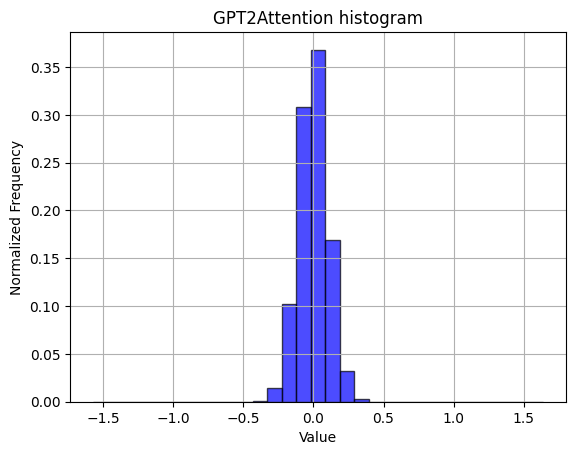

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.38418579e-07
 2.38418579e-07 4.76837158e-07 1.66893005e-06 2.62260437e-06
 7.60555267e-05 1.99460983e-03 2.69246101e-02 1.56811237e-01
 3.64067793e-01 3.22897434e-01 1.10872984e-01 1.53789520e-02
 9.34600830e-04 3.31401825e-05 1.66893005e-06 2.38418579e-07
 2.38418579e-07 2.38418579e-07 0.00000000e+00 2.38418579e-07
 2.38418579e-07 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


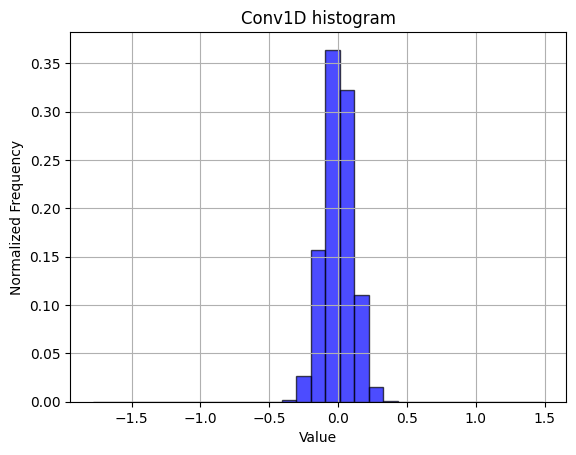

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 2.38418579e-07 0.00000000e+00 2.38418579e-07
 2.38418579e-07 2.38418579e-07 0.00000000e+00 2.38418579e-07
 4.76837158e-07 2.14576721e-06 1.19209290e-06 6.67572021e-06
 1.61170959e-04 3.38850021e-02 7.95726299e-01 1.69419050e-01
 7.53879547e-04 2.78949738e-05 7.15255737e-06 3.33786011e-06
 1.19209290e-06 2.38418579e-07 1.19209290e-06 7.15255737e-07
 2.38418579e-07 2.38418579e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


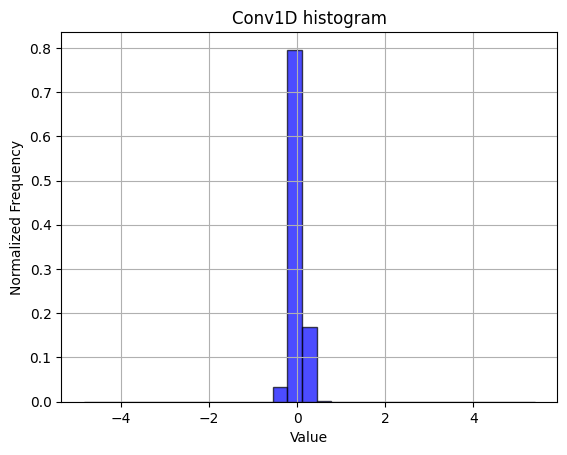

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[7.15255737e-07 4.76837158e-07 9.53674316e-07 2.86102295e-06
 3.33786011e-06 6.67572021e-06 5.72204590e-06 1.16825104e-05
 2.19345093e-05 3.98159027e-05 9.79900360e-05 1.07908249e-03
 1.47745609e-02 1.02490664e-01 3.08634043e-01 3.68150711e-01
 1.68977261e-01 3.24683189e-02 2.92944908e-03 1.89065933e-04
 4.55379486e-05 2.14576721e-

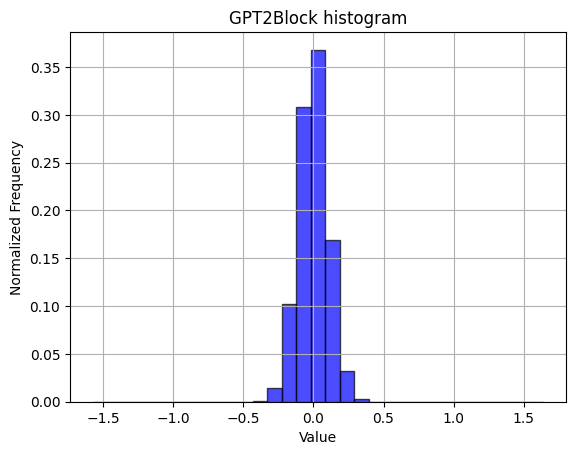

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 9.53674316e-07 0.00000000e+00
 3.17891439e-07 9.53674316e-07 2.54313151e-06 5.08626302e-06
 8.90096029e-06 3.52859497e-05 8.08080037e-04 1.44993464e-02
 1.16539955e-01 3.57881228e-01 3.67252986e-01 1.25870705e-01
 1.61129634e-02 9.12984212e-04 4.25974528e-05 1.36693319e-05
 4.45048014e-06 2.22524007e-06 9.53674316e-07 9.53674316e-07
 3.17891439e-07 6.35782878e-07 6.35782878e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


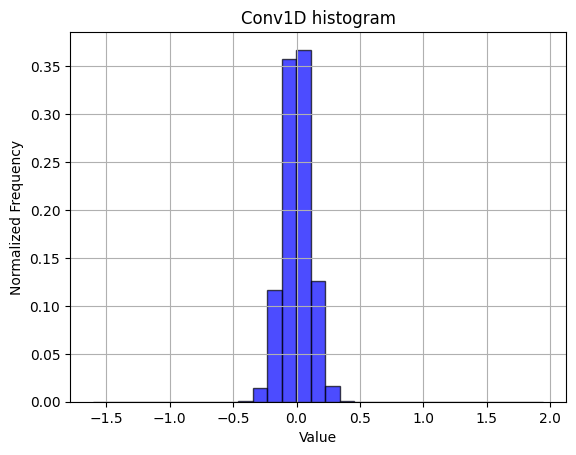

Module: Conv1D
Operation: Conv1D()
[5.72204590e-06 9.53674316e-07 2.86102295e-06 9.53674316e-06
 1.14440918e-05 1.81198120e-05 3.05175781e-05 4.00543213e-05
 5.91278076e-05 6.58035278e-05 1.44958496e-04 4.81605530e-04
 3.87096405e-03 3.06100845e-02 1.47650719e-01 3.44933510e-01
 3.21919441e-01 1.22905731e-01 2.36101151e-02 2.86006927e-03
 3.85284424e-04 1.32560730e-04 9.15527344e-05 5.72204590e-05
 4.10079956e-05 2.28881836e-05 1.52587891e-05 1.23977661e-05
 4.76837158e-06 3.81469727e-06 1.90734863e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


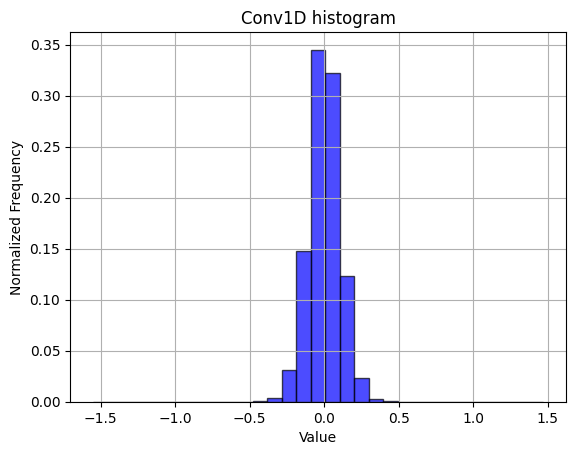

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[1.66893005e-06 7.15255737e-07 1.43051147e-06 3.33786011e-06
 3.33786011e-06 7.62939453e-06 1.23977661e-05 2.00271606e-05
 2.57492065e-05 7.48634338e-05 8.64028931e-04 1.41758919e-02
 1.14579916e-01 3.59905005e-01 3.69658232e-01 1.23736143e-01
 1.57904625e-02 9.71317291e-04 8.01086426e-05 3.86238098e-05
 2.00271606e-05 1.26361847e-05 7.39097595e-06 4.29153442e-06
 2.14576721e-06 1.43051147e-06 9.53674316e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output size:  2


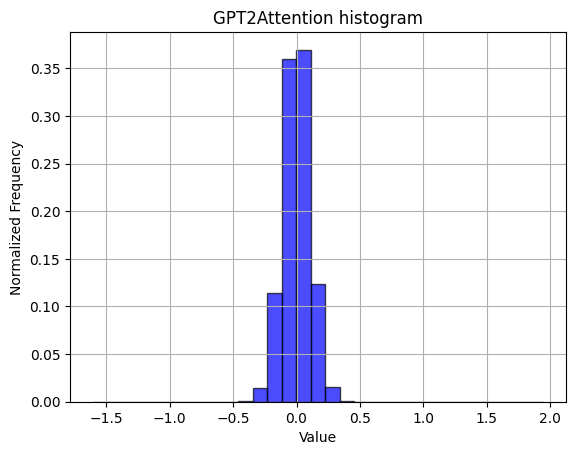

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.76837158e-07 0.00000000e+00 7.15255737e-07
 0.00000000e+00 7.15255737e-07 7.15255737e-07 4.05311584e-06
 1.07288361e-05 1.72615051e-04 2.20966339e-03 1.80008411e-02
 8.65285397e-02 2.27824450e-01 3.17650795e-01 2.33797550e-01
 9.16304588e-02 1.95615292e-02 2.40015984e-03 1.89065933e-04
 1.35898590e-05 1.66893005e-06 2.38418579e-07 0.00000000e+00
 0.00000000e+00 7.15255737e-07 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


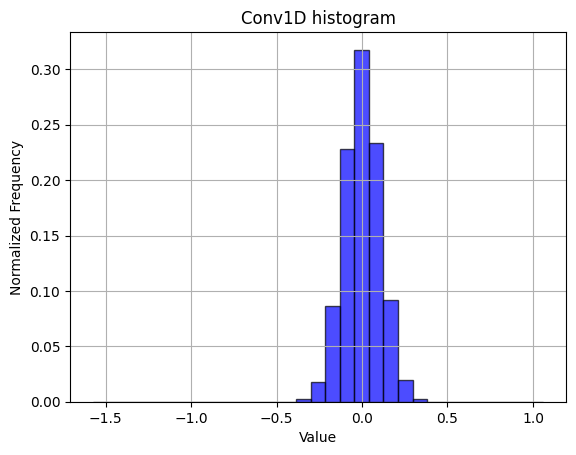

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[4.76837158e-07 0.00000000e+00 0.00000000e+00 2.38418579e-07
 4.76837158e-07 9.53674316e-07 1.90734863e-06 2.62260437e-06
 6.19888306e-06 3.81469727e-05 6.67810440e-04 3.59284878e-02
 4.96585369e-01 4.40455198e-01 2.57210732e-02 5.19275665e-04
 4.67300415e-05 1.33514404e-05 4.29153442e-06 2.14576721e-06
 1.43051147e-06 7.15255737e-07 1.19209290e-06 2.38418579e-07
 0.00000000e+00 7.15255737e-07 0.00000000e+00 2.38418579e-07
 2.38418579e-07 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


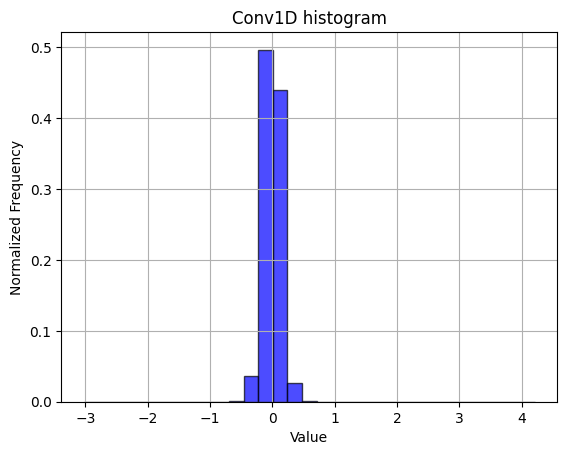

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[1.66893005e-06 7.15255737e-07 1.43051147e-06 3.33786011e-06
 3.33786011e-06 7.62939453e-06 1.23977661e-05 2.00271606e-05
 2.57492065e-05 7.48634338e-05 8.64028931e-04 1.41758919e-02
 1.14579916e-01 3.59905005e-01 3.69658232e-01 1.23736143e-01
 1.57904625e-02 9.71317291e-04 8.01086426e-05 3.86238098e-05
 2.00271606e-05 1.26361847e-

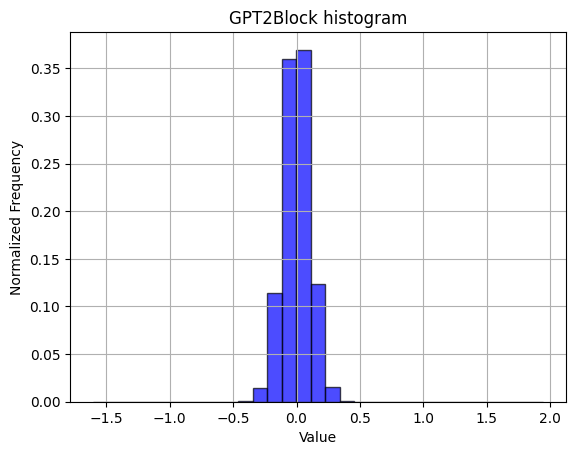

Module: Conv1D
Operation: Conv1D()
[6.35782878e-07 3.17891439e-07 1.90734863e-06 1.90734863e-06
 3.17891439e-06 5.72204590e-06 1.58945719e-05 6.93003337e-05
 4.69843547e-04 2.89821625e-03 1.50146484e-02 5.55664698e-02
 1.40626907e-01 2.36895243e-01 2.57353465e-01 1.78220749e-01
 8.14787547e-02 2.49144236e-02 5.38698832e-03 8.98361206e-04
 1.28428141e-04 2.86102295e-05 1.14440918e-05 3.49680583e-06
 2.22524007e-06 1.27156576e-06 9.53674316e-07 0.00000000e+00
 0.00000000e+00 3.17891439e-07 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


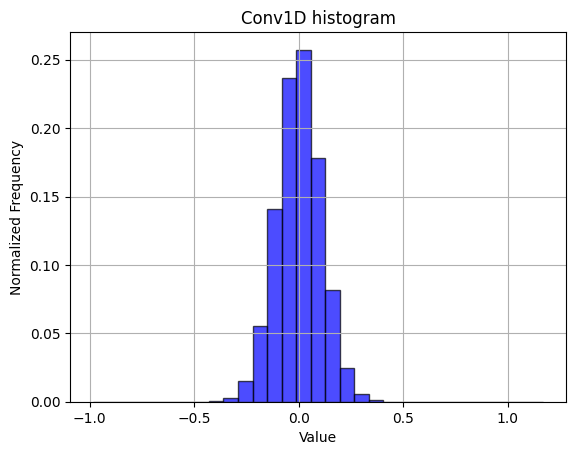

Module: Conv1D
Operation: Conv1D()
[1.90734863e-06 9.53674316e-07 2.86102295e-06 3.81469727e-06
 4.76837158e-06 1.33514404e-05 9.53674316e-06 1.71661377e-05
 2.95639038e-05 4.57763672e-05 6.29425049e-05 1.13487244e-04
 2.10762024e-04 1.16539001e-03 1.93576813e-02 1.77438736e-01
 4.60655212e-01 2.89372444e-01 4.77695465e-02 3.05843353e-03
 3.15666199e-04 1.29699707e-04 8.20159912e-05 5.43594360e-05
 2.76565552e-05 1.52587891e-05 1.14440918e-05 1.14440918e-05
 9.53674316e-06 7.62939453e-06 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


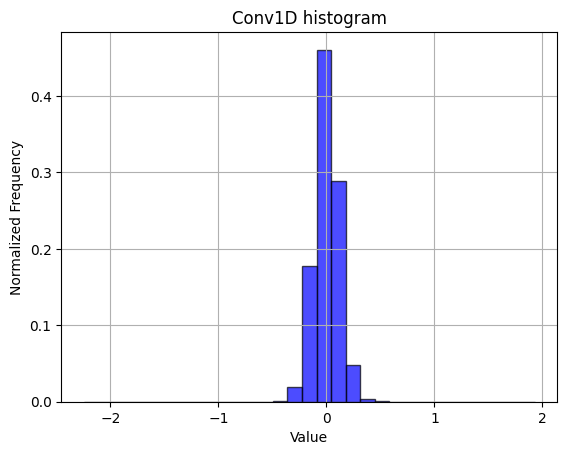

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[4.76837158e-07 2.38418579e-07 7.15255737e-07 9.53674316e-07
 1.19209290e-06 3.33786011e-06 2.38418579e-06 4.29153442e-06
 7.39097595e-06 1.19209290e-05 1.74045563e-05 3.24249268e-05
 6.91413879e-05 6.97374344e-04 1.69870853e-02 1.74938440e-01
 4.69349146e-01 2.91184425e-01 4.43120003e-02 2.15649605e-03
 1.26123428e-04 3.93390656e-05 2.26497650e-05 1.35898590e-05
 7.15255737e-06 4.05311584e-06 2.86102295e-06 2.86102295e-06
 2.38418579e-06 1.90734863e-06 2.38418579e-07]
1.0
Input size:  1
Output size:  2


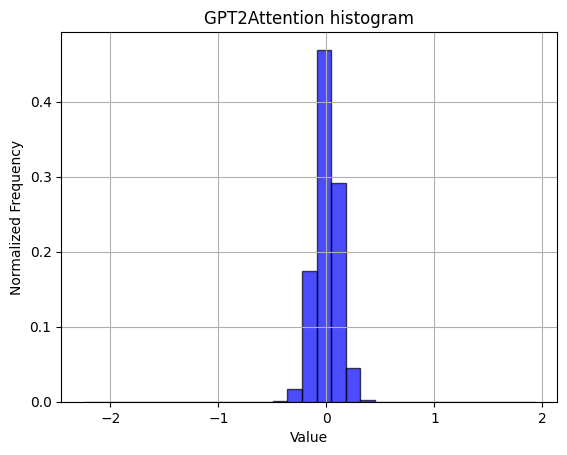

Module: Conv1D
Operation: Conv1D()
[7.15255737e-07 0.00000000e+00 4.76837158e-07 9.53674316e-07
 4.76837158e-07 2.38418579e-07 4.76837158e-07 9.53674316e-07
 2.86102295e-06 1.40666962e-05 1.32322311e-04 1.44958496e-03
 1.12099648e-02 5.50358295e-02 1.61903381e-01 2.77741194e-01
 2.73347616e-01 1.55761242e-01 5.15923500e-02 1.03862286e-02
 1.28555298e-03 1.19209290e-04 9.05990601e-06 2.62260437e-06
 1.19209290e-06 0.00000000e+00 4.76837158e-07 0.00000000e+00
 2.38418579e-07 4.76837158e-07 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


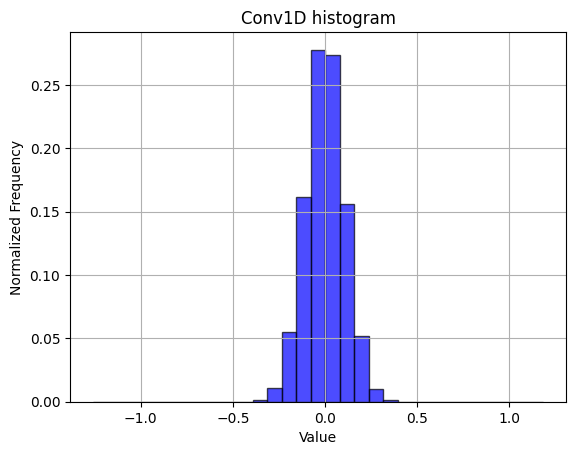

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 2.38418579e-07
 7.15255737e-07 7.15255737e-07 0.00000000e+00 4.76837158e-07
 0.00000000e+00 1.66893005e-06 7.15255737e-07 2.38418579e-06
 1.21593475e-05 1.31130219e-04 2.26957798e-02 7.31547117e-01
 2.44266033e-01 1.28221512e-03 3.93390656e-05 8.82148743e-06
 5.00679016e-06 1.43051147e-06 1.19209290e-06 7.15255737e-07
 2.38418579e-07 2.38418579e-07 2.38418579e-07 2.38418579e-07
 4.76837158e-07 2.38418579e-07 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


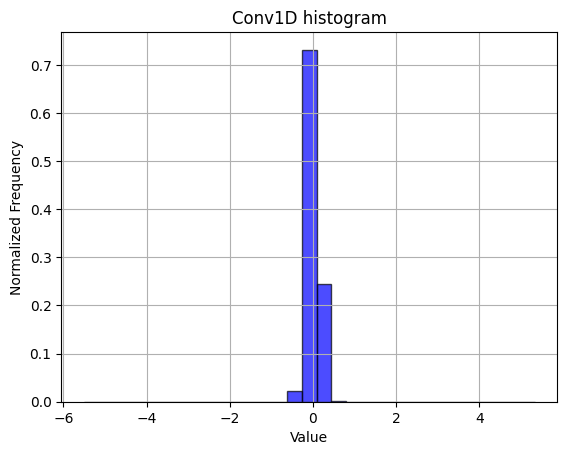

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[4.76837158e-07 2.38418579e-07 7.15255737e-07 9.53674316e-07
 1.19209290e-06 3.33786011e-06 2.38418579e-06 4.29153442e-06
 7.39097595e-06 1.19209290e-05 1.74045563e-05 3.24249268e-05
 6.91413879e-05 6.97374344e-04 1.69870853e-02 1.74938440e-01
 4.69349146e-01 2.91184425e-01 4.43120003e-02 2.15649605e-03
 1.26123428e-04 3.93390656e-

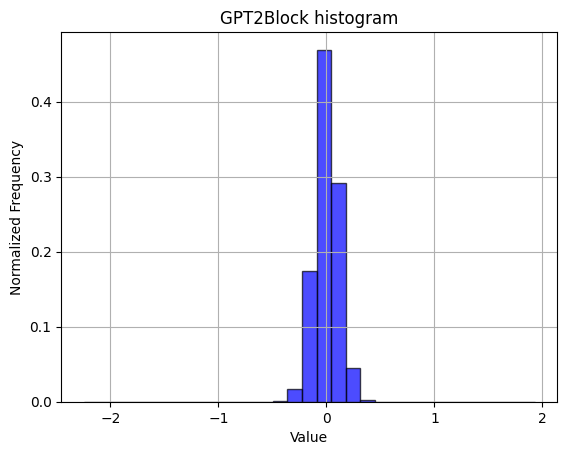

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.35782878e-07 9.53674316e-07 2.86102295e-06
 2.86102295e-06 1.27156576e-05 5.78562419e-05 5.64257304e-04
 5.43244680e-03 3.58190536e-02 1.37760480e-01 2.87564913e-01
 3.07360649e-01 1.67309443e-01 4.89597321e-02 8.14819336e-03
 9.01222229e-04 7.78834025e-05 1.17619832e-05 6.03993734e-06
 2.22524007e-06 1.90734863e-06 9.53674316e-07 0.00000000e+00
 3.17891439e-07 0.00000000e+00 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


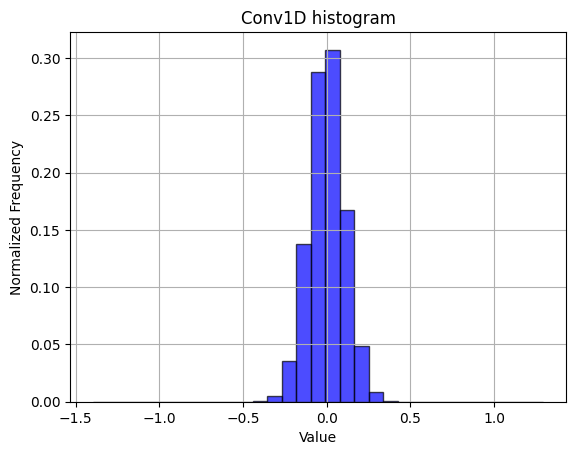

Module: Conv1D
Operation: Conv1D()
[1.90734863e-06 2.86102295e-06 5.72204590e-06 9.53674316e-07
 5.72204590e-06 6.67572021e-06 1.23977661e-05 3.24249268e-05
 4.29153442e-05 7.15255737e-05 1.14440918e-04 2.26974487e-04
 2.43377686e-03 6.27031326e-02 4.03970718e-01 4.44987297e-01
 8.14247131e-02 3.42750549e-03 2.18391418e-04 1.20162964e-04
 6.86645508e-05 3.71932983e-05 2.86102295e-05 2.38418579e-05
 1.04904175e-05 3.81469727e-06 5.72204590e-06 4.76837158e-06
 5.72204590e-06 0.00000000e+00 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


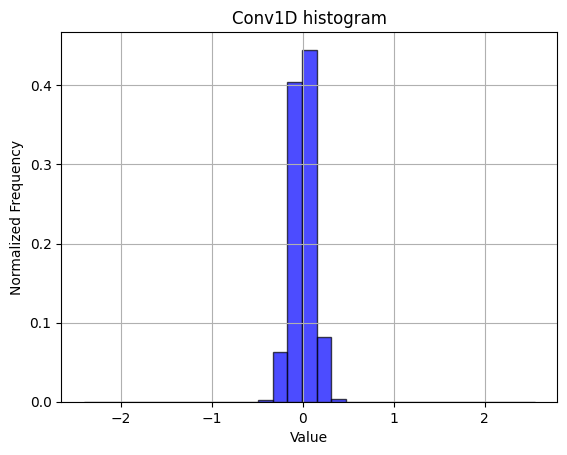

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[4.76837158e-07 7.15255737e-07 1.43051147e-06 2.38418579e-07
 1.43051147e-06 1.66893005e-06 3.33786011e-06 8.10623169e-06
 1.07288361e-05 1.88350677e-05 3.26633453e-05 7.91549683e-05
 1.61623955e-03 5.62274456e-02 4.10949230e-01 4.53905582e-01
 7.45882988e-02 2.39086151e-03 7.91549683e-05 3.50475311e-05
 1.85966492e-05 9.53674316e-06 7.15255737e-06 6.19888306e-06
 2.62260437e-06 9.53674316e-07 1.43051147e-06 1.19209290e-06
 1.43051147e-06 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output size:  2


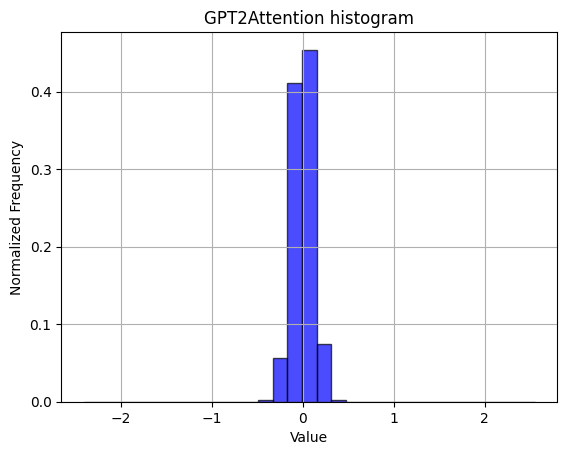

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 2.38418579e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.15255737e-07 4.76837158e-07
 9.53674316e-07 7.15255737e-07 2.14576721e-06 1.35898590e-05
 3.97920609e-04 1.03206635e-02 1.04612827e-01 3.54586601e-01
 3.83165598e-01 1.31320238e-01 1.49185658e-02 6.28471375e-04
 2.33650208e-05 5.48362732e-06 7.15255737e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


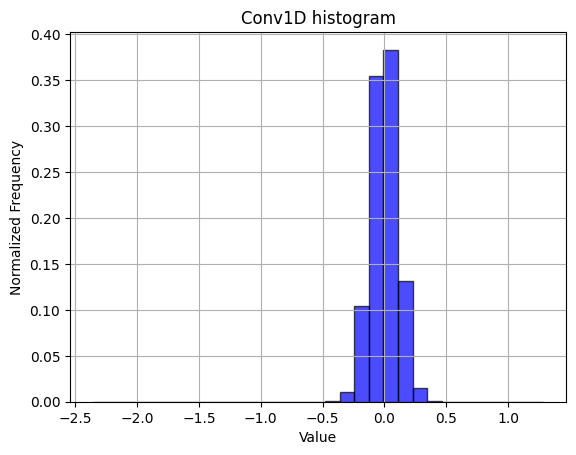

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 2.38418579e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.38418579e-07 2.38418579e-07 2.38418579e-07 9.53674316e-07
 2.14576721e-06 5.48362732e-06 3.09944153e-05 6.87837601e-04
 1.88122034e-01 7.84981012e-01 2.59366035e-02 1.95264816e-04
 2.14576721e-05 6.91413879e-06 3.81469727e-06 9.53674316e-07
 4.76837158e-07 4.76837158e-07 7.15255737e-07 2.38418579e-07
 7.15255737e-07 4.76837158e-07 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


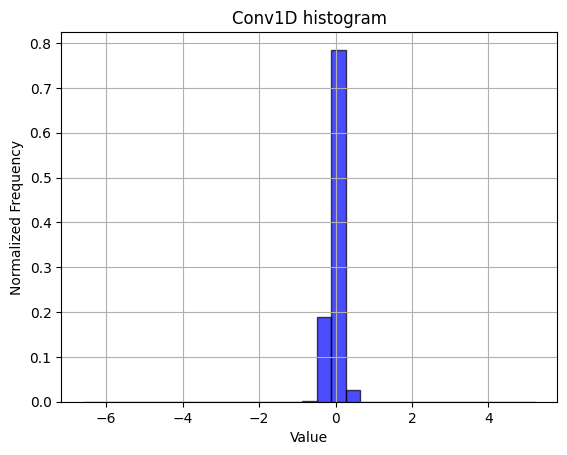

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[4.76837158e-07 7.15255737e-07 1.43051147e-06 2.38418579e-07
 1.43051147e-06 1.66893005e-06 3.33786011e-06 8.10623169e-06
 1.07288361e-05 1.88350677e-05 3.26633453e-05 7.91549683e-05
 1.61623955e-03 5.62274456e-02 4.10949230e-01 4.53905582e-01
 7.45882988e-02 2.39086151e-03 7.91549683e-05 3.50475311e-05
 1.85966492e-05 9.53674316e-

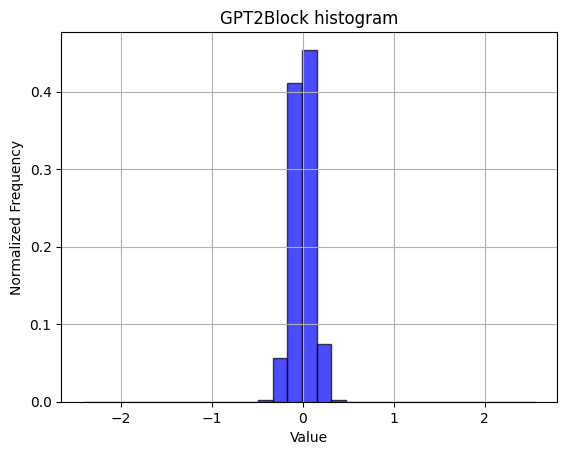

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 0.00000000e+00 3.17891439e-07 6.35782878e-07
 3.17891439e-07 2.22524007e-06 5.72204590e-06 7.94728597e-06
 2.25702922e-05 7.75655111e-05 3.08672587e-04 1.36025747e-03
 5.44675191e-03 1.87040965e-02 5.25070826e-02 1.13337835e-01
 1.83682124e-01 2.21575101e-01 1.91646258e-01 1.22410774e-01
 5.87339401e-02 2.16461817e-02 6.37722015e-03 1.63110097e-03
 3.84648641e-04 8.83738200e-05 2.51134237e-05 7.31150309e-06
 5.72204590e-06 1.58945719e-06 1.58945719e-06]
0.9999999999999999
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


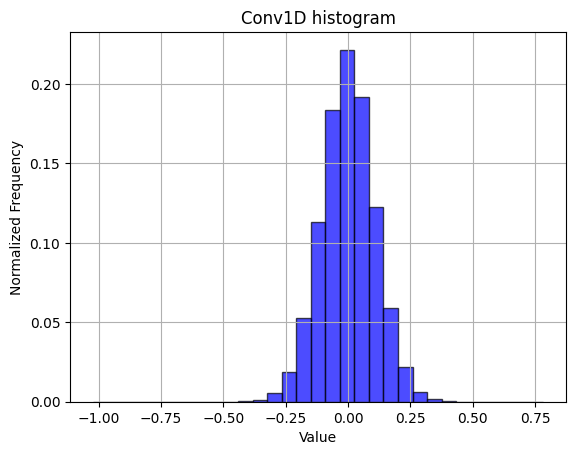

Module: Conv1D
Operation: Conv1D()
[1.90734863e-06 9.53674316e-07 2.86102295e-06 9.53674316e-07
 4.76837158e-06 8.58306885e-06 1.23977661e-05 2.38418579e-05
 3.33786011e-05 4.76837158e-05 7.24792480e-05 1.04904175e-04
 1.58309937e-04 2.80380249e-04 4.40216064e-03 1.46847725e-01
 6.14115715e-01 2.23975182e-01 9.05704498e-03 3.81469727e-04
 1.55448914e-04 1.08718872e-04 7.43865967e-05 4.86373901e-05
 3.33786011e-05 1.71661377e-05 1.14440918e-05 7.62939453e-06
 4.76837158e-06 9.53674316e-07 4.76837158e-06]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


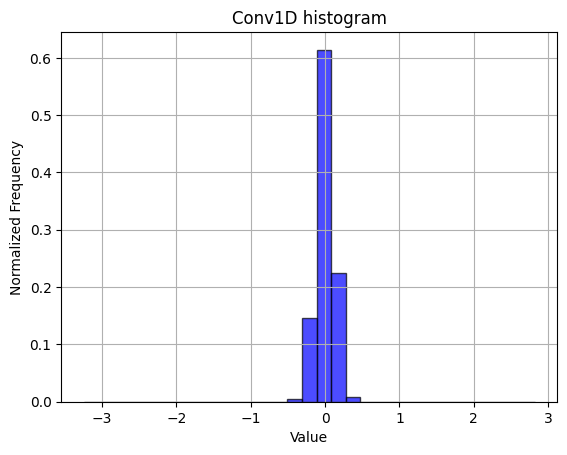

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[4.76837158e-07 2.38418579e-07 7.15255737e-07 2.38418579e-07
 1.19209290e-06 2.14576721e-06 3.09944153e-06 5.96046448e-06
 8.34465027e-06 1.19209290e-05 1.81198120e-05 2.69412994e-05
 4.10079956e-05 9.44137573e-05 2.98357010e-03 1.37456894e-01
 6.35771036e-01 2.16785669e-01 6.52933121e-03 1.39474869e-04
 4.12464142e-05 2.71797180e-05 1.85966492e-05 1.21593475e-05
 8.34465027e-06 4.29153442e-06 2.86102295e-06 1.90734863e-06
 1.19209290e-06 2.38418579e-07 1.19209290e-06]
1.0
Input size:  1
Output size:  2


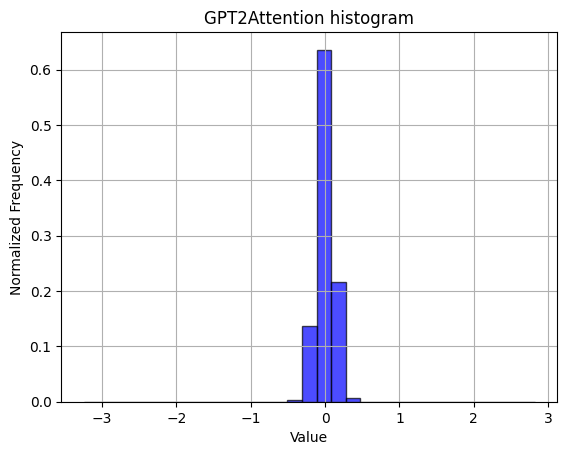

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07 4.76837158e-07
 0.00000000e+00 2.38418579e-07 2.38418579e-07 9.53674316e-07
 3.81469727e-06 3.17096710e-05 1.58691406e-03 5.06682396e-02
 3.48594427e-01 4.68922853e-01 1.23317242e-01 6.74557686e-03
 1.17540359e-04 6.67572021e-06 1.19209290e-06 2.38418579e-07
 2.38418579e-07 4.76837158e-07 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


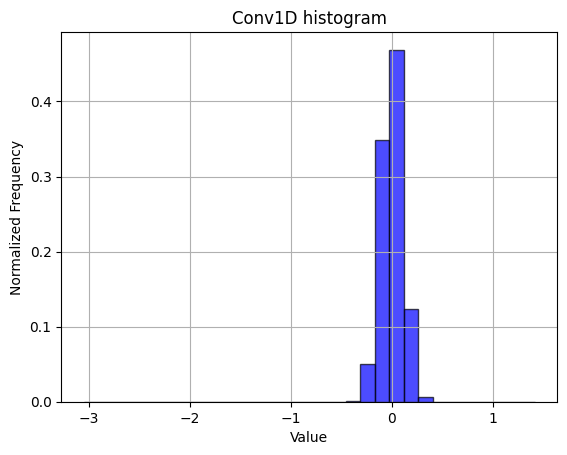

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 0.00000000e+00 2.38418579e-07 0.00000000e+00
 7.15255737e-07 2.38418579e-07 1.66893005e-06 1.66893005e-06
 2.86102295e-06 7.62939453e-06 2.38418579e-05 1.17540359e-04
 6.29782677e-03 4.66854334e-01 5.17725945e-01 8.70084763e-03
 1.95026398e-04 3.76701355e-05 1.14440918e-05 6.19888306e-06
 6.67572021e-06 1.66893005e-06 7.15255737e-07 1.43051147e-06
 4.76837158e-07 1.19209290e-06 7.15255737e-07 2.38418579e-07
 4.76837158e-07 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


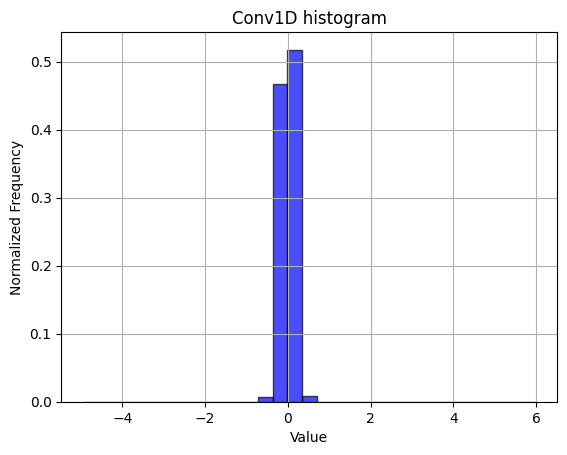

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[4.76837158e-07 2.38418579e-07 7.15255737e-07 2.38418579e-07
 1.19209290e-06 2.14576721e-06 3.09944153e-06 5.96046448e-06
 8.34465027e-06 1.19209290e-05 1.81198120e-05 2.69412994e-05
 4.10079956e-05 9.44137573e-05 2.98357010e-03 1.37456894e-01
 6.35771036e-01 2.16785669e-01 6.52933121e-03 1.39474869e-04
 4.12464142e-05 2.71797180e-

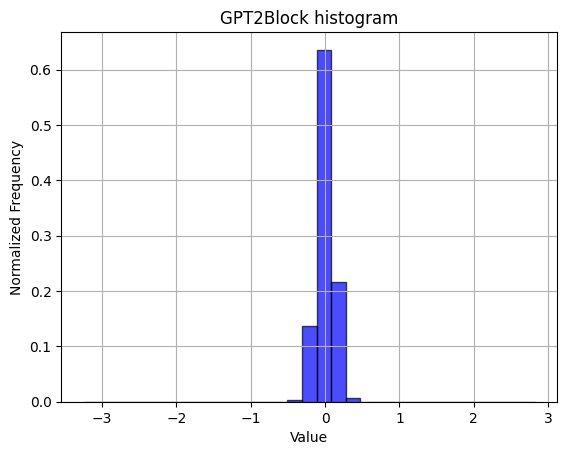

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 3.17891439e-07 6.35782878e-07 3.17891439e-07
 3.81469727e-06 6.99361165e-06 2.16166178e-05 1.07129415e-04
 4.51087952e-04 1.75031026e-03 6.10764821e-03 1.96272532e-02
 5.27938207e-02 1.13471985e-01 1.84200923e-01 2.21081098e-01
 1.90030098e-01 1.20831807e-01 5.80202738e-02 2.17831930e-02
 6.96563721e-03 2.04118093e-03 5.28335571e-04 1.32242839e-04
 2.82923381e-05 9.85463460e-06 1.58945719e-06 1.58945719e-06
 3.17891439e-07 0.00000000e+00 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


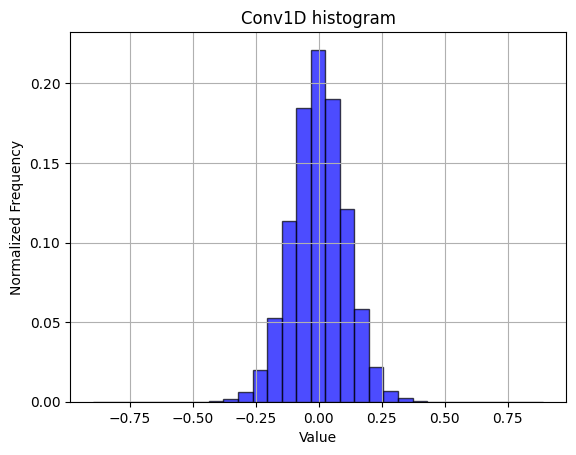

Module: Conv1D
Operation: Conv1D()
[3.81469727e-06 2.86102295e-06 9.53674316e-06 1.14440918e-05
 1.52587891e-05 1.71661377e-05 3.05175781e-05 3.71932983e-05
 5.43594360e-05 1.08718872e-04 1.69754028e-04 3.19480896e-04
 1.73091888e-03 1.15701675e-01 6.87190056e-01 1.90269470e-01
 3.47518921e-03 3.36647034e-04 2.20298767e-04 9.82284546e-05
 5.91278076e-05 3.43322754e-05 3.33786011e-05 2.28881836e-05
 1.14440918e-05 1.33514404e-05 1.33514404e-05 4.76837158e-06
 1.90734863e-06 1.90734863e-06 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


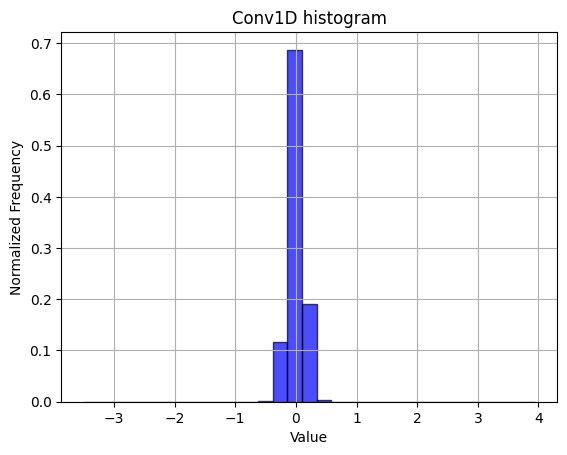

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[9.53674316e-07 7.15255737e-07 2.38418579e-06 2.86102295e-06
 3.81469727e-06 4.29153442e-06 7.62939453e-06 9.29832458e-06
 1.35898590e-05 2.71797180e-05 4.26769257e-05 8.24928284e-05
 8.60691071e-04 9.77139473e-02 7.27345705e-01 1.71690702e-01
 1.97362900e-03 8.82148743e-05 5.53131104e-05 2.45571136e-05
 1.47819519e-05 8.58306885e-06 8.34465027e-06 5.72204590e-06
 2.86102295e-06 3.33786011e-06 3.33786011e-06 1.19209290e-06
 4.76837158e-07 4.76837158e-07 2.38418579e-07]
1.0
Input size:  1
Output size:  2


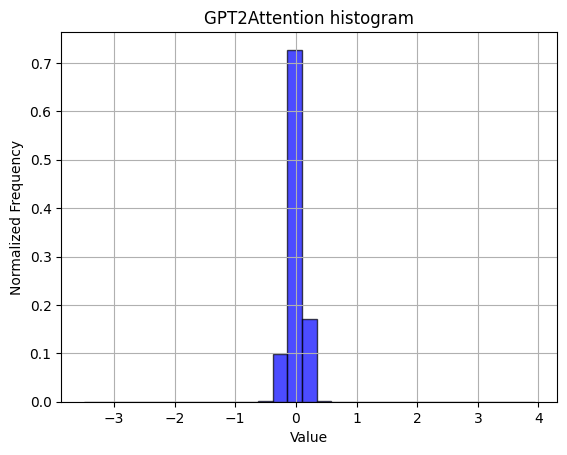

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 2.38418579e-07 2.38418579e-07 2.38418579e-07
 2.38418579e-07 2.38418579e-07 1.19209290e-06 9.53674316e-07
 2.14576721e-06 4.52995300e-06 1.00135803e-05 4.22000885e-05
 6.07013702e-04 8.19683075e-03 6.03172779e-02 2.16755390e-01
 3.55022430e-01 2.58492947e-01 8.59081745e-02 1.34425163e-02
 1.11699104e-03 6.55651093e-05 8.82148743e-06 9.53674316e-07
 2.38418579e-07 7.15255737e-07 7.15255737e-07 7.15255737e-07
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


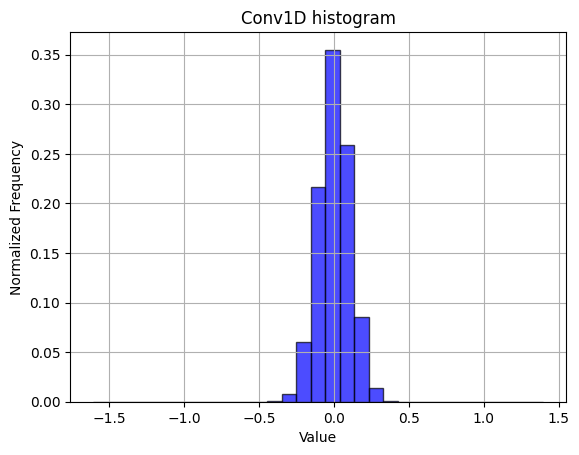

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[7.15255737e-07 4.76837158e-07 4.76837158e-07 2.38418579e-06
 5.48362732e-06 9.53674316e-06 1.26361847e-05 4.57763672e-05
 2.59637833e-04 6.21032715e-03 6.47680283e-01 3.43873501e-01
 1.61671638e-03 1.35898590e-04 5.19752502e-05 2.69412994e-05
 1.71661377e-05 1.14440918e-05 1.14440918e-05 7.86781311e-06
 5.96046448e-06 7.15255737e-06 2.14576721e-06 1.66893005e-06
 1.19209290e-06 2.38418579e-07 4.76837158e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


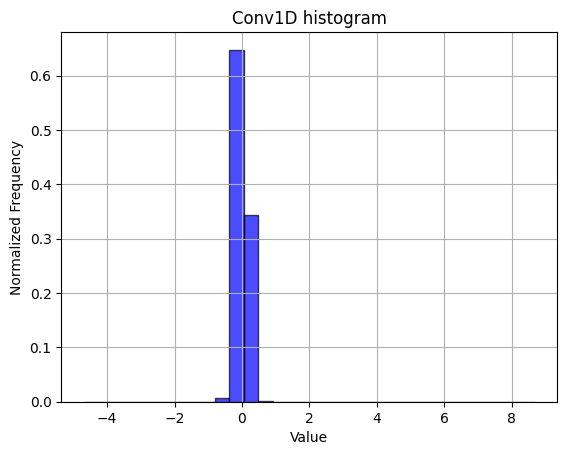

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[9.53674316e-07 7.15255737e-07 2.38418579e-06 2.86102295e-06
 3.81469727e-06 4.29153442e-06 7.62939453e-06 9.29832458e-06
 1.35898590e-05 2.71797180e-05 4.26769257e-05 8.24928284e-05
 8.60691071e-04 9.77139473e-02 7.27345705e-01 1.71690702e-01
 1.97362900e-03 8.82148743e-05 5.53131104e-05 2.45571136e-05
 1.47819519e-05 8.58306885e-

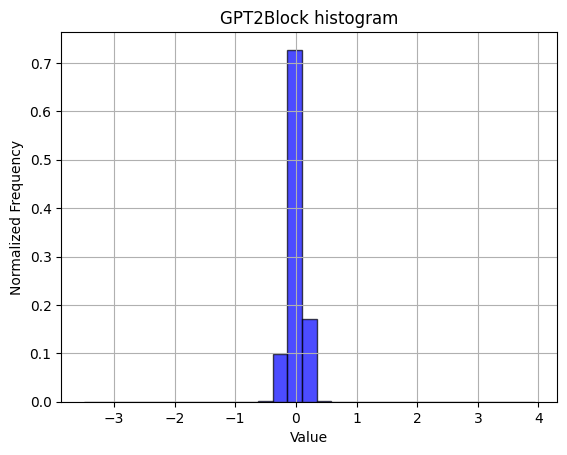

Module: Conv1D
Operation: Conv1D()
[3.17891439e-07 6.35782878e-07 6.35782878e-07 0.00000000e+00
 0.00000000e+00 1.27156576e-06 2.54313151e-06 1.58945719e-06
 7.31150309e-06 1.23977661e-05 6.96182251e-05 4.75565592e-04
 3.66910299e-03 2.25092570e-02 9.54840978e-02 2.39695867e-01
 3.20151011e-01 2.17381477e-01 7.98708598e-02 1.75186793e-02
 2.71924337e-03 3.57627869e-04 5.27699788e-05 8.90096029e-06
 4.45048014e-06 1.58945719e-06 1.58945719e-06 9.53674316e-07
 3.17891439e-07 0.00000000e+00 3.17891439e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 3072])


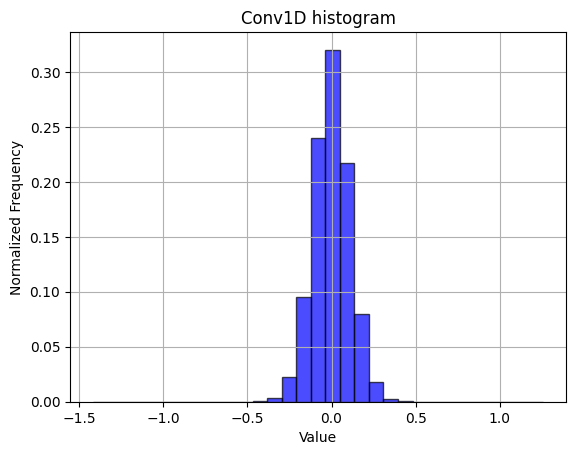

Module: Conv1D
Operation: Conv1D()
[9.53674316e-07 9.53674316e-07 9.53674316e-07 4.76837158e-06
 7.62939453e-06 6.67572021e-06 2.86102295e-06 8.58306885e-06
 1.23977661e-05 2.28881836e-05 2.38418579e-05 7.34329224e-05
 1.72615051e-04 4.29153442e-04 3.61251831e-03 9.82831955e-01
 1.19009018e-02 5.26428223e-04 1.67846680e-04 9.34600830e-05
 4.19616699e-05 2.09808350e-05 9.53674316e-06 4.76837158e-06
 6.67572021e-06 7.62939453e-06 2.86102295e-06 1.90734863e-06
 9.53674316e-07 9.53674316e-07 9.53674316e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


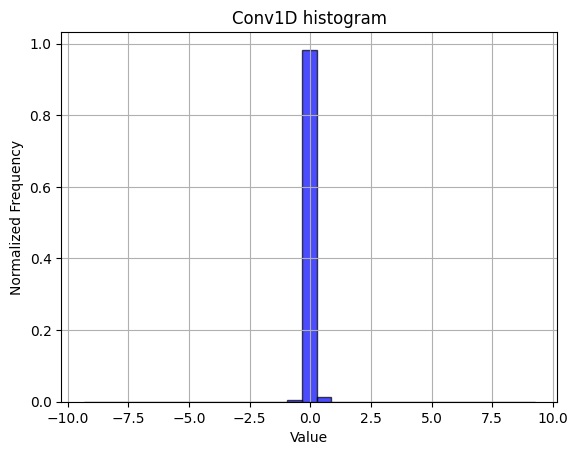

Module: GPT2Attention
Operation: GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)
[2.38418579e-07 2.38418579e-07 2.38418579e-07 1.19209290e-06
 1.90734863e-06 1.66893005e-06 7.15255737e-07 2.14576721e-06
 3.09944153e-06 5.72204590e-06 5.96046448e-06 1.83582306e-05
 4.31537628e-05 1.08957291e-04 2.14409828e-03 9.87826824e-01
 9.61184502e-03 1.33514404e-04 4.19616699e-05 2.33650208e-05
 1.04904175e-05 5.24520874e-06 2.38418579e-06 1.19209290e-06
 1.66893005e-06 1.90734863e-06 7.15255737e-07 4.76837158e-07
 2.38418579e-07 2.38418579e-07 2.38418579e-07]
1.0
Input size:  1
Output size:  2


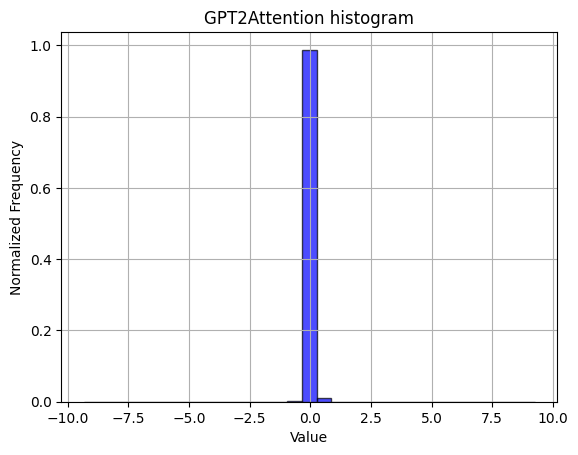

Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 2.38418579e-07 0.00000000e+00 2.38418579e-07
 2.38418579e-07 0.00000000e+00 2.38418579e-07 4.76837158e-07
 4.76837158e-07 1.43051147e-06 4.05311584e-06 1.02519989e-05
 1.76429749e-05 4.45842743e-05 2.02655792e-04 8.21781158e-03
 1.55617237e-01 5.24202824e-01 2.84605503e-01 2.63261795e-02
 6.07728958e-04 6.48498535e-05 3.45706940e-05 1.90734863e-05
 1.07288361e-05 5.24520874e-06 3.09944153e-06 9.53674316e-07
 4.76837158e-07 4.76837158e-07 4.76837158e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 4096])


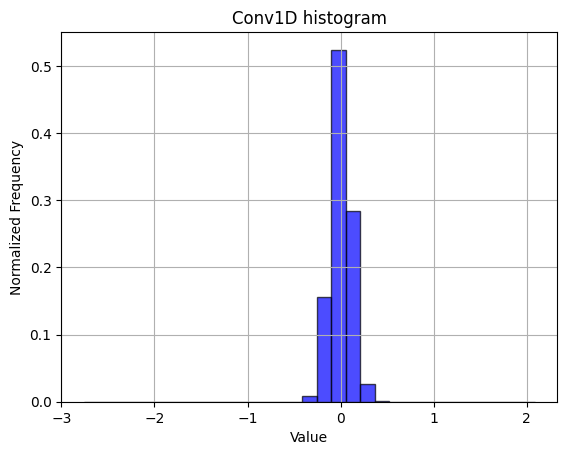

Module: NewGELUActivation
Operation: NewGELUActivation()
No weights in this module.
Module: Conv1D
Operation: Conv1D()
[2.38418579e-07 7.15255737e-07 2.38418579e-07 2.38418579e-07
 1.66893005e-06 1.66893005e-06 5.48362732e-06 2.83718109e-05
 3.17335129e-04 4.35150623e-01 5.63914537e-01 4.74691391e-04
 6.98566437e-05 1.95503235e-05 6.67572021e-06 3.33786011e-06
 2.14576721e-06 4.76837158e-07 7.15255737e-07 4.76837158e-07
 0.00000000e+00 7.15255737e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38418579e-07]
1.0
Input size:  1
Output shape:  torch.Size([1, 12, 1024])


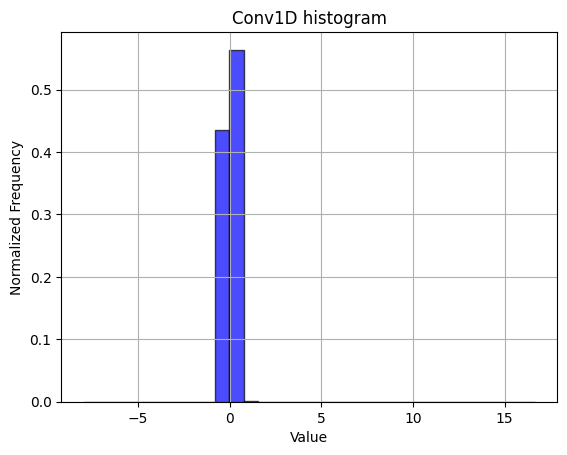

Module: GPT2MLP
Operation: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
No weights in this module.
Module: GPT2Block
Operation: GPT2Block(
  (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D()
    (c_proj): Conv1D()
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D()
    (c_proj): Conv1D()
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
[2.38418579e-07 2.38418579e-07 2.38418579e-07 1.19209290e-06
 1.90734863e-06 1.66893005e-06 7.15255737e-07 2.14576721e-06
 3.09944153e-06 5.72204590e-06 5.96046448e-06 1.83582306e-05
 4.31537628e-05 1.08957291e-04 2.14409828e-03 9.87826824e-01
 9.61184502e-03 1.33514404e-04 4.19616699e-05 2.33650208e-05
 1.04904175e-05 5.24520874e-

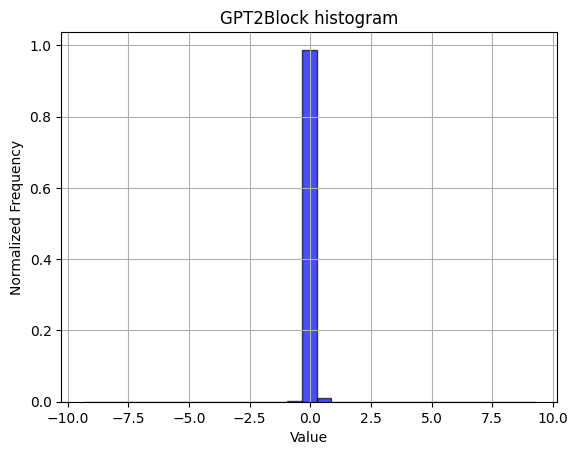

Module: GPT2Model
Operation: GPT2Model(
  (wte): Embedding(50257, 1024)
  (wpe): Embedding(1024, 1024)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-23): 24 x GPT2Block(
      (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=1024, out_features=50257, bias=False)
[5.82941182e-08 7.77254910e-08 3.49764709e-07 7.18960792e-07
 2.56494120e-06 5.53794123e-06 1.01237452e-05 2.05778237e-

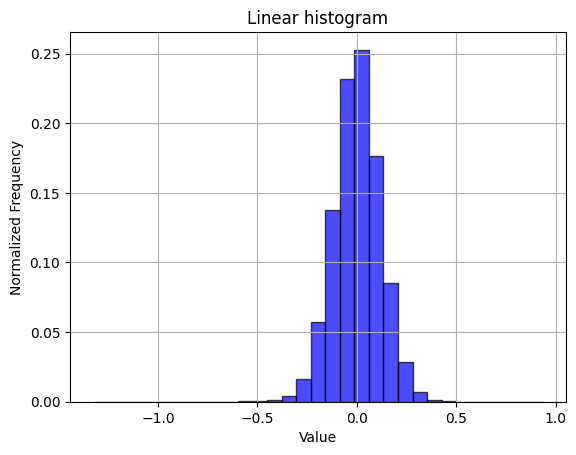

Module: GPT2LMHeadModel
Operation: GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50257, bias=False)
)
No weights in this module.


'Hey, are you conscious? Can you talk to me? I'

In [ ]:
prompt = "Hey, are you conscious? Can you talk to me?"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

print("Input Tokens: ", len(inputs[0]))
print("Number of layers: ", idx)
# Generate
generate_ids = model.generate(inputs.input_ids, max_length=len(inputs[0]) + 1, pad_token_id=tokenizer.eos_token_id)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]